In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from unet import eval_preds

In [17]:
def plot_images(image, pred_brain_mask, target_mask, model_mask, atlas_mask):
    """draw image, pred, mask side by side"""
    fig, ax = plt.subplots(1,5, figsize=(20,10))
    axes = ax.flatten()
    for ax, im, t in zip(axes, [image, pred_brain_mask, target_mask, model_mask, atlas_mask], 
                         ["image", "pred brain mask", "target mask", "pred vent mask" ,"atlas mask"]) :
        ax.imshow(im, cmap="gray")
        ax.set_title(t, fontdict={"fontsize":20})
        
def plot_overlaid_images(images, preds, masks, image_index, color_maps, alpha_, slice_range):
    for i in slice_range:
        fig, ax = plt.subplots(1, 1, figsize=(20,10))
        ax.imshow(images[IMG_NUM][i], cmap=color_maps[0])
        ax.imshow(preds[IMG_NUM][i], cmap=color_maps[1], alpha=alpha_)
        ax.imshow(masks[IMG_NUM][i], cmap=color_maps[2], alpha=alpha_)
        
def vol_perc_diff(mask, pred, absolute=False):
    mask_vol = np.sum(mask.ravel() == 1)
    pred_vol = np.sum(pred.ravel() == 1)
    if not absolute:
        return (pred_vol-mask_vol)/mask_vol
    return abs(pred_vol-mask_vol)/mask_vol

def vol(mask):
    return np.sum(mask.ravel() == 1) * 3


def summary_table(images, target_masks, pred_masks, atlas_masks, file_names):
    pred_dice_scores = [eval_preds(pred_masks[i], target_masks[i]) for i in range(len(images))]
    atlas_dice_scores = [eval_preds(atlas_masks[i], target_masks[i]) for i in range(len(images))]
    pred_percent_vol_diff = [vol_perc_diff(target_masks[i], pred_masks[i])*100 for i in range(len(images))]
    atlas_percent_vol_diff = [vol_perc_diff(target_masks[i], atlas_masks[i])*100 for i in range(len(images))]
    abs_pred_percent_vol_diff = [vol_perc_diff(target_masks[i], pred_masks[i], absolute=True)*100 for i in range(len(images))]
    abs_atlas_percent_vol_diff = [vol_perc_diff(target_masks[i], atlas_masks[i], absolute=True)*100 for i in range(len(images))]
    volume = [vol(pred_masks[i]) for i in range(len(images))]
    d = {'test_name': file_names, 'pred_dice_scores': pred_dice_scores, 'atlas_dice_scores': atlas_dice_scores, 
         'pred_percent_vol_diff': pred_percent_vol_diff, 'atlas_percent_vol_diff': atlas_percent_vol_diff, 
         'abs_pred_percent_vol_diff': abs_pred_percent_vol_diff, 'abs_atlas_percent_vol_diff': abs_atlas_percent_vol_diff,
         'pred_volume_mm^3': volume}
    df = pd.DataFrame(data=d)
    return df

def get_testcase_data(root, ventricle_dir="baseline9_notl_ventricle_preds"):
    "FIX: test2 20 -> 19 images"
    target_masks_files = sorted(list(Path(root/"ventricle_masks").iterdir()))
    raw_images_files = sorted(list(Path(root/"skull_stripped_v2").iterdir()))
    atlas_masks_files = sorted(list(Path(root/"ventricle_atlas").iterdir()))
    pred_masks_files = sorted(list(Path(root/ventricle_dir).iterdir()))
    pred_brain_files = sorted(list(Path(root/"brain_masks").iterdir()))
    
    ok_names = [o.name for o in pred_masks_files]
    
    target_masks_files = [fn for fn in target_masks_files if fn.name in ok_names]
    raw_images_files = [fn for fn in raw_images_files if fn.name in ok_names]
    atlas_masks_files = [fn for fn in atlas_masks_files if fn.name in ok_names]
    pred_brain_files = [fn for fn in pred_brain_files if fn.name in ok_names]
    
    target_masks = []
    raw_images = []
    atlas_masks = []
    pred_masks = []
    names = []
    brain_pred_masks = []
    for i in range(len(raw_images_files)):
        target_masks.append(np.load(target_masks_files[i]))
        raw_images.append(np.load(raw_images_files[i]))
        atlas_masks.append(np.load(atlas_masks_files[i]))
        pred_masks.append(np.load(pred_masks_files[i]))
        brain_pred_masks.append(np.load(pred_brain_files[i]))
        names.append(str(raw_images_files[i]).split("/")[-1].split("_")[0])
    return raw_images, target_masks, pred_masks, atlas_masks, brain_pred_masks, names


In [18]:
# Test Set 1 - MR: 
test_case_1_mr = Path("../../data/Segmentation_Dataset/MR_Dataset/test1")

# Test Set 1 - CT:
test_case_1_ct = Path("../../data/Segmentation_Dataset/CT_Dataset/test1")

# Test Set 2 - MR:
test_case_2_mr = Path("../../data/Segmentation_Dataset/MR_Dataset/test2")

# Test Set 2 - CT:
test_case_2_ct = Path("../../data/Segmentation_Dataset/CT_Dataset/test2")

In [84]:
# root = test_case_2_ct
# ventricle_dir="baseline11_notl_ventricle_preds"

# images, target_masks, pred_masks, atlas_masks, pred_brain_masks, names=\
#     get_testcase_data(test_case_2_mr)

# len(images), len(target_masks), len(pred_masks), len(atlas_masks), len(pred_brain_masks), len(names)

## Slice By Slice View of Image, Predicted Brain Mask, Target Mask, Model Mask, and Atlas Mask

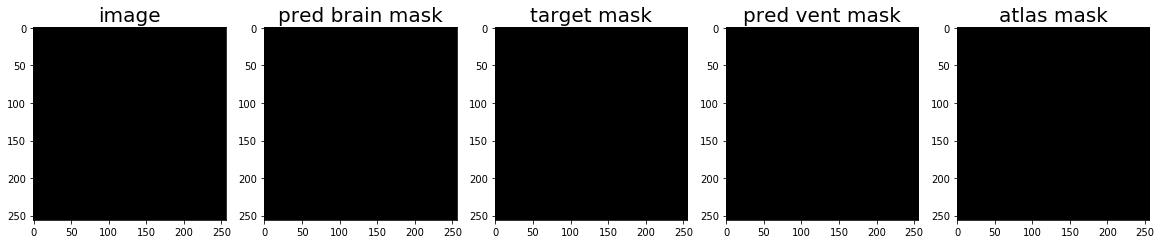

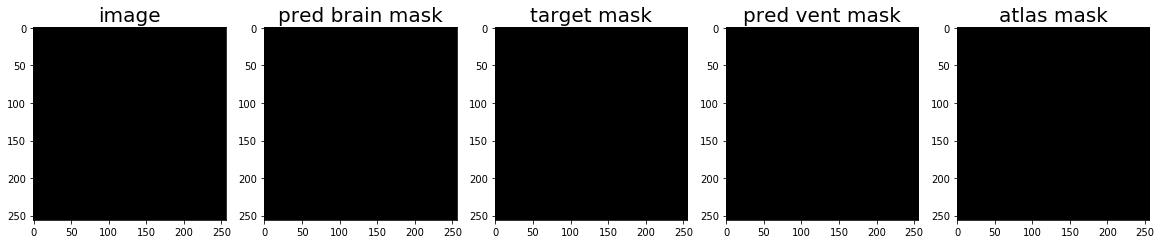

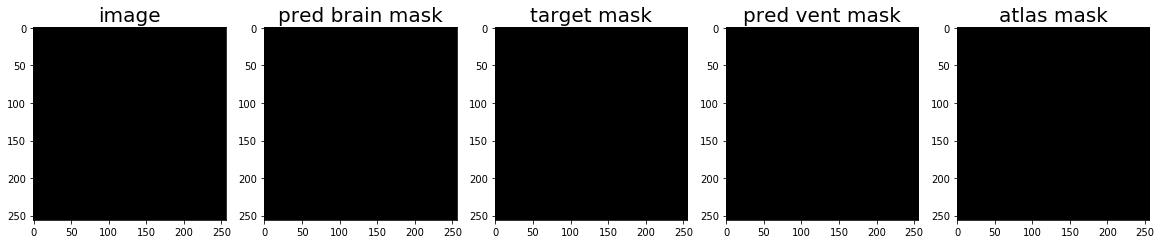

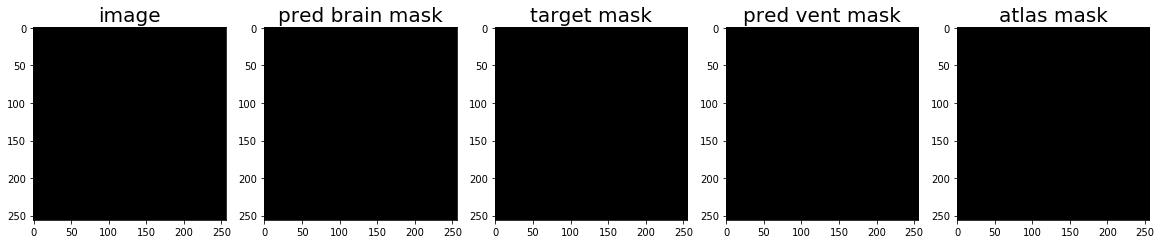

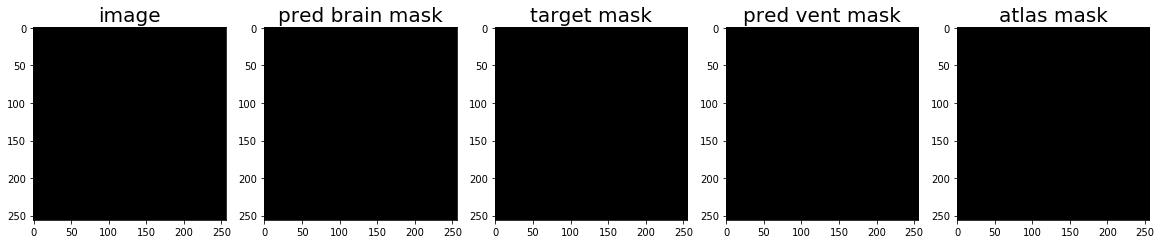

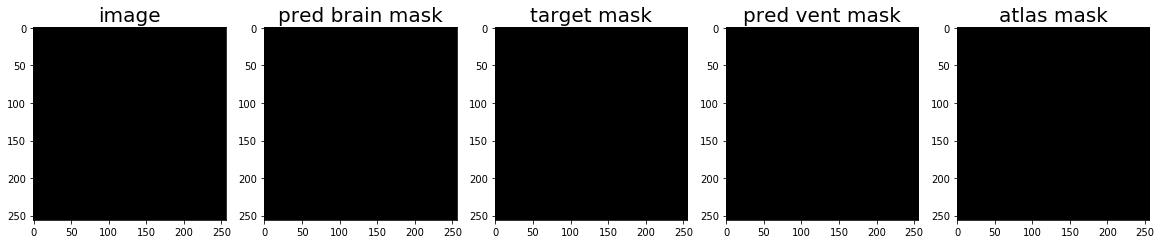

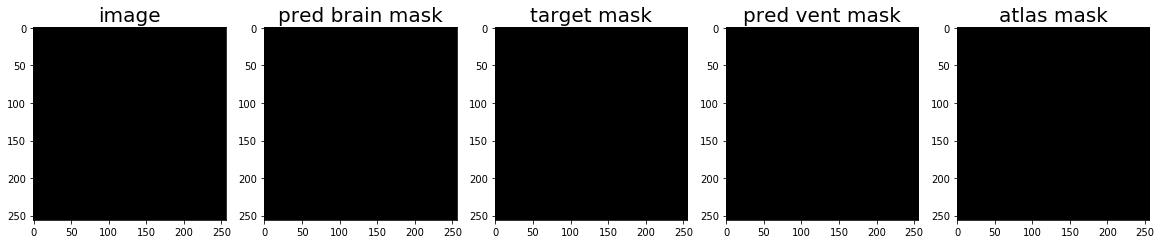

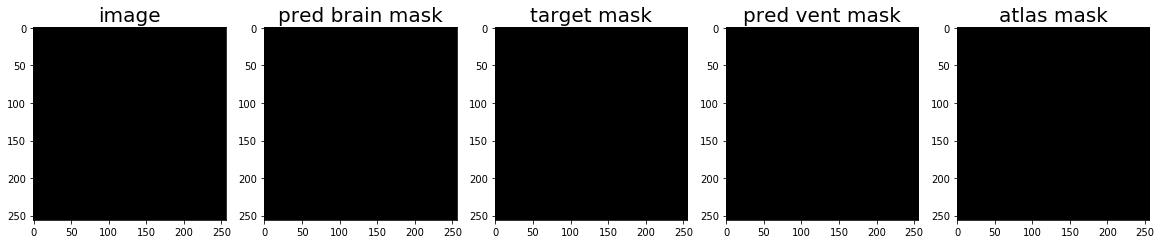

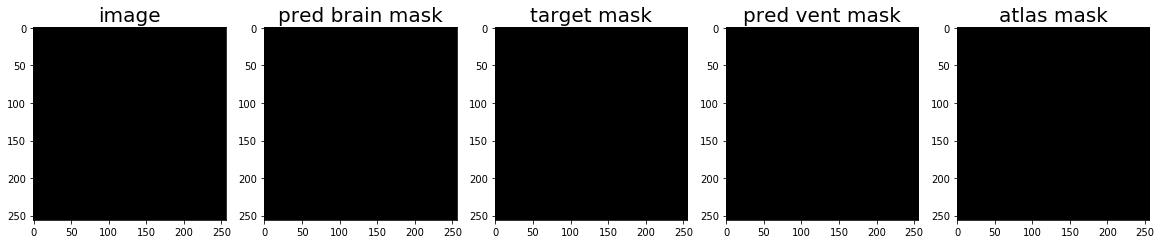

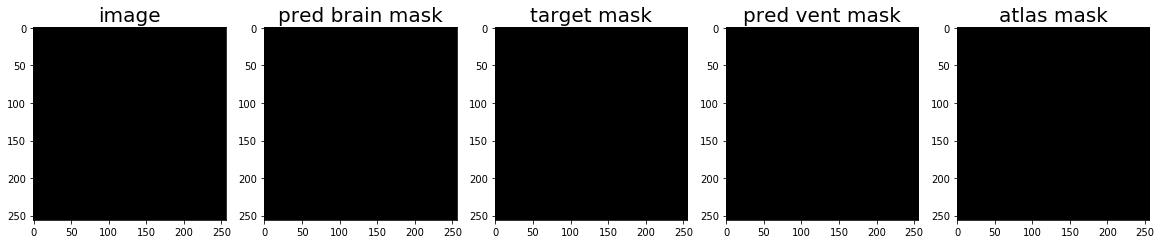

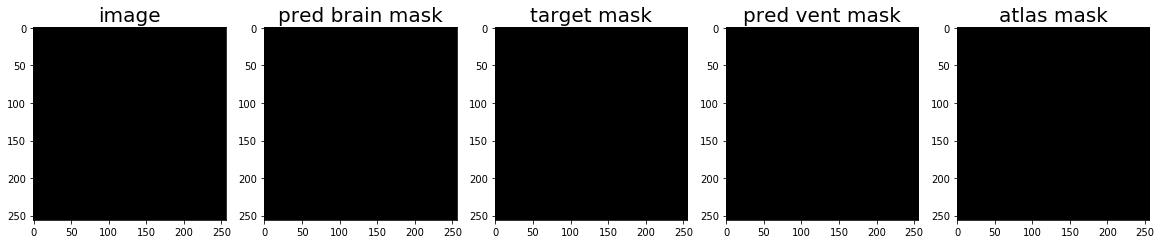

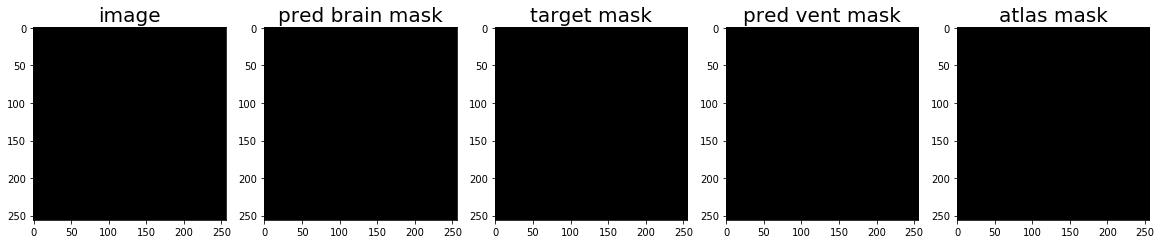

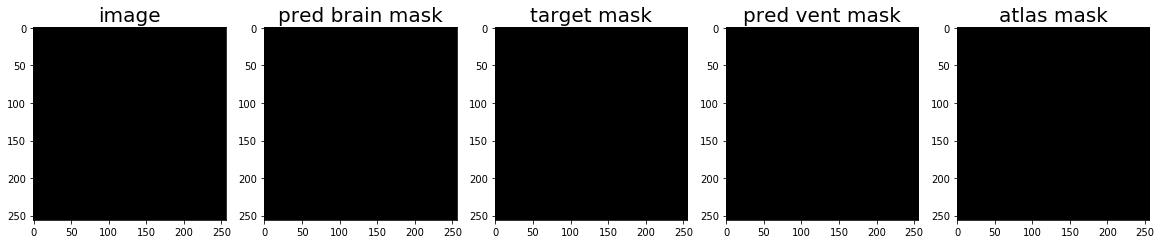

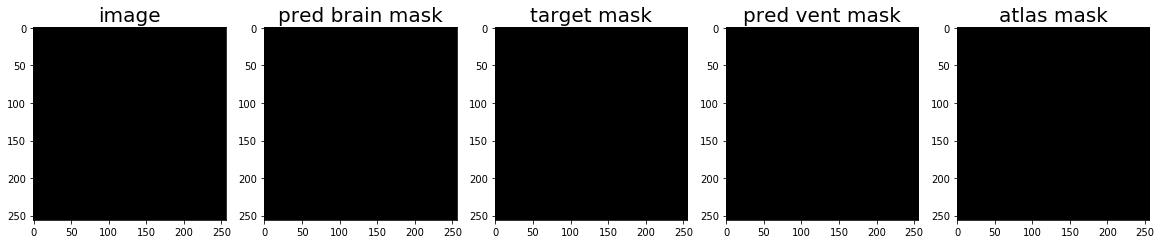

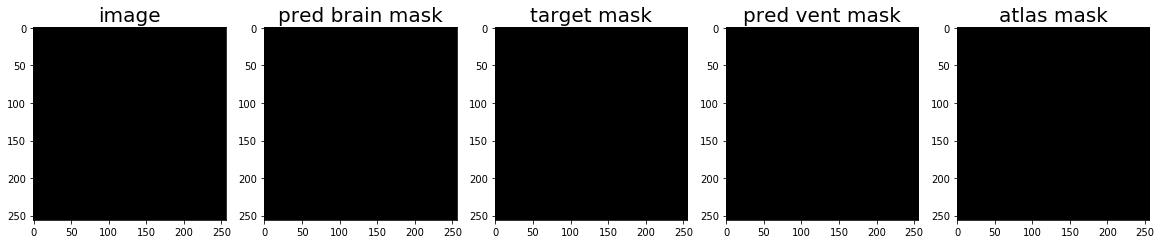

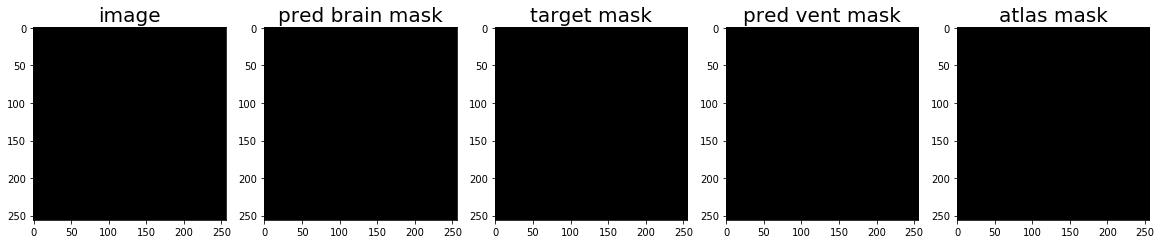

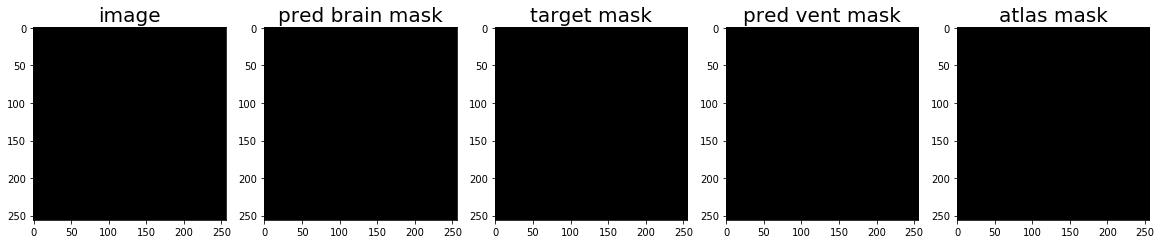

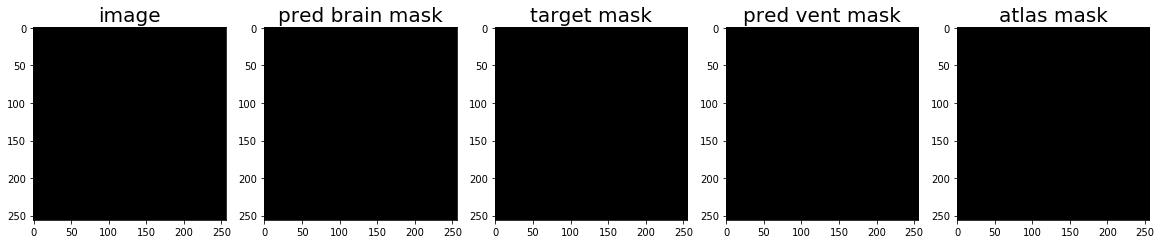

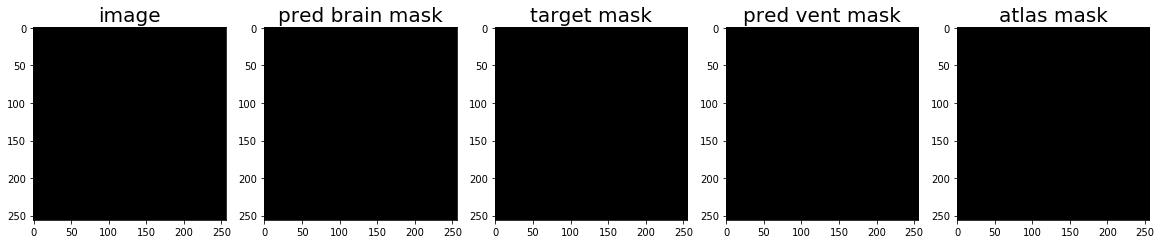

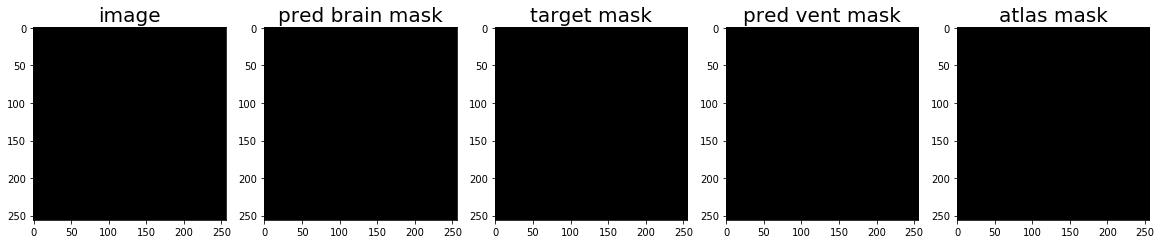

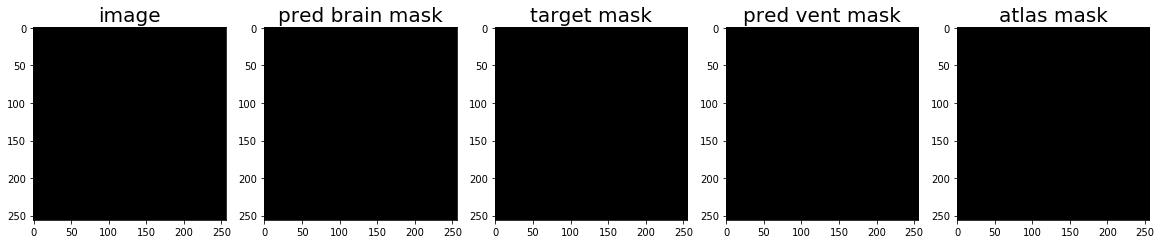

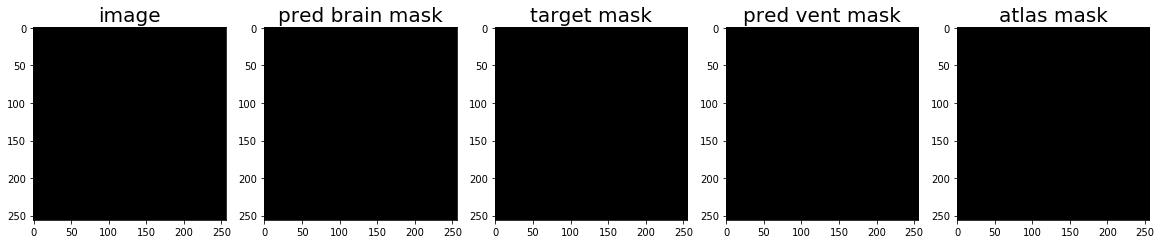

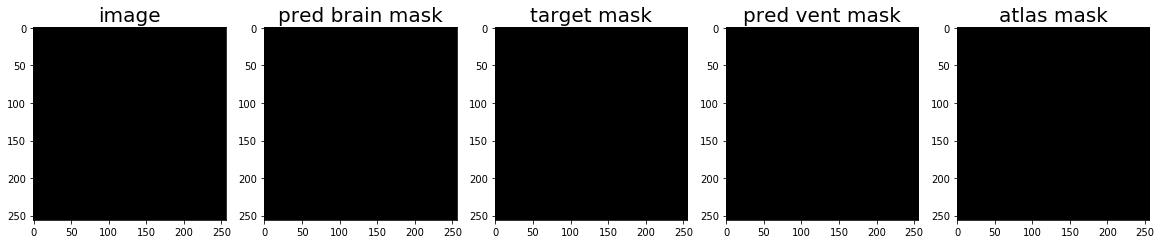

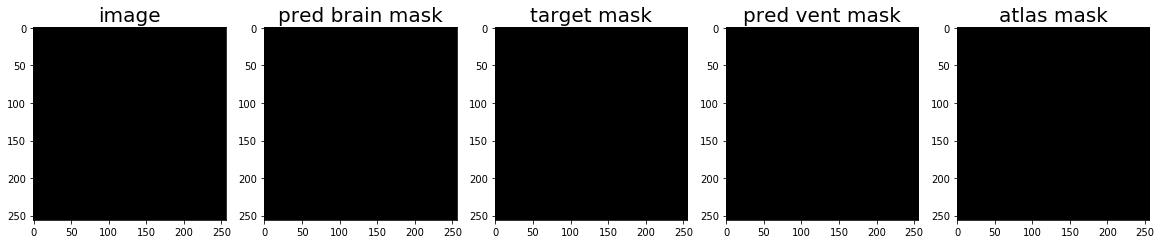

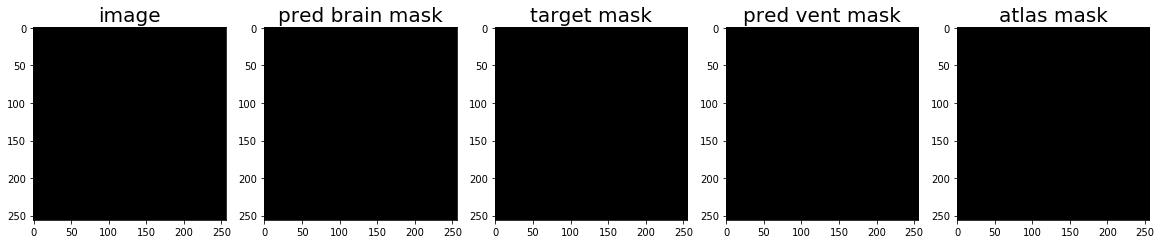

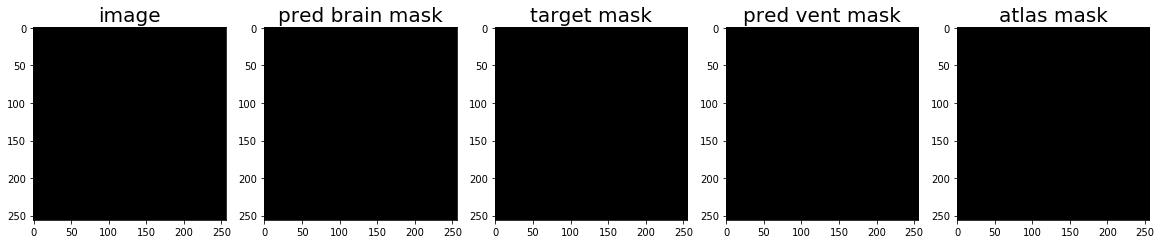

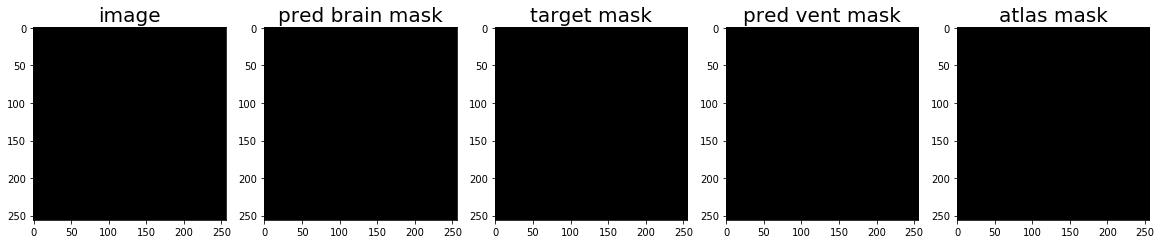

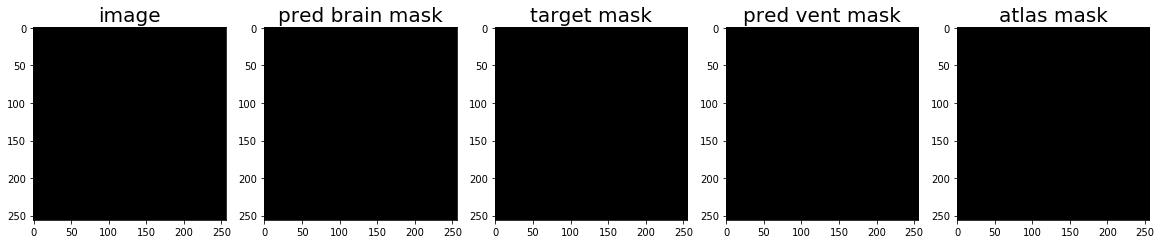

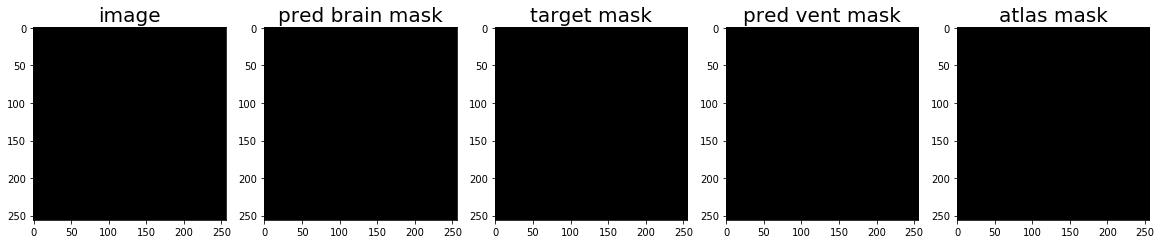

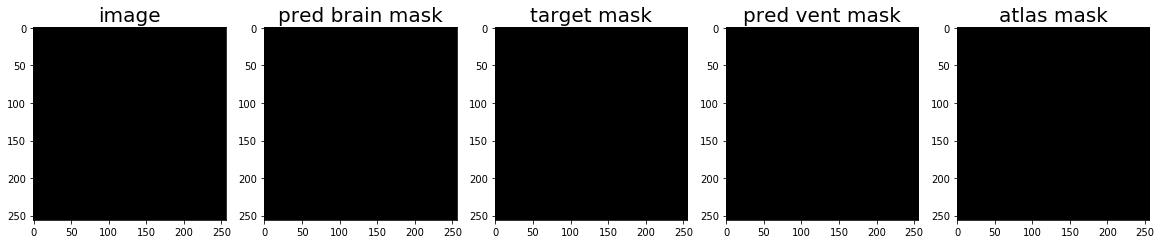

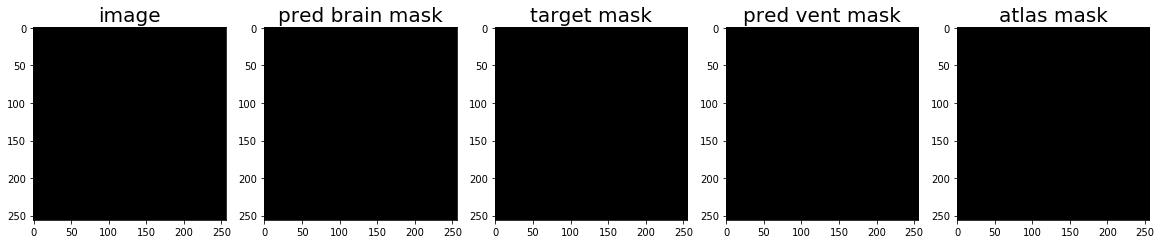

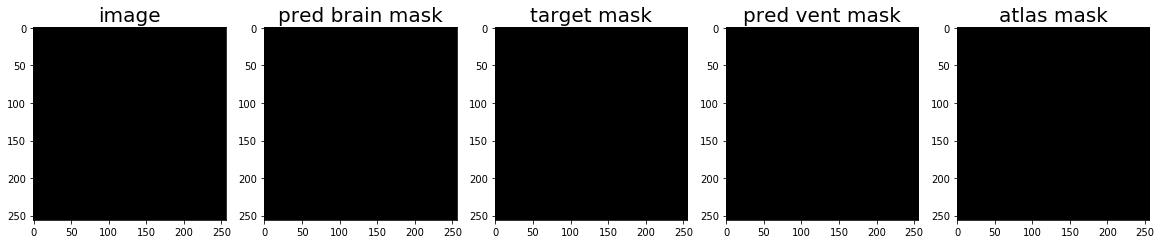

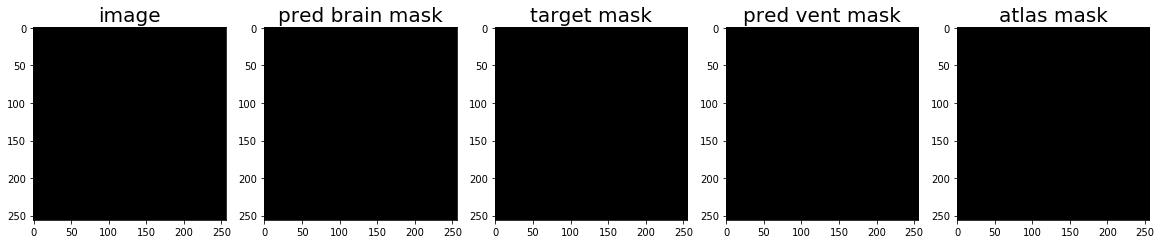

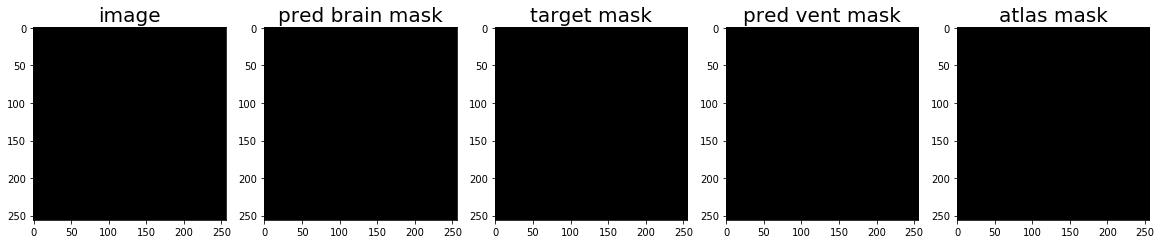

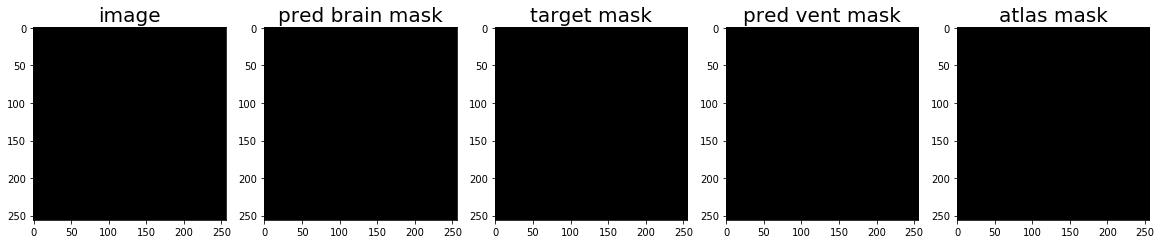

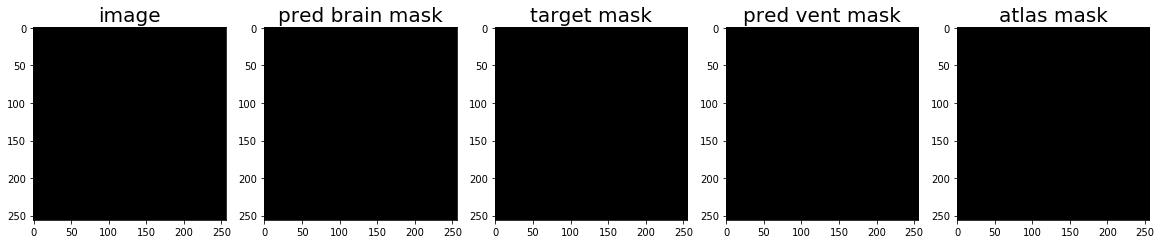

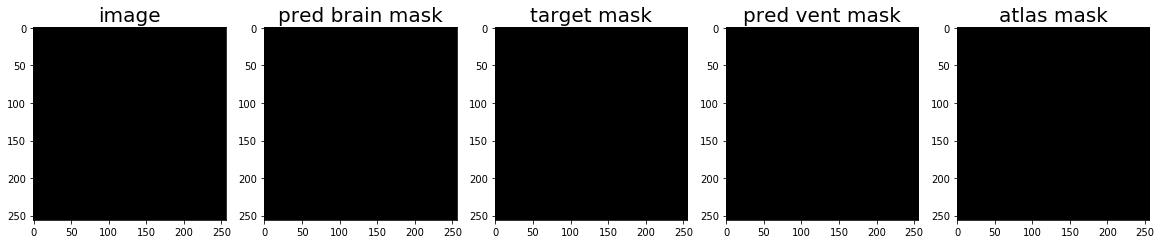

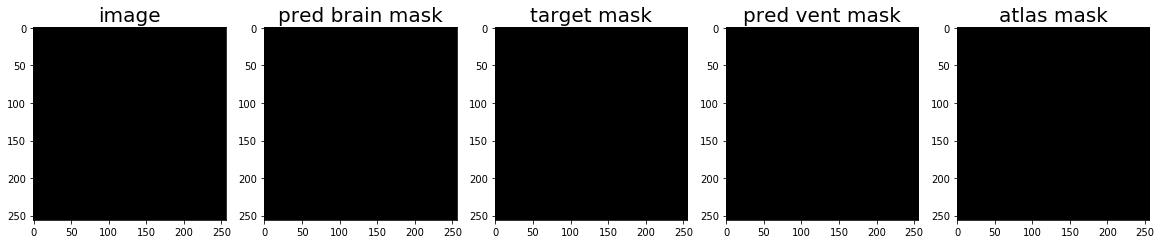

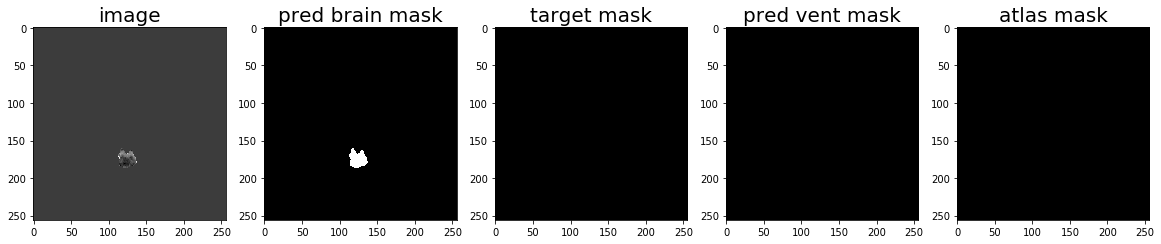

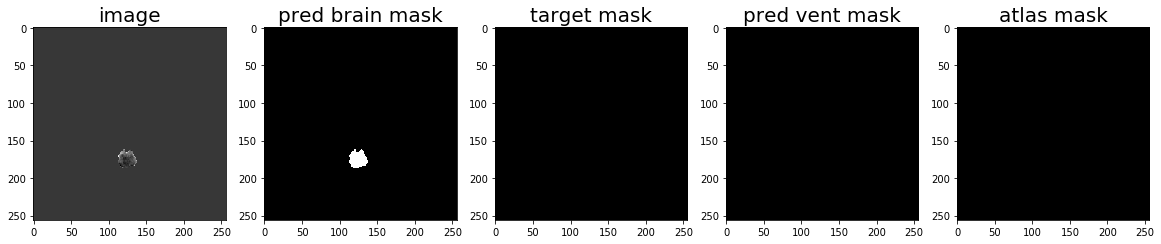

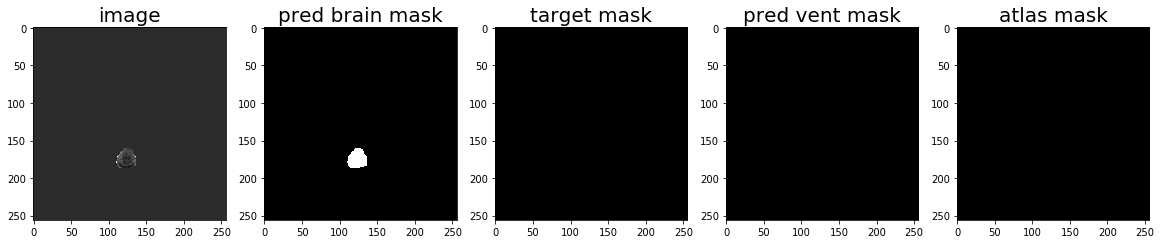

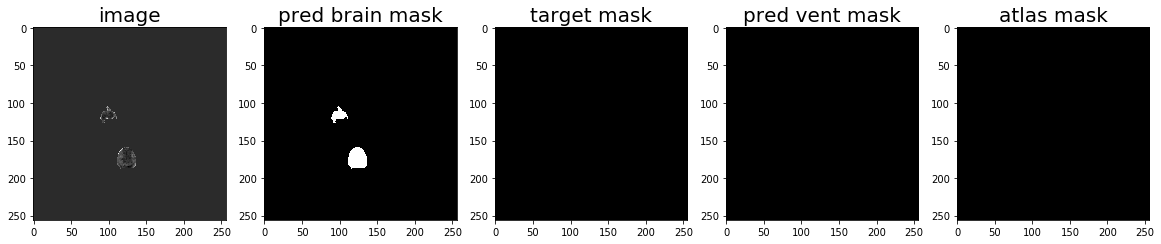

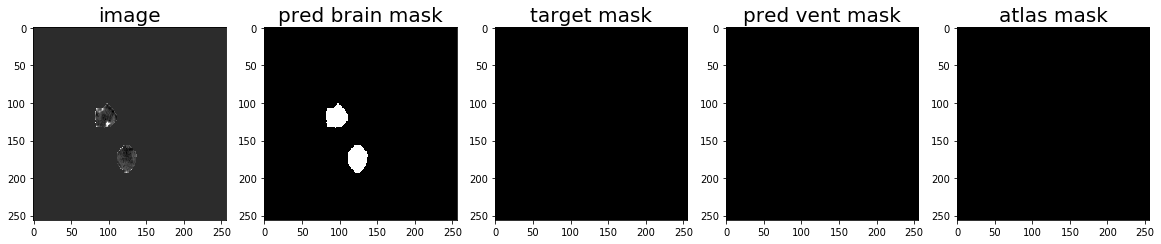

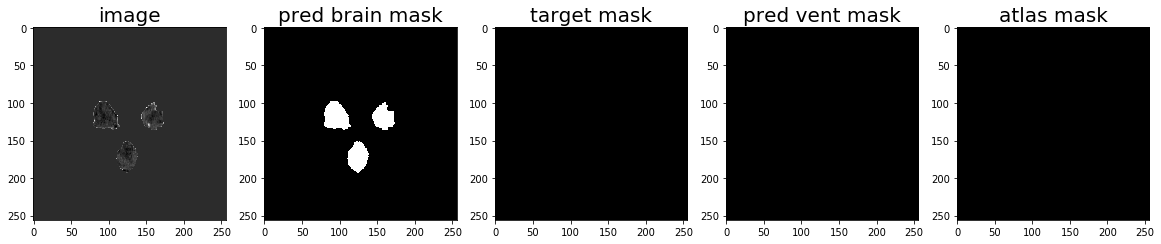

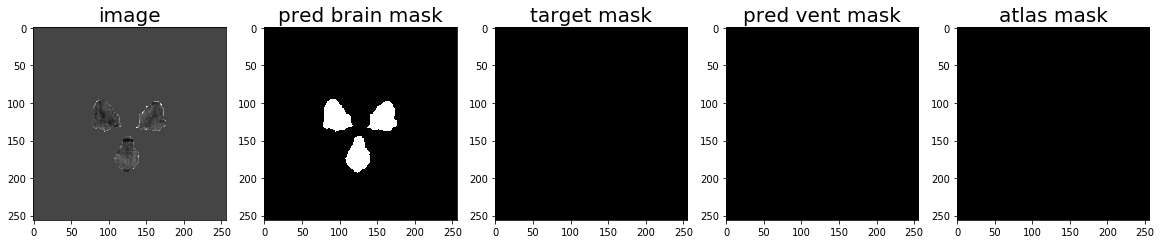

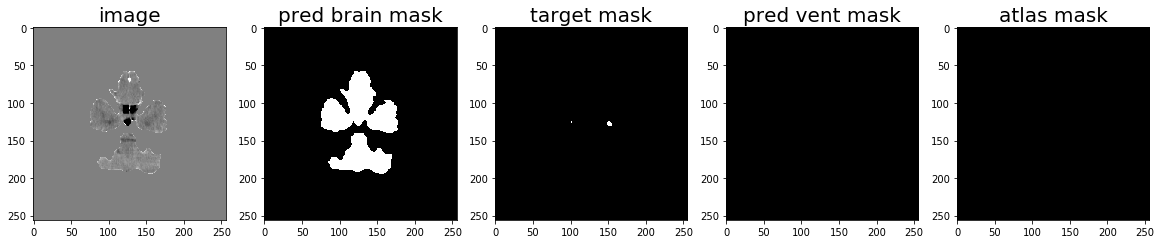

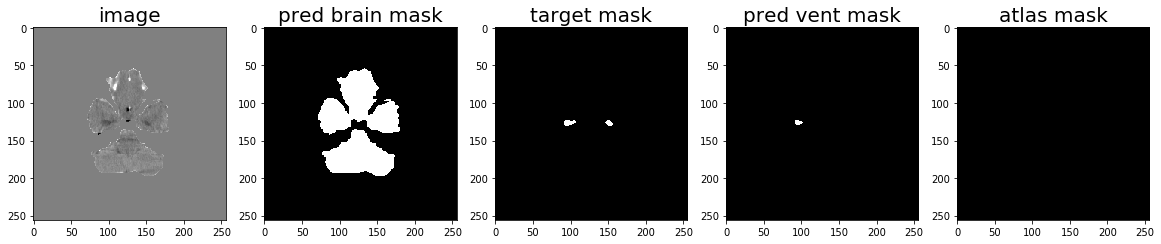

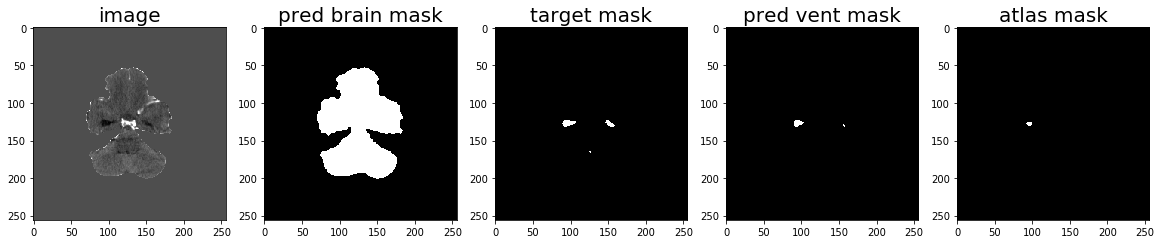

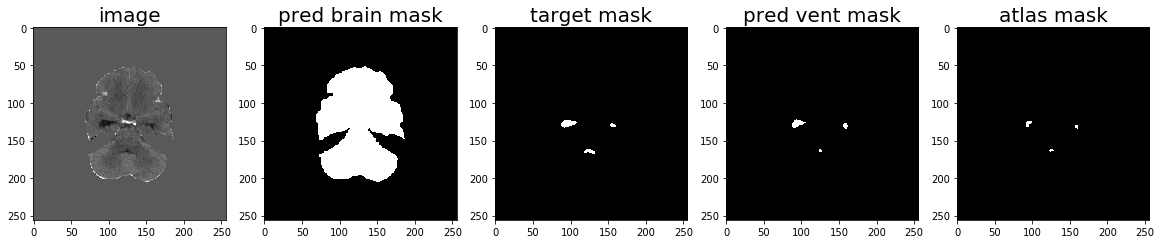

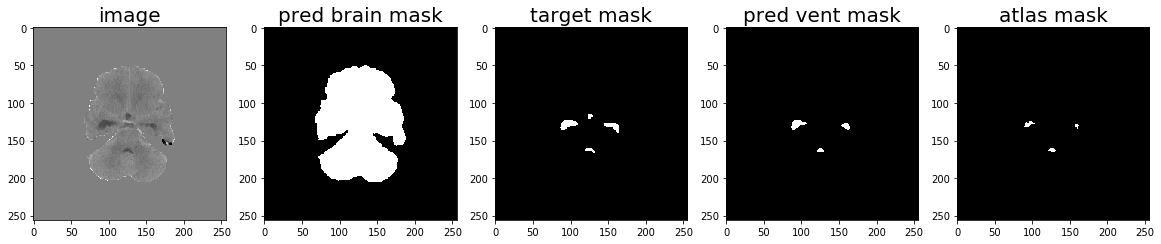

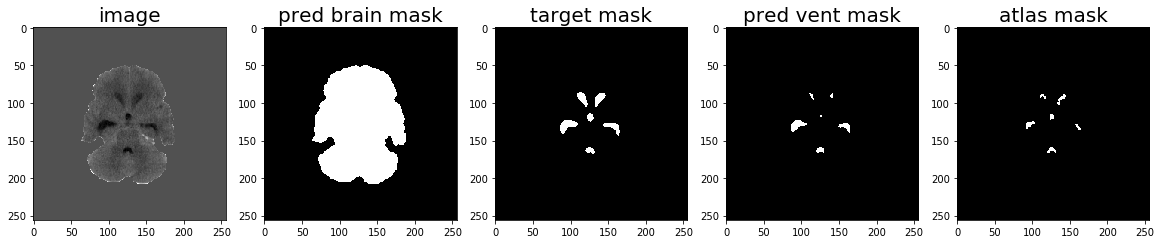

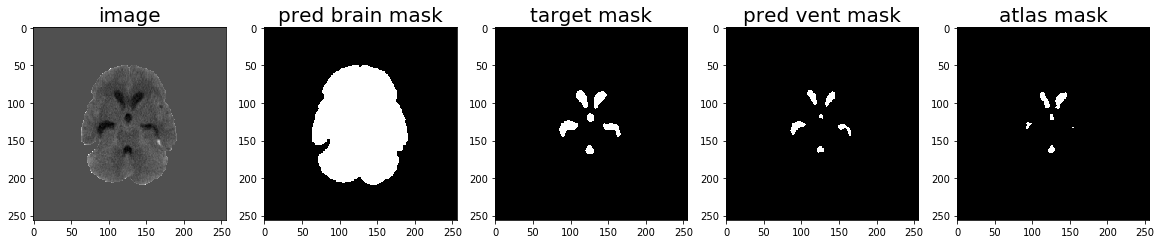

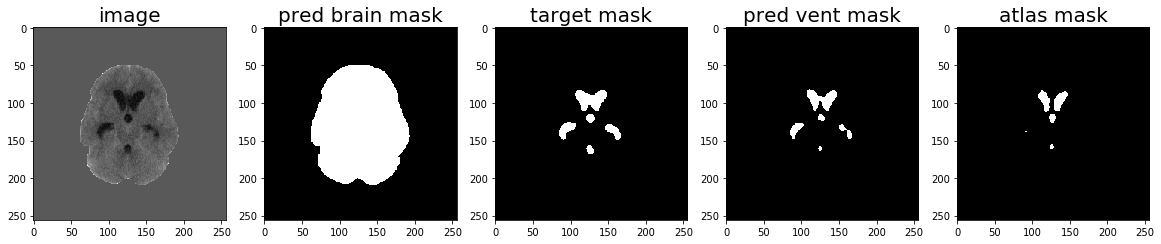

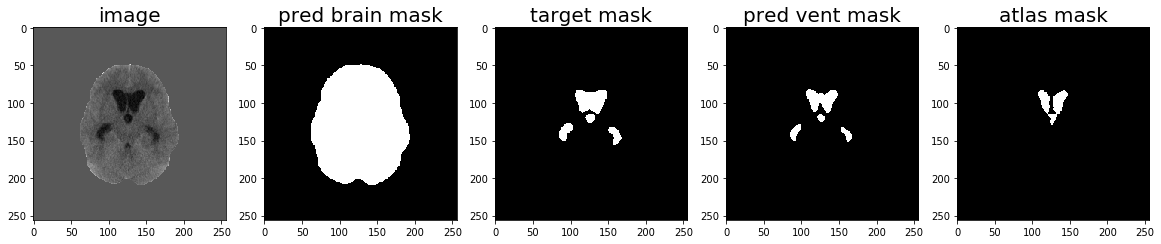

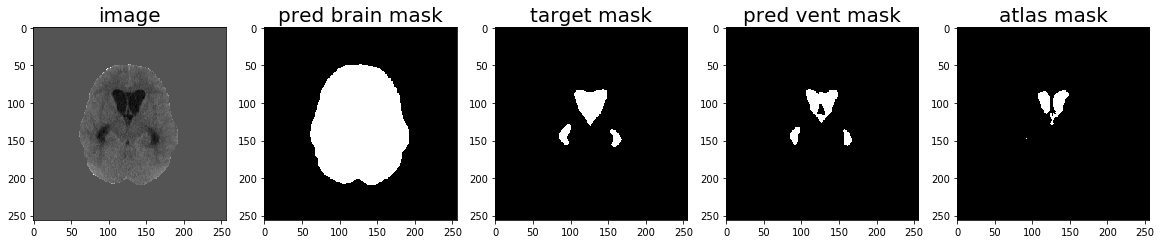

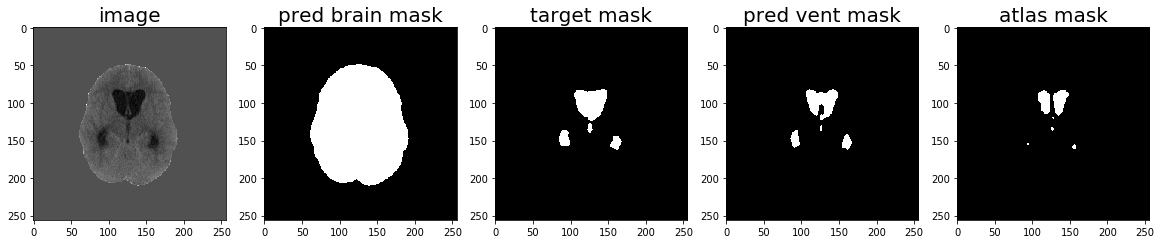

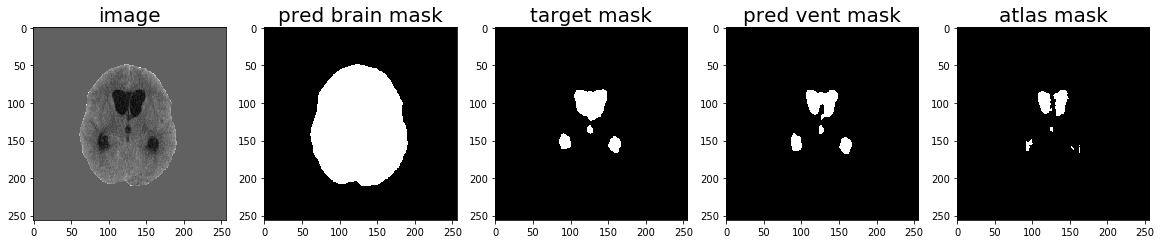

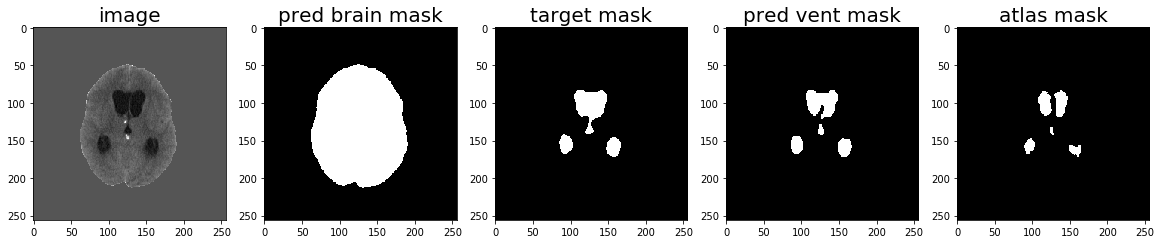

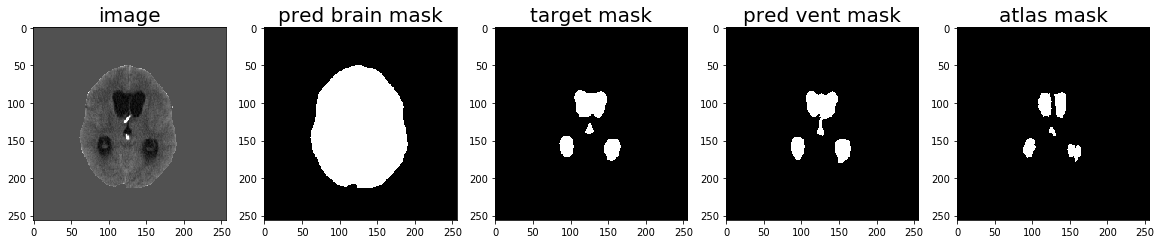

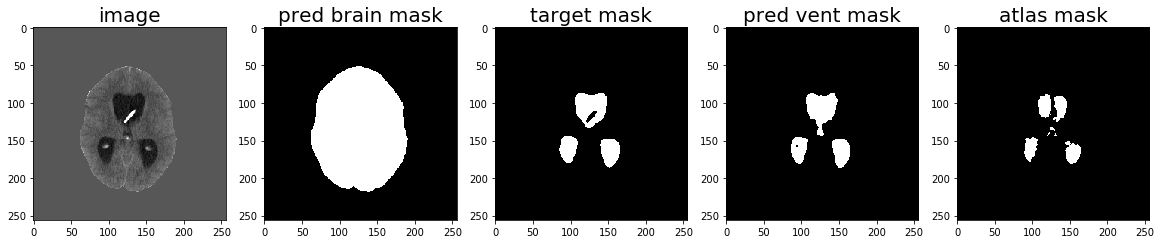

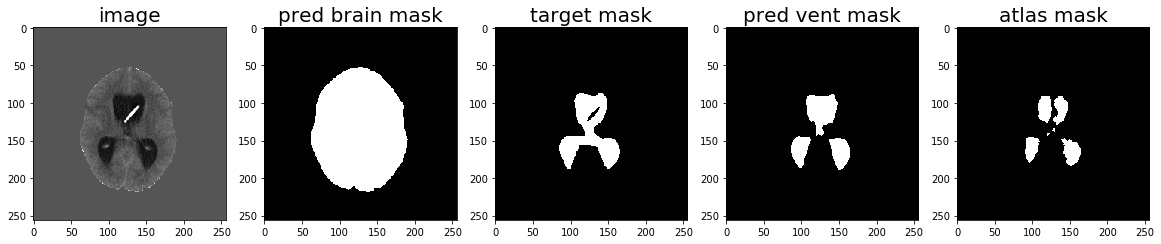

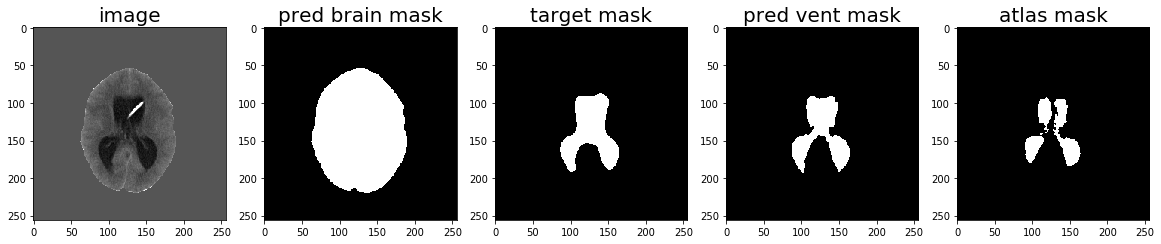

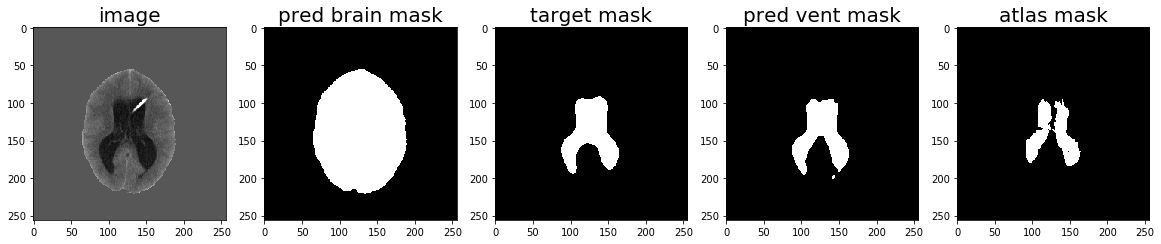

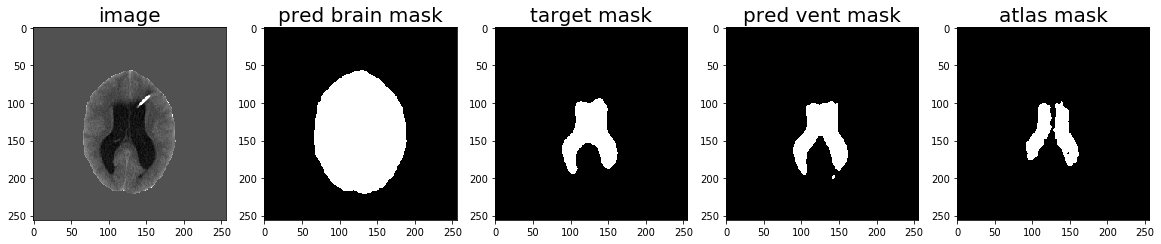

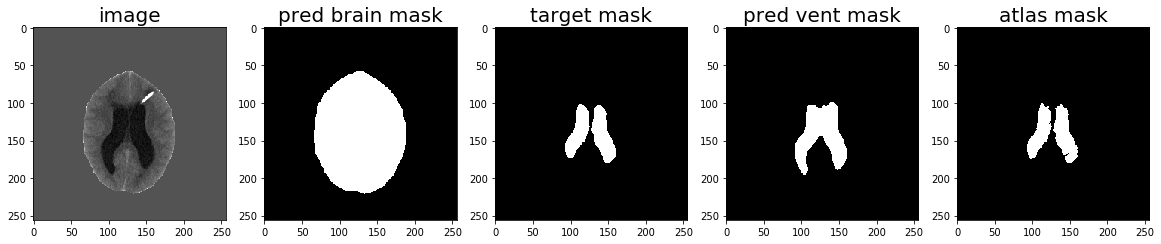

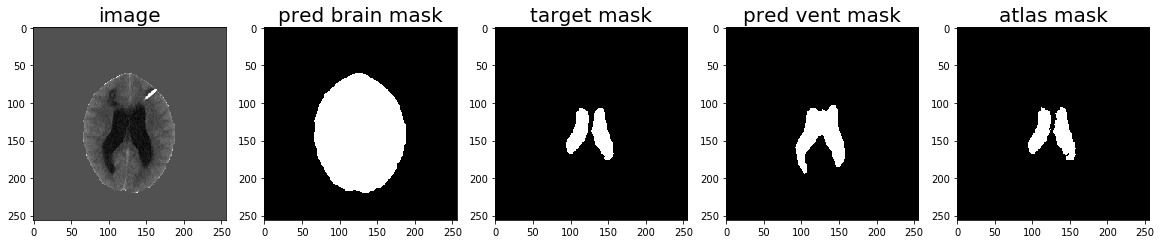

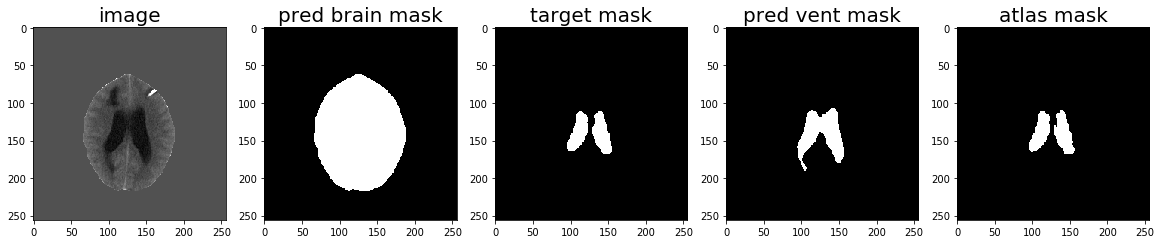

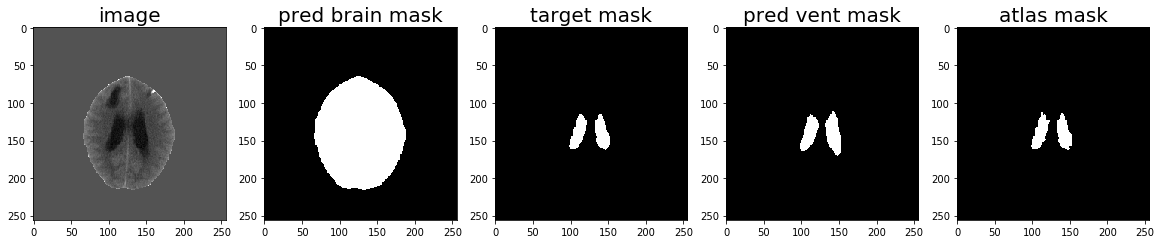

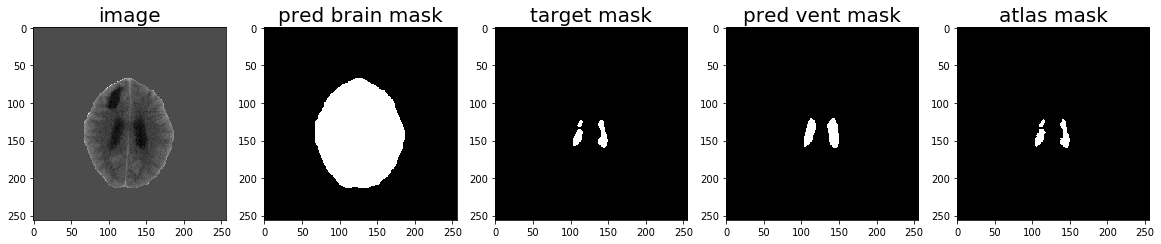

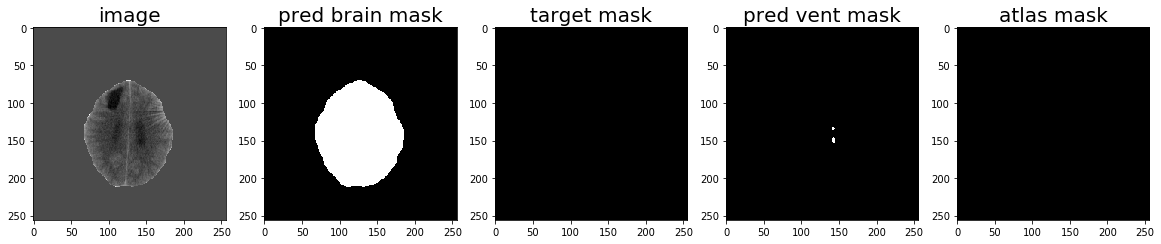

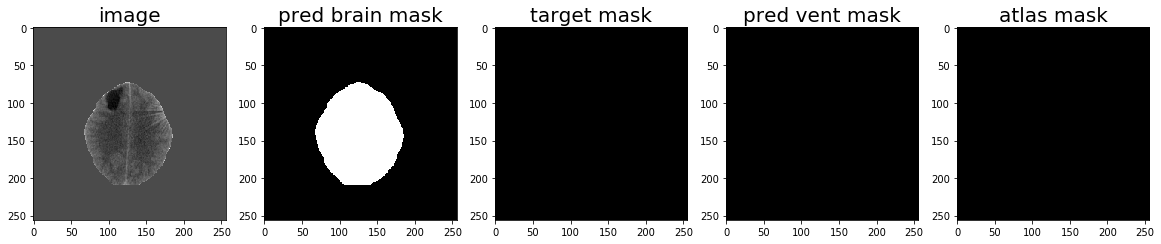

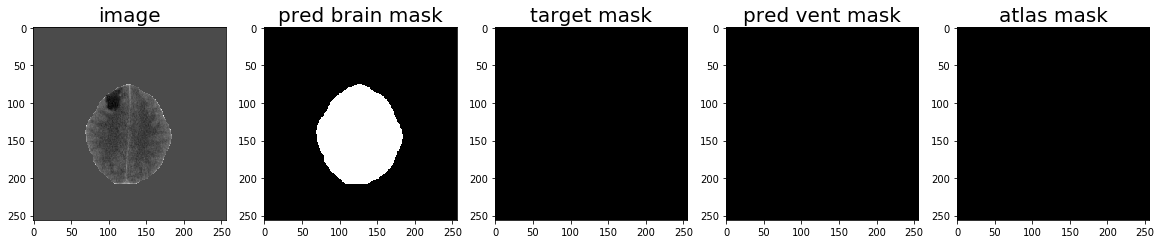

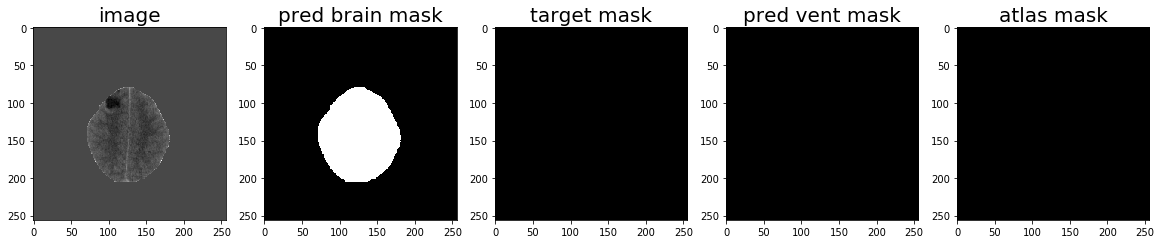

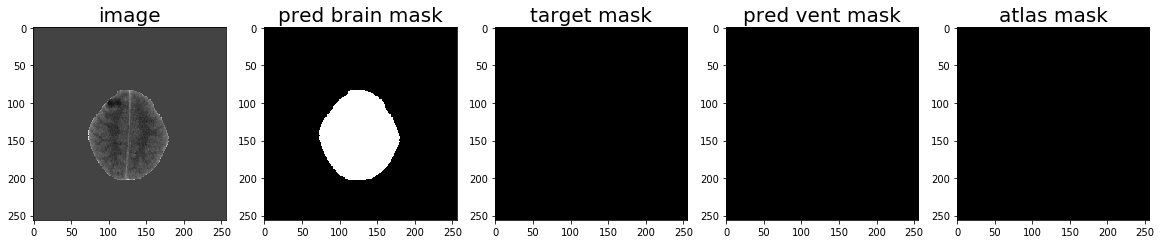

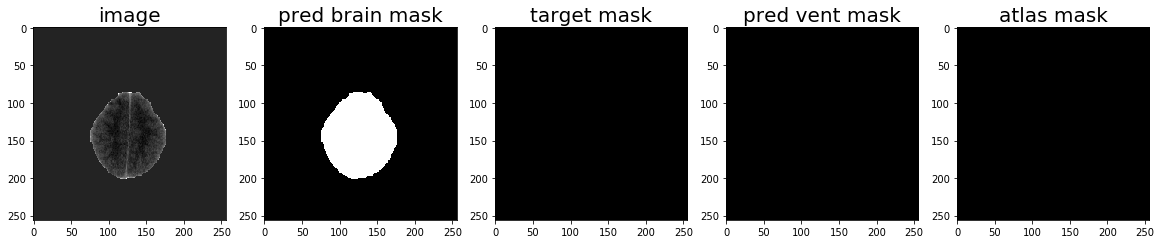

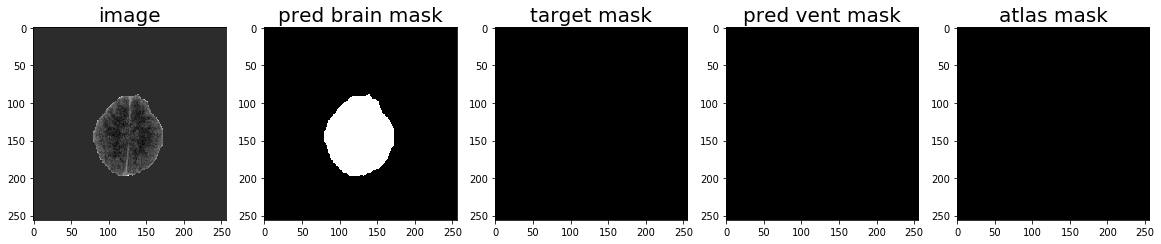

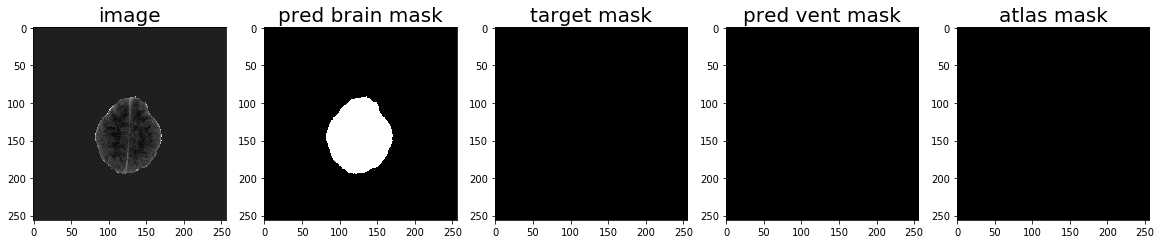

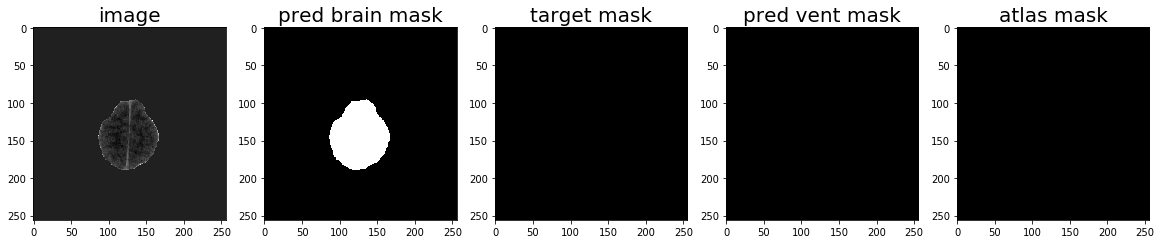

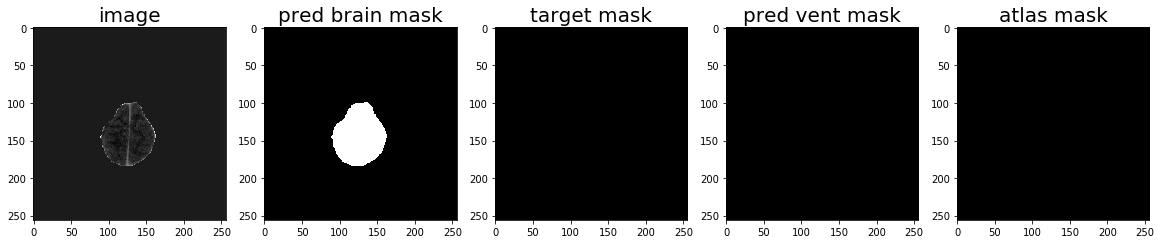

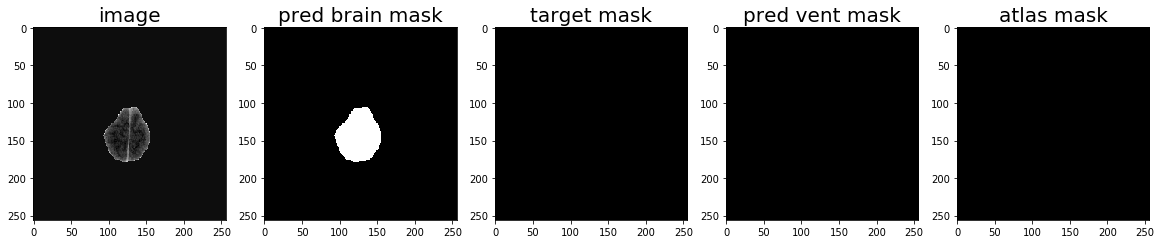

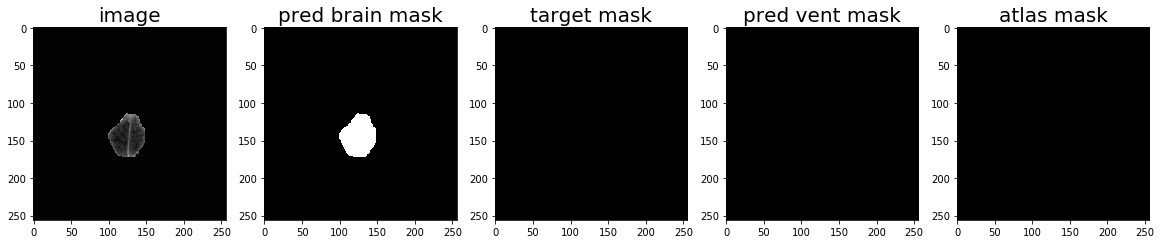

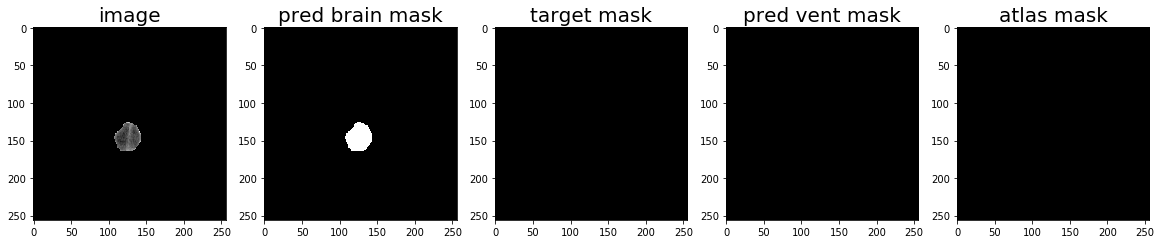

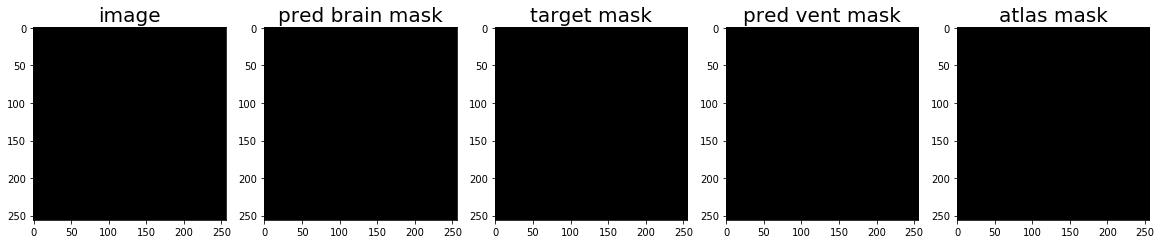

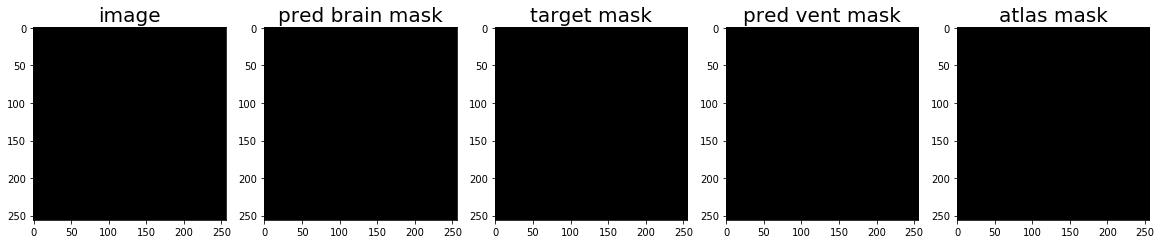

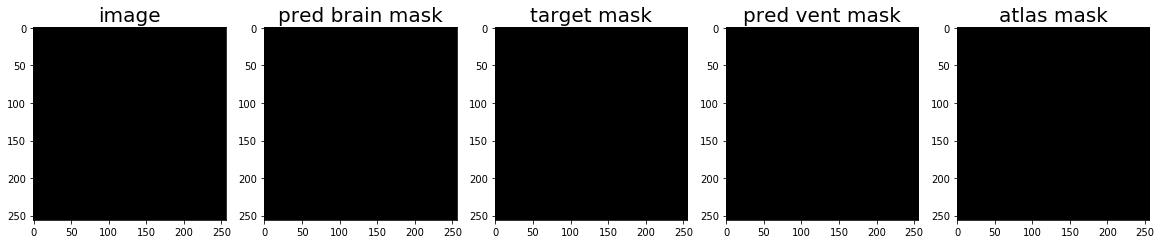

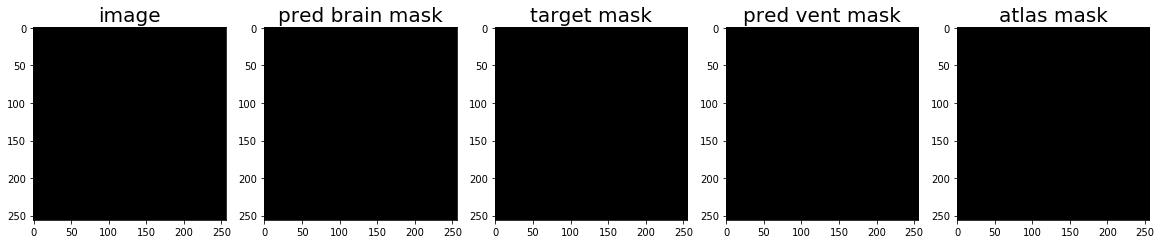

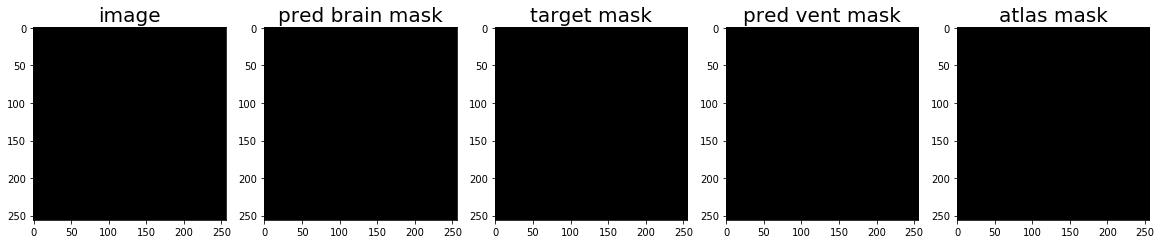

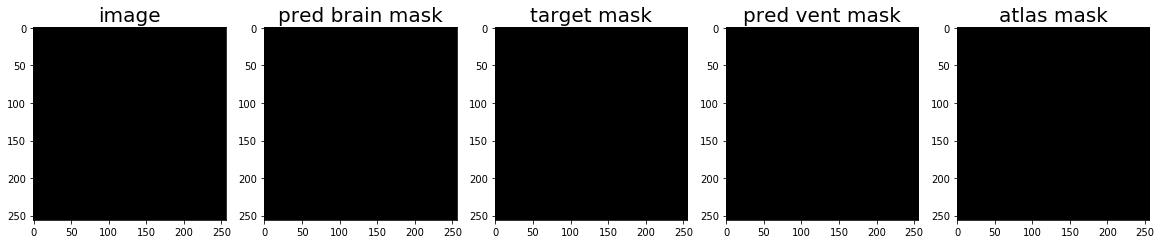

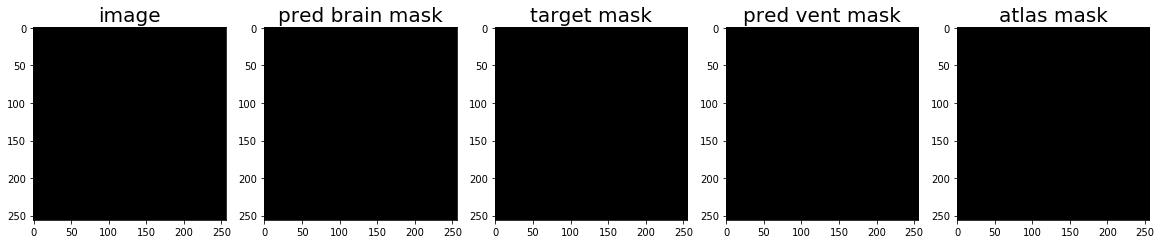

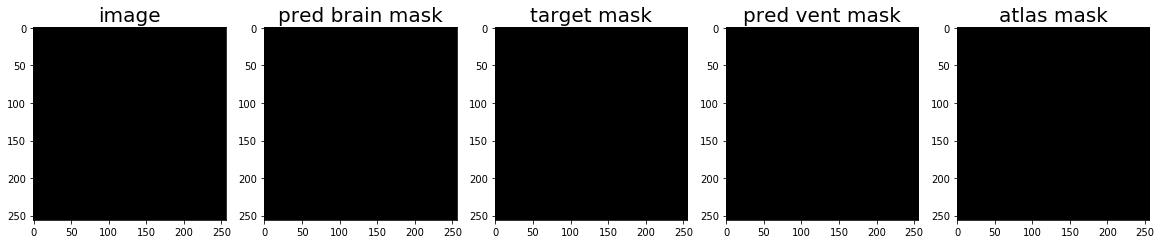

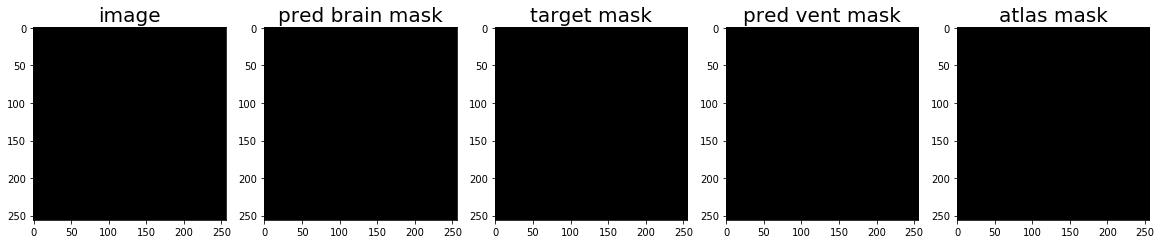

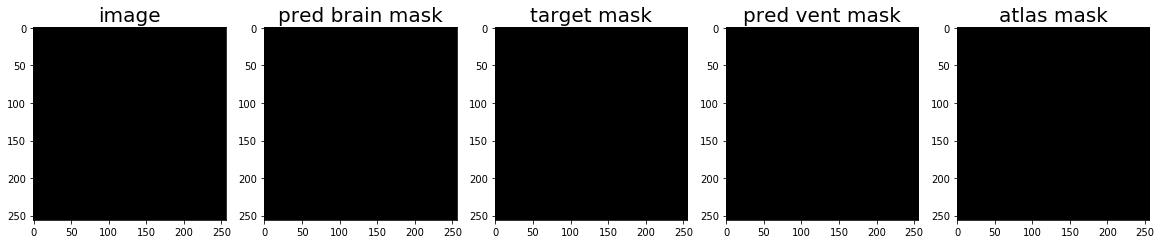

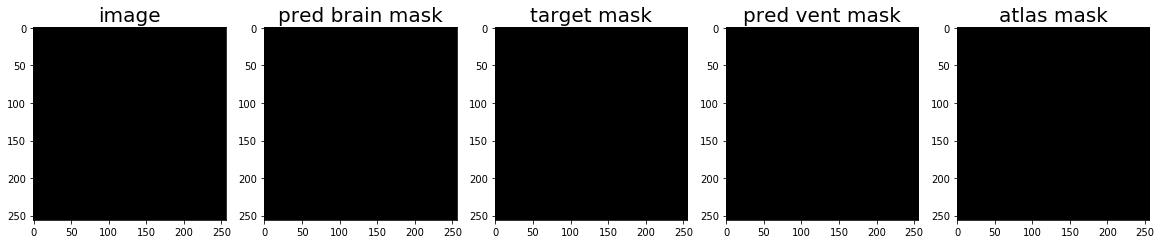

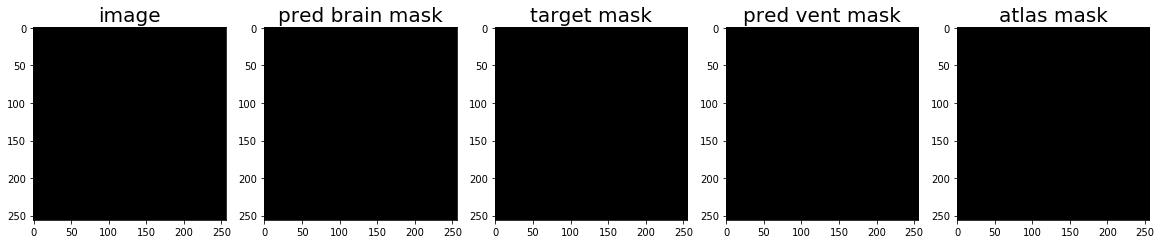

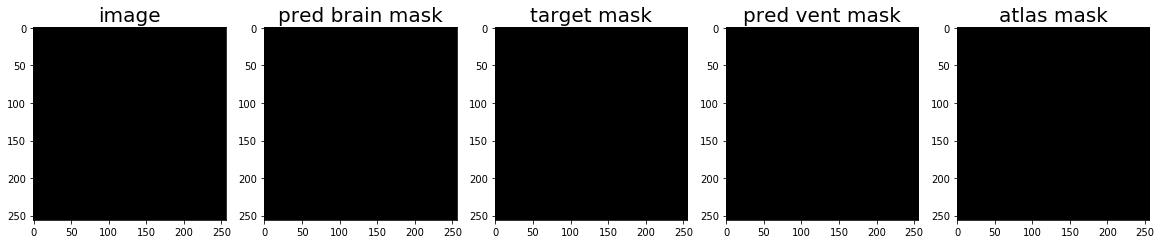

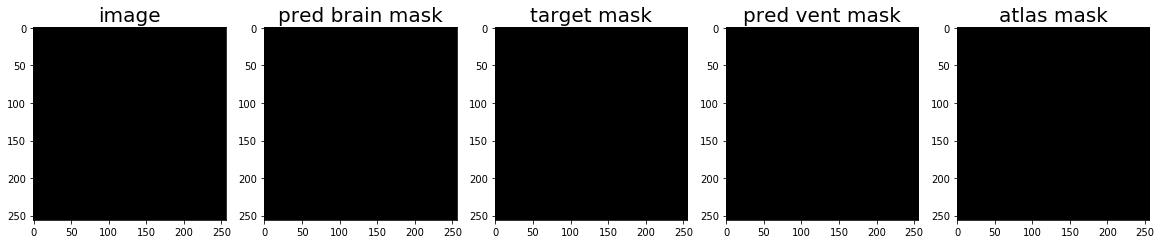

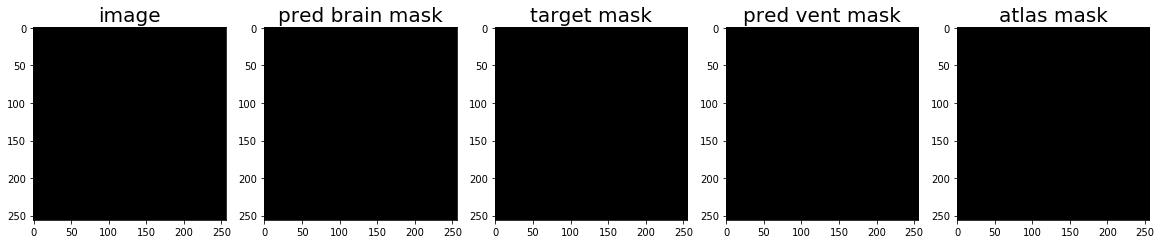

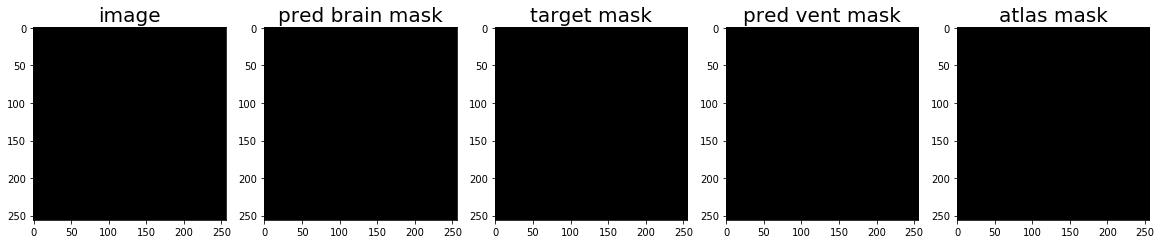

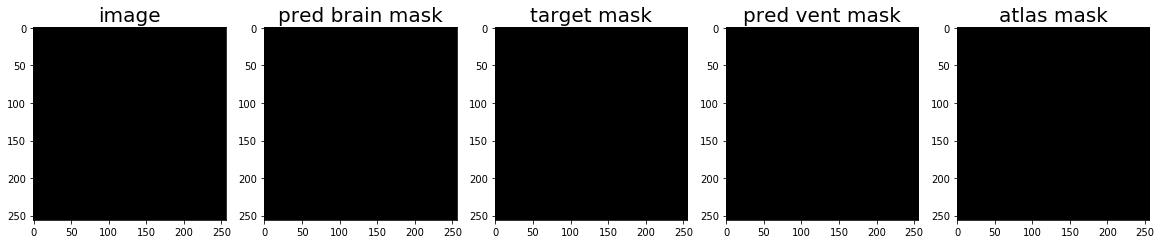

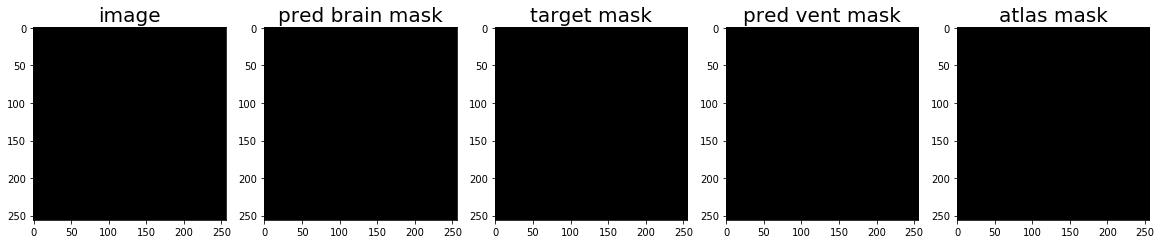

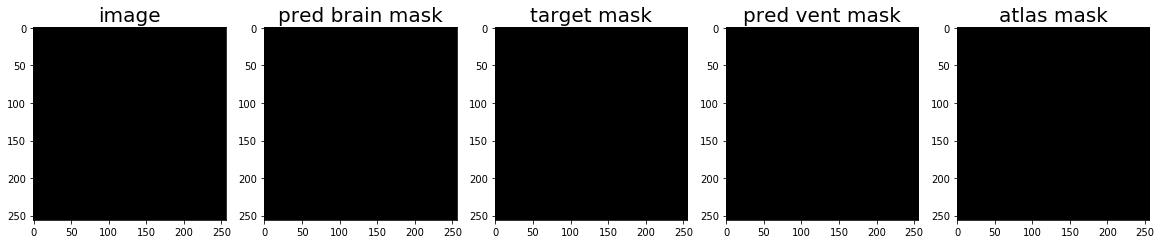

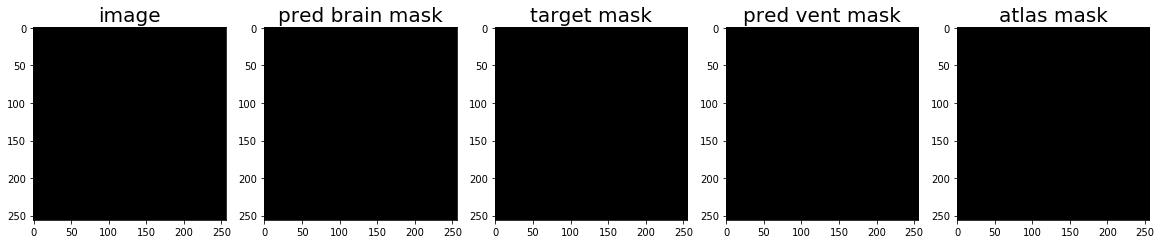

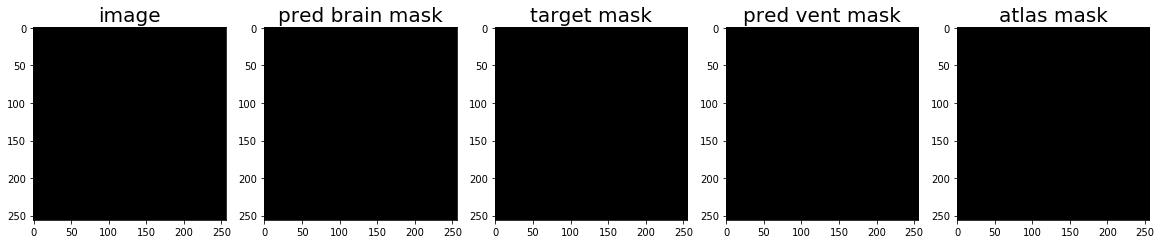

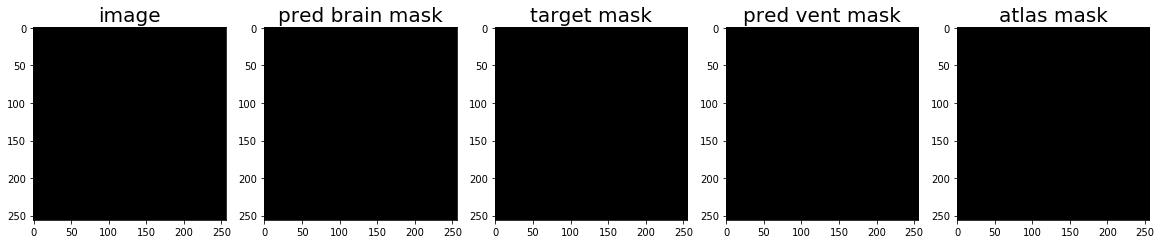

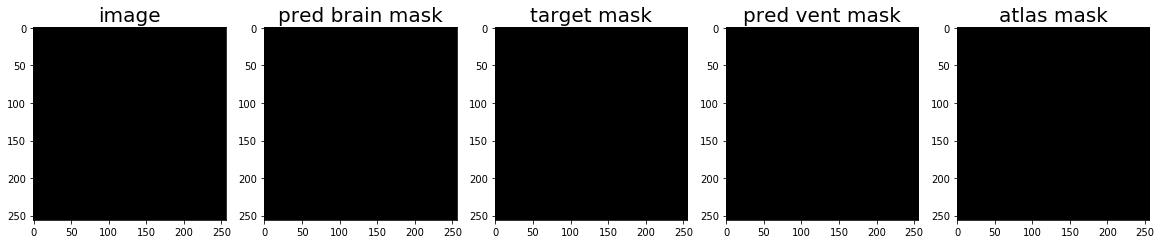

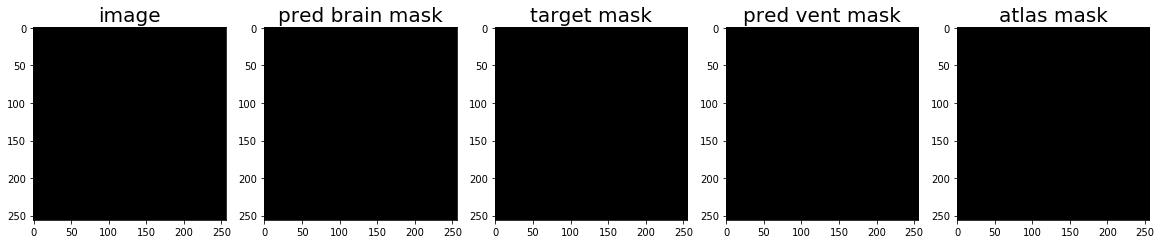

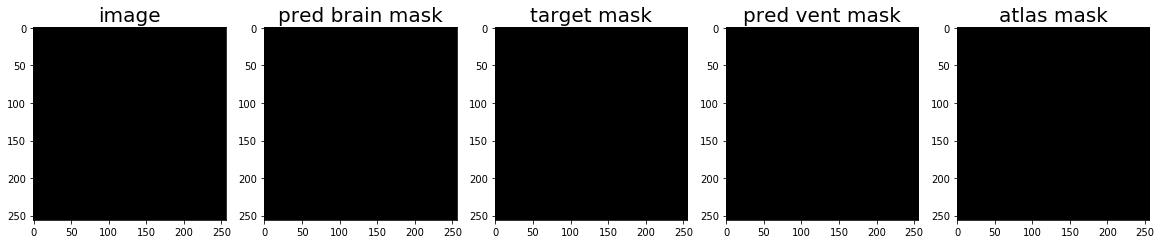

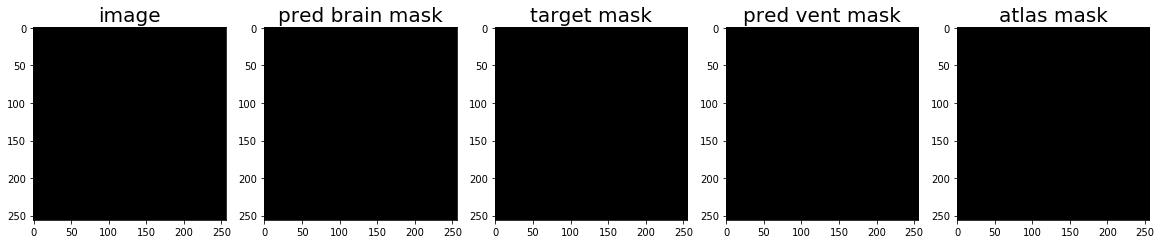

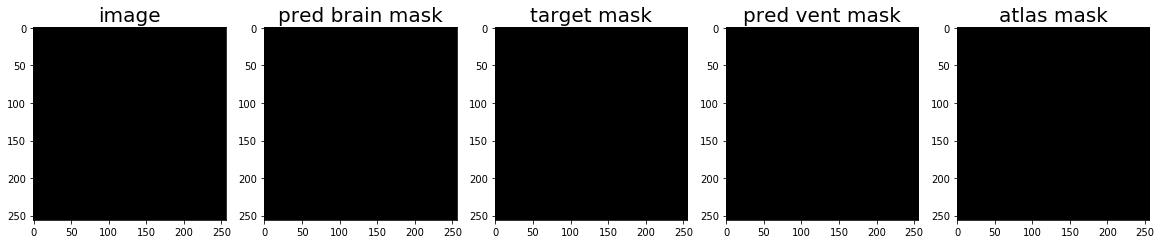

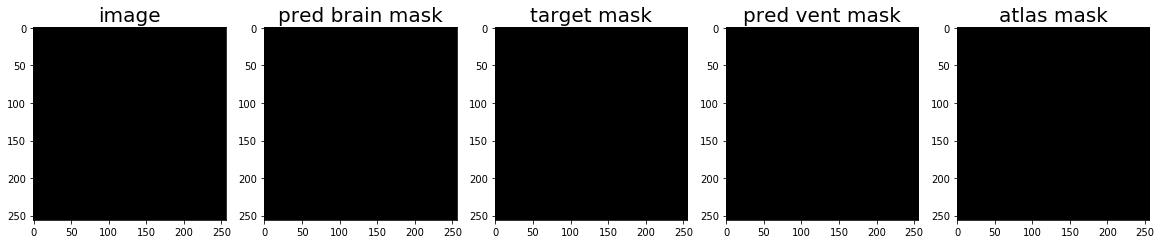

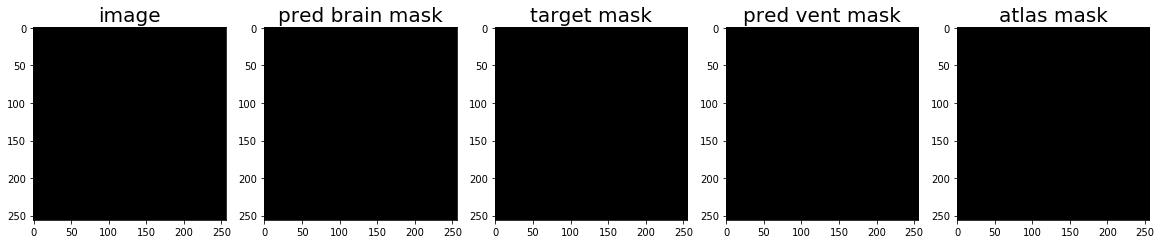

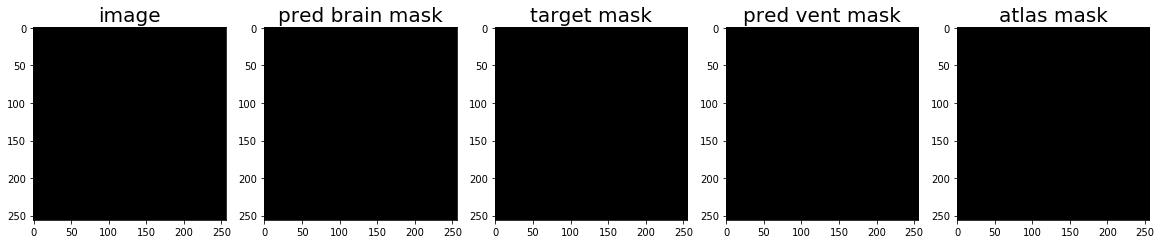

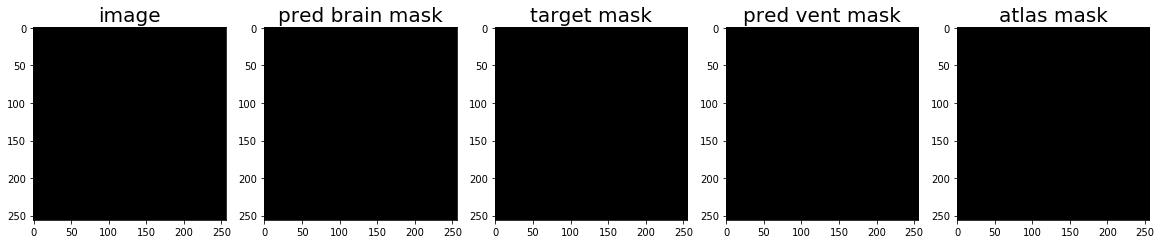

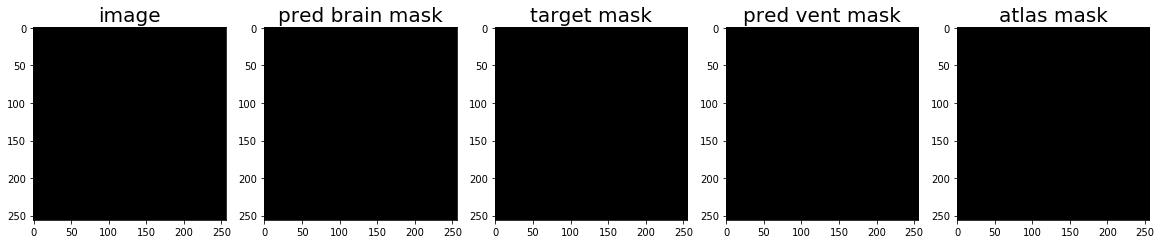

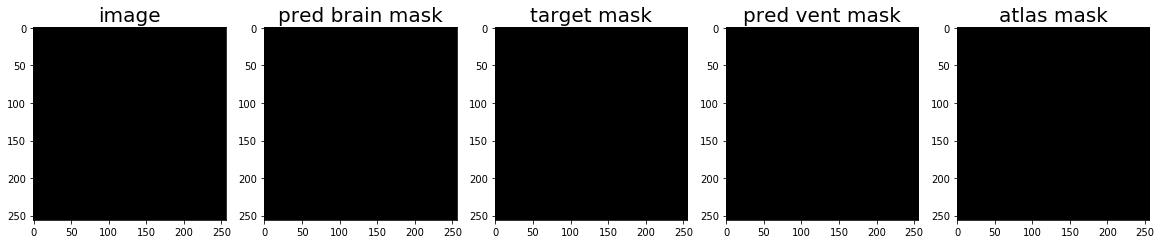

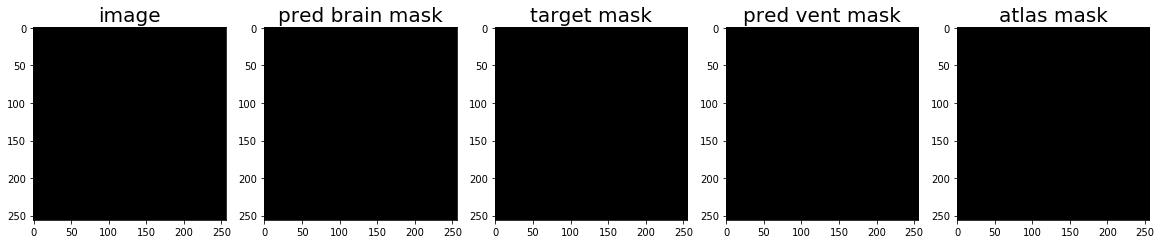

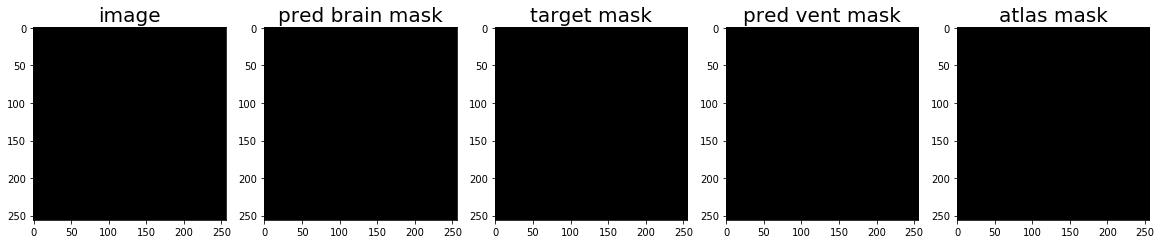

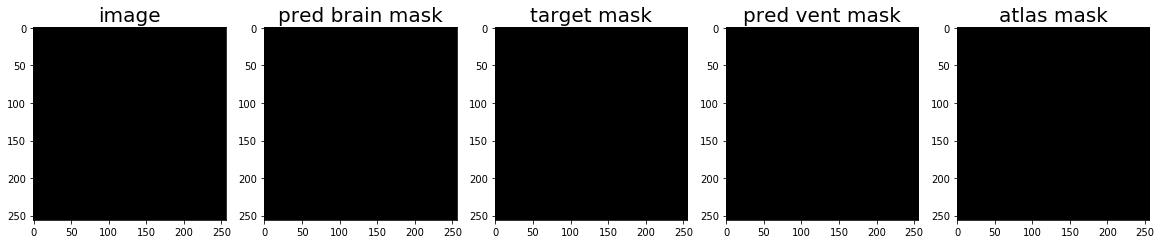

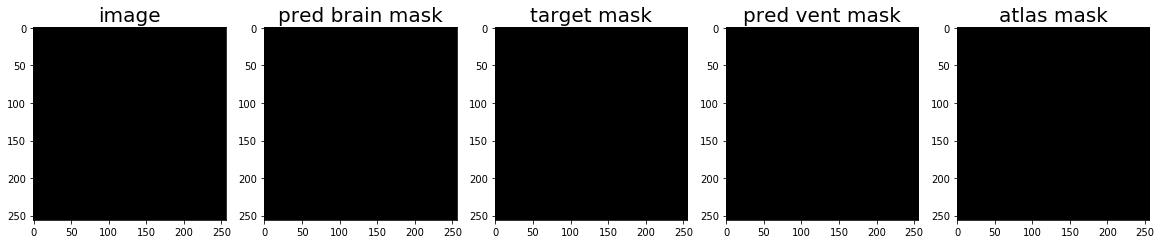

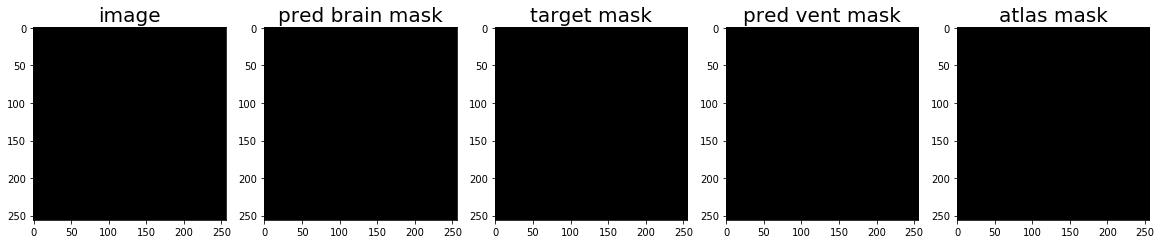

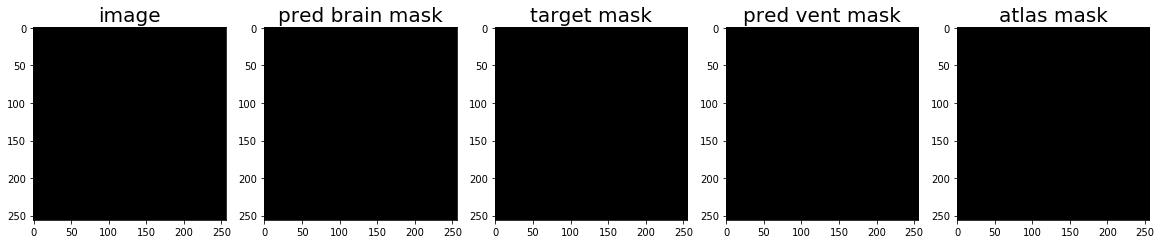

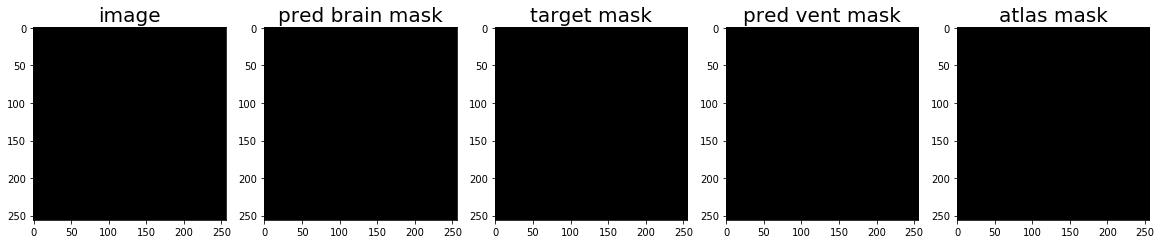

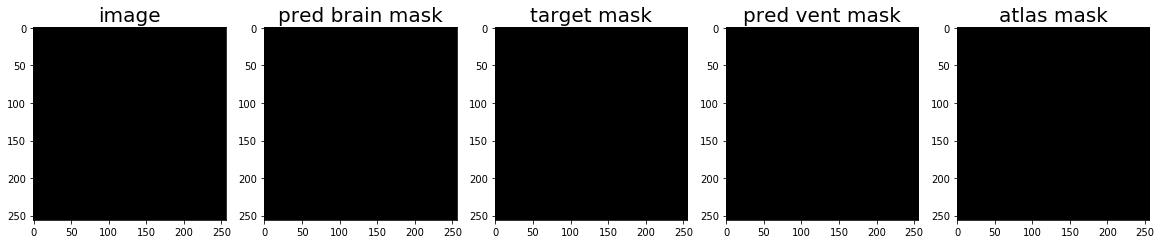

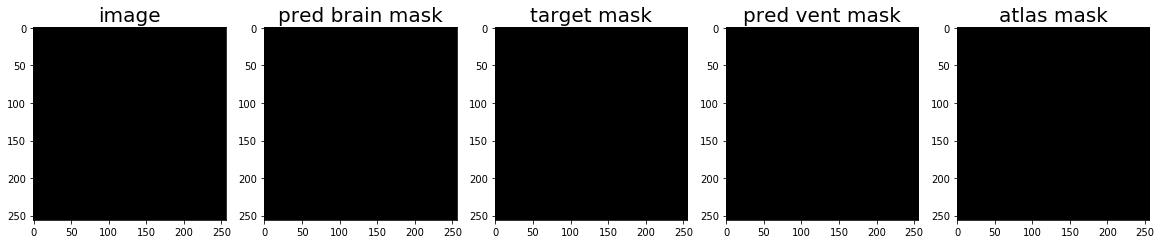

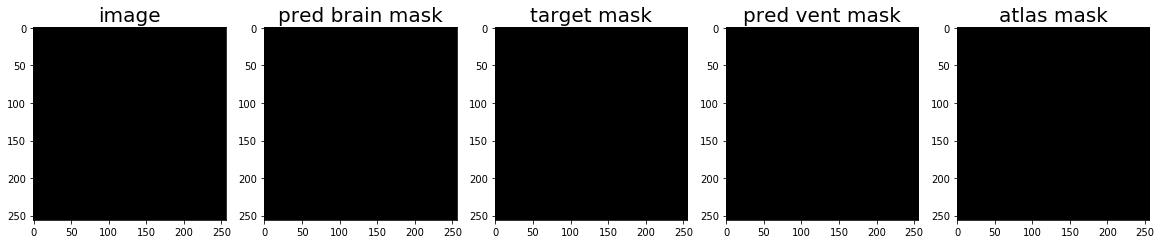

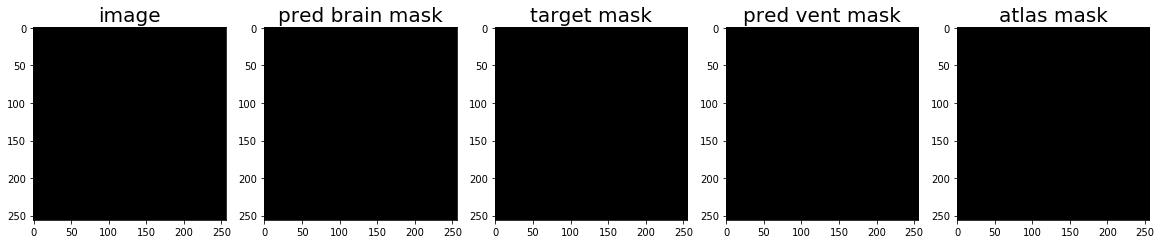

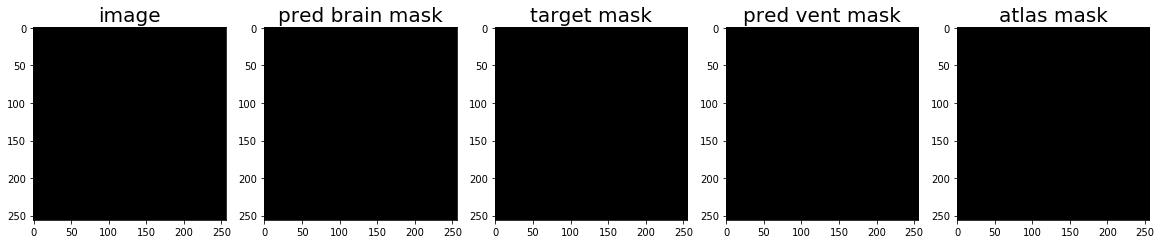

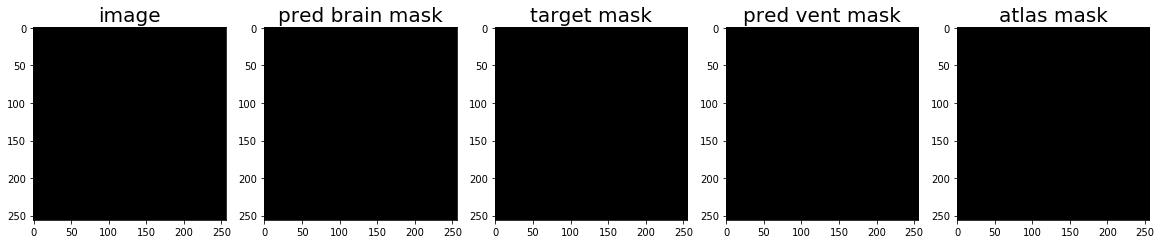

In [21]:
IMG_NUM = 8
image = images[IMG_NUM]
target = target_masks[IMG_NUM]
pred = pred_masks[IMG_NUM]
atlas = atlas_masks[IMG_NUM]
pred_brain = pred_brain_masks[IMG_NUM]

for i in range(image.shape[0]):
    plot_images(image[i], pred_brain[i], target[i], pred[i], atlas[i])

## Overlay View

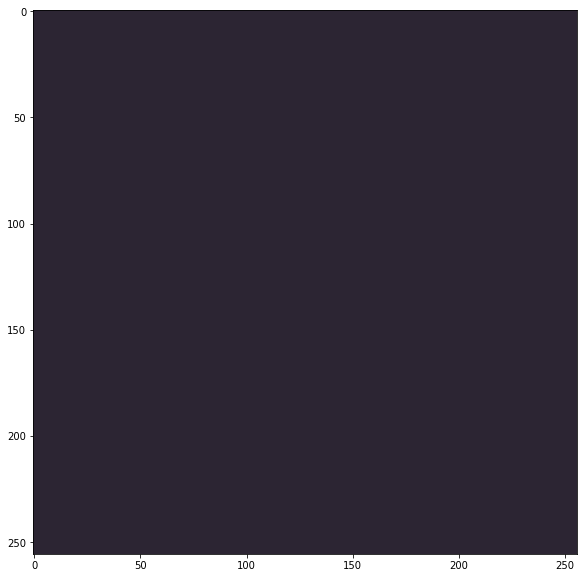

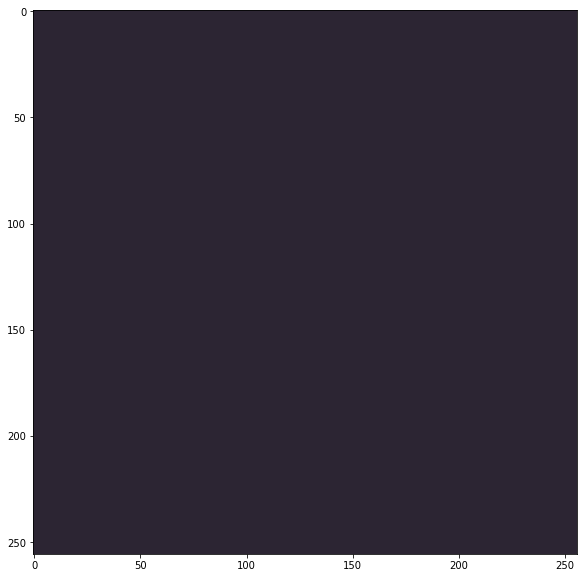

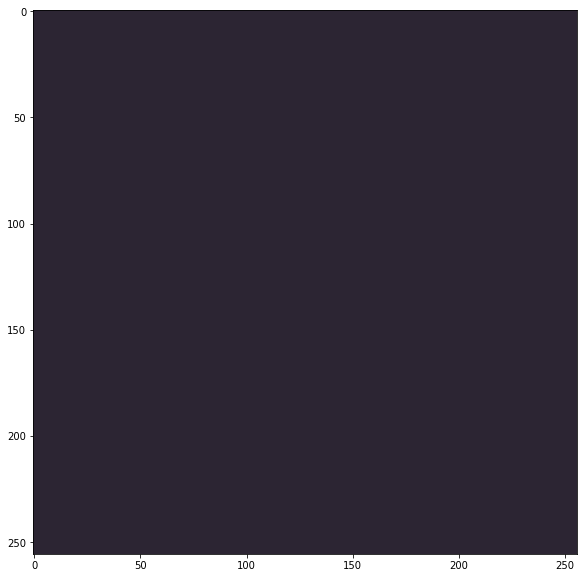

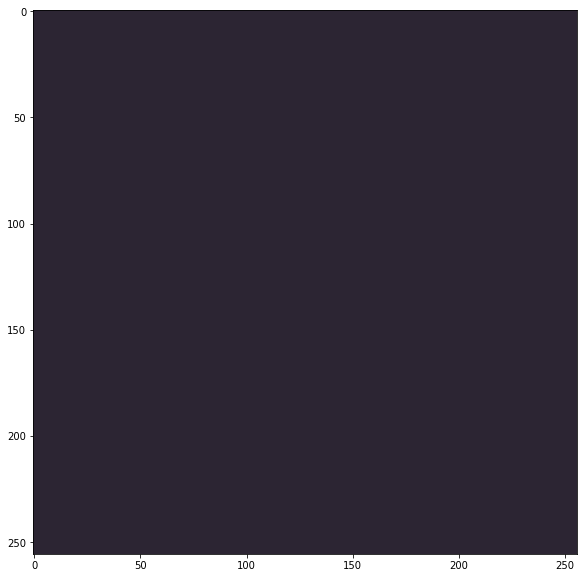

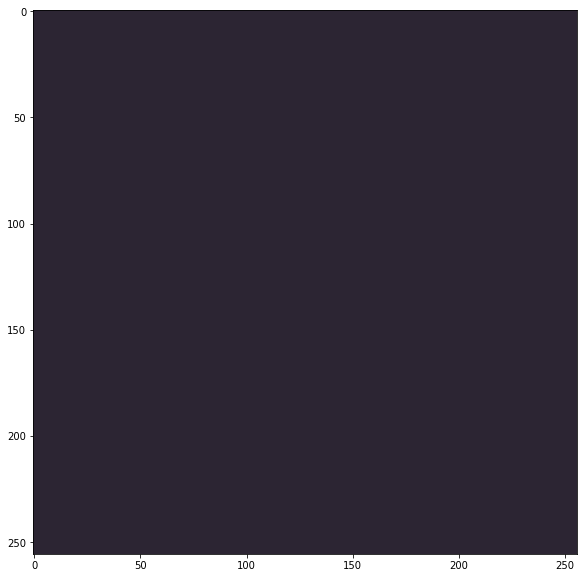

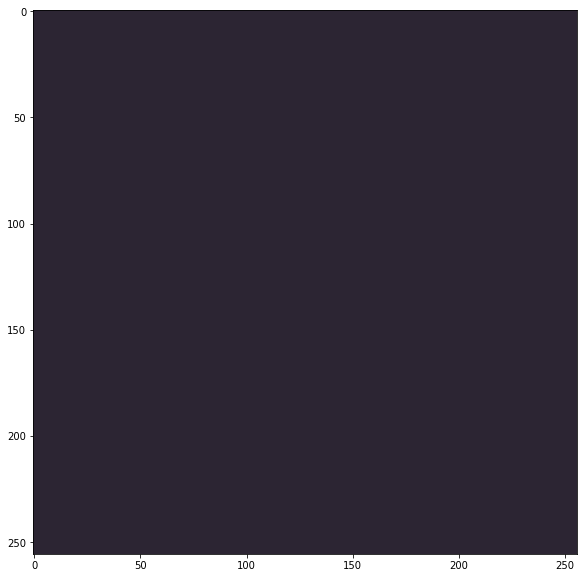

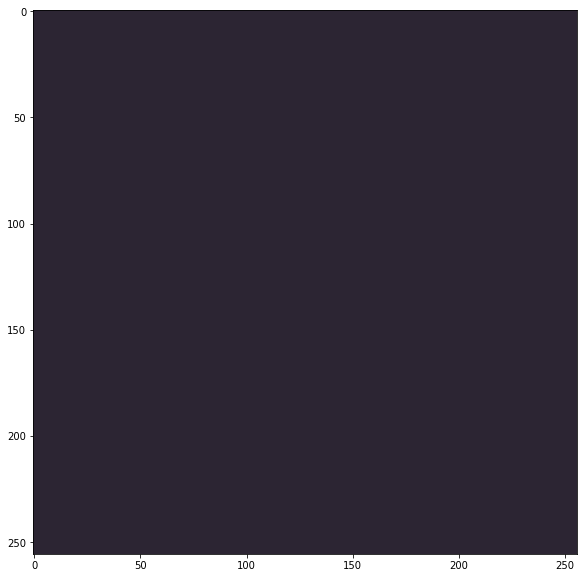

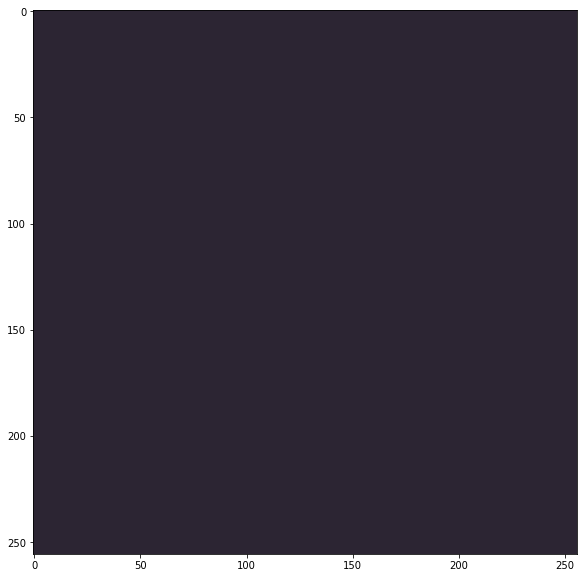

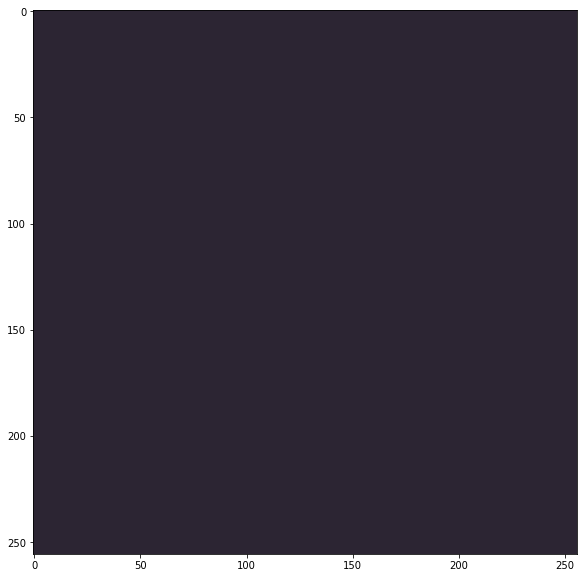

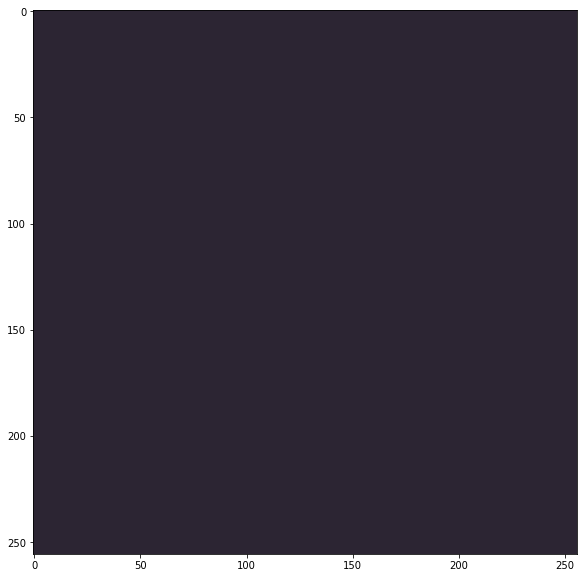

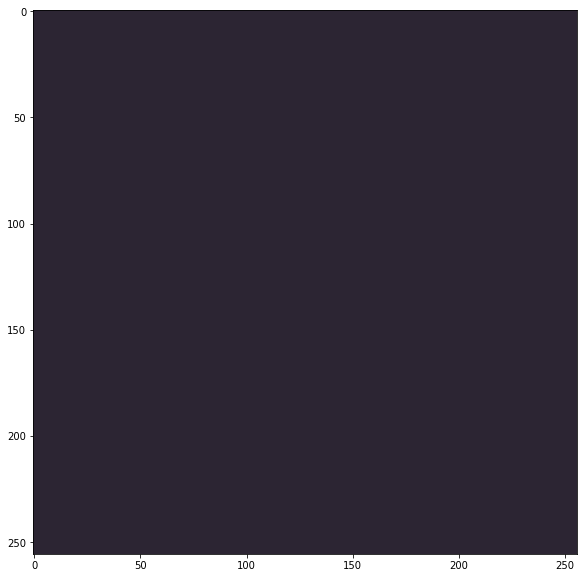

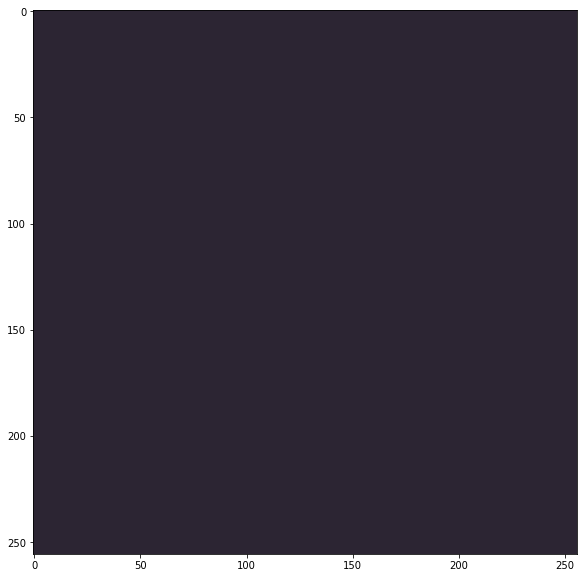

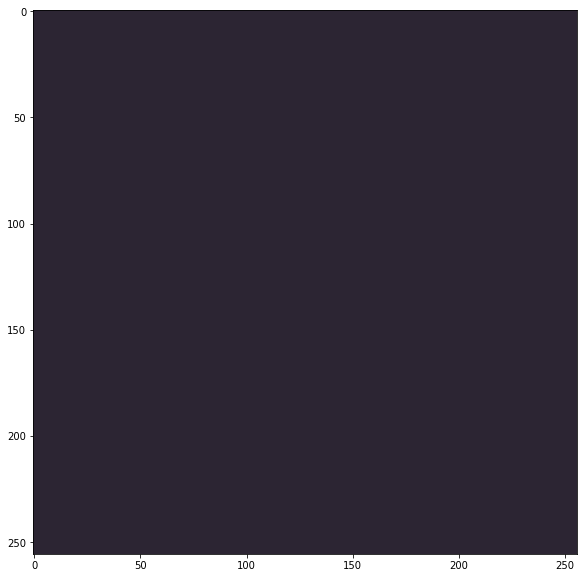

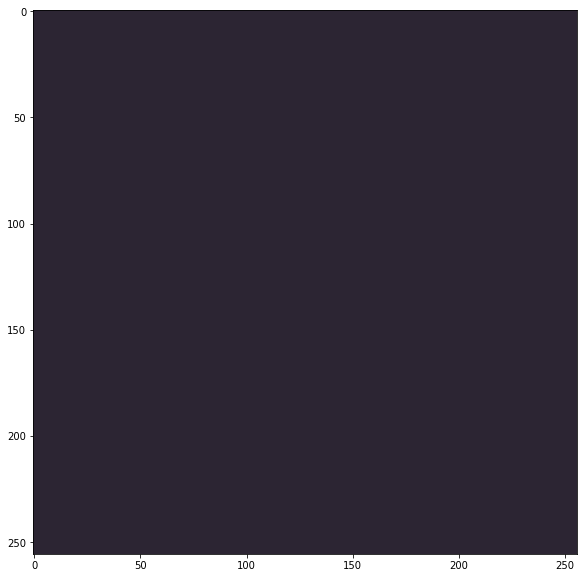

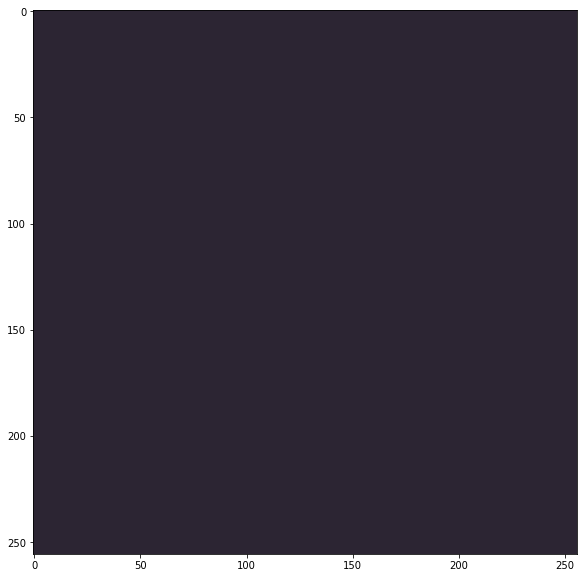

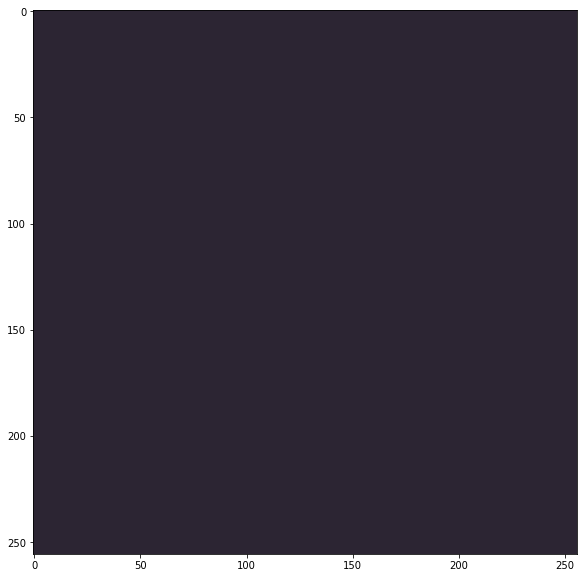

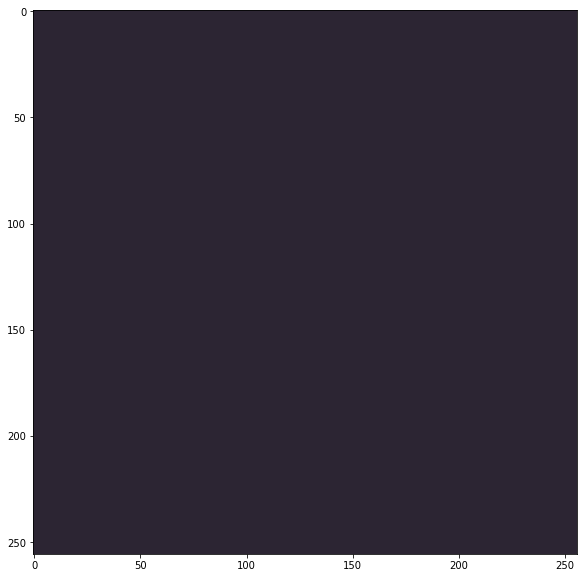

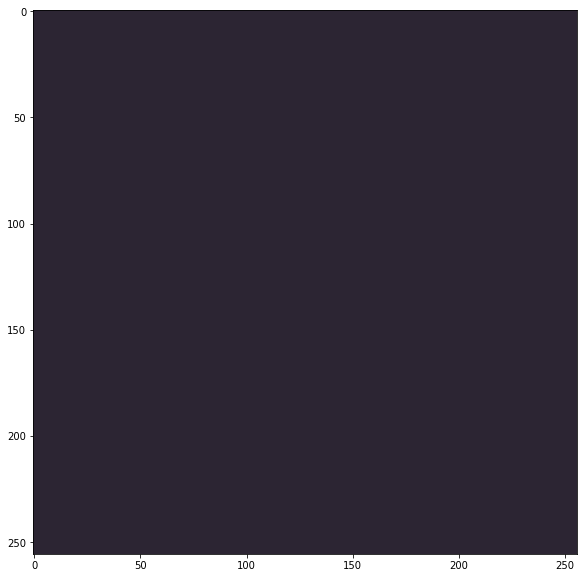

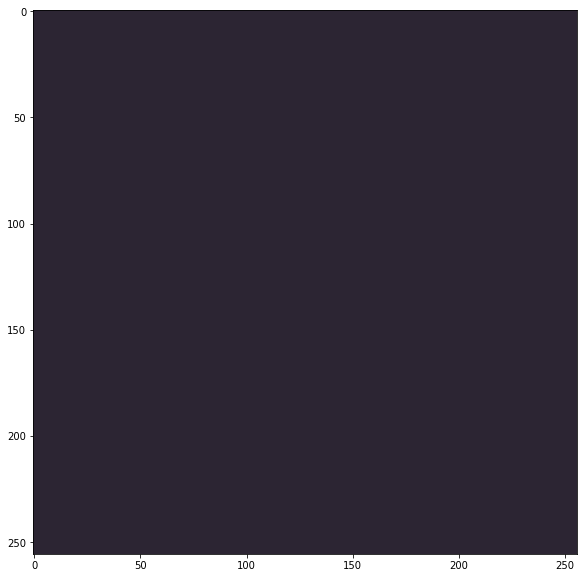

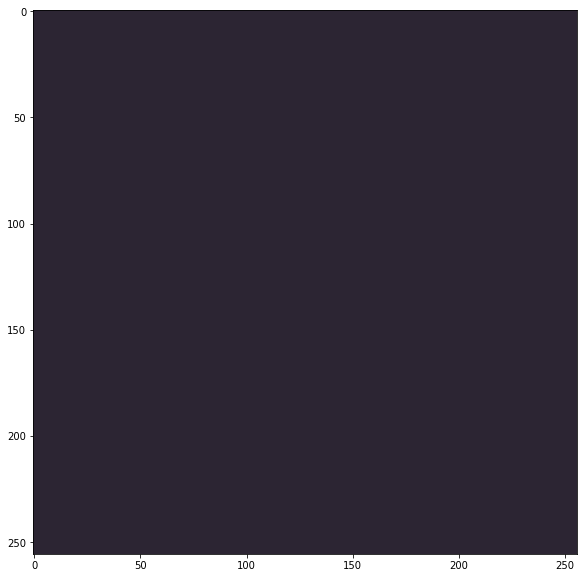

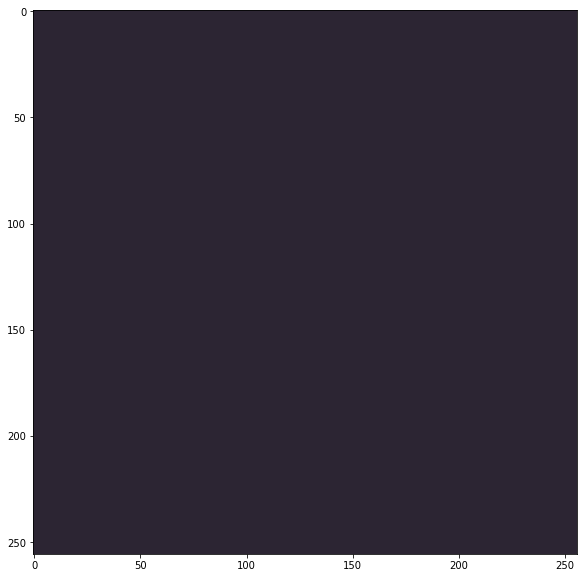

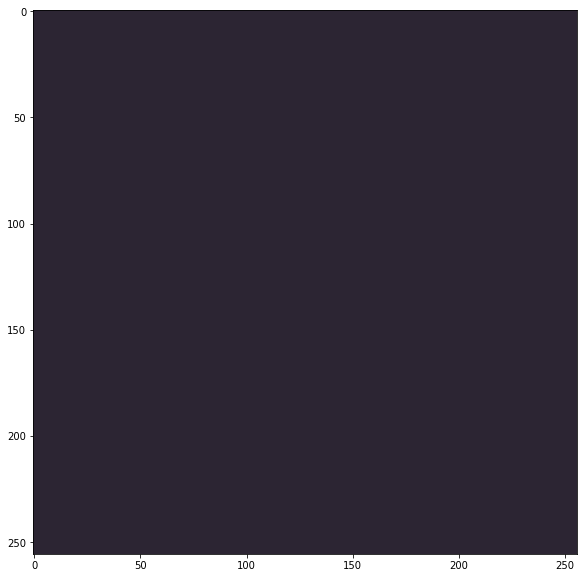

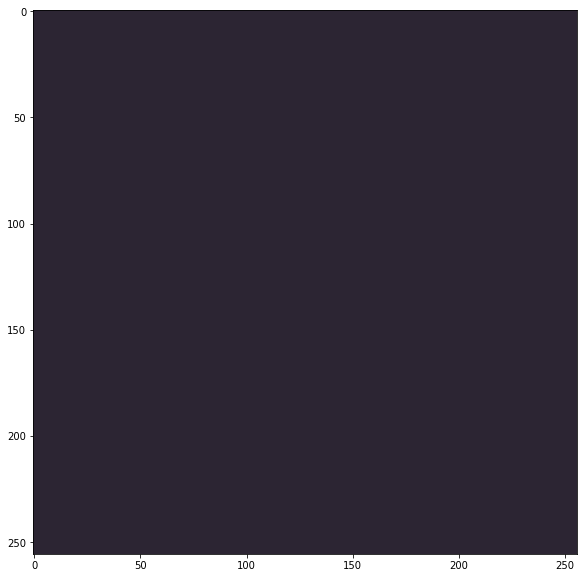

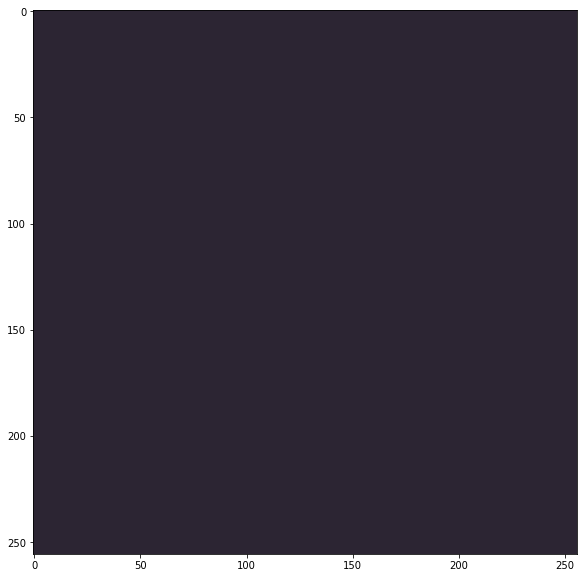

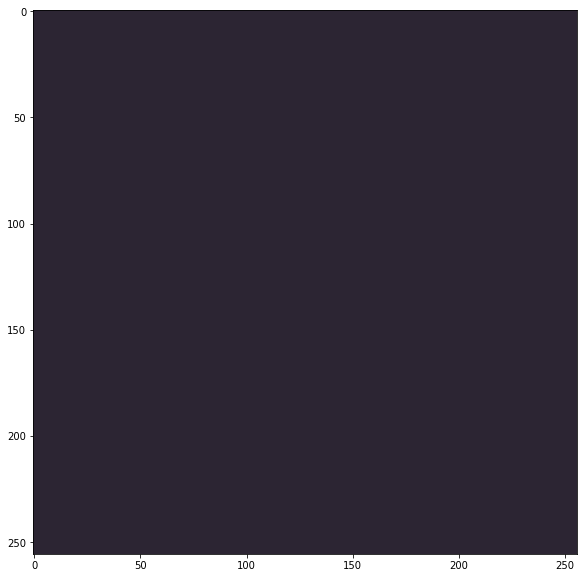

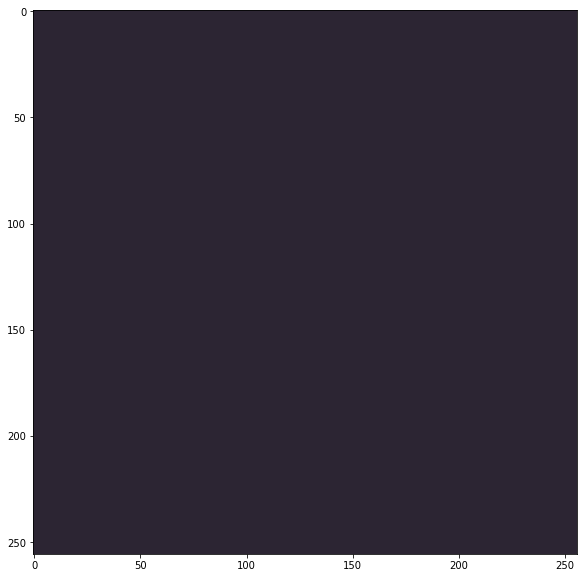

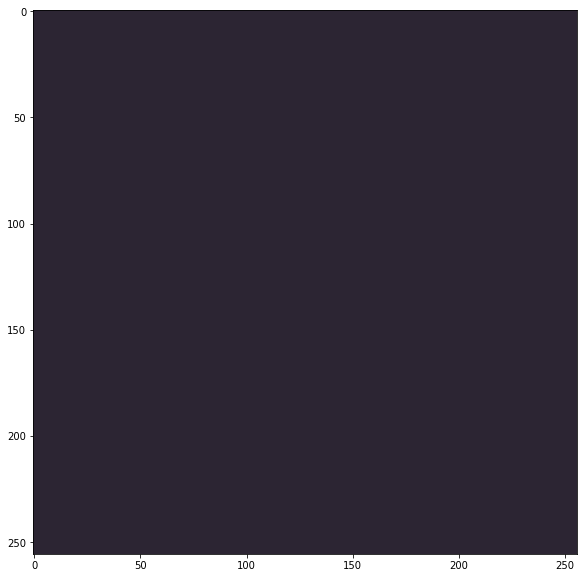

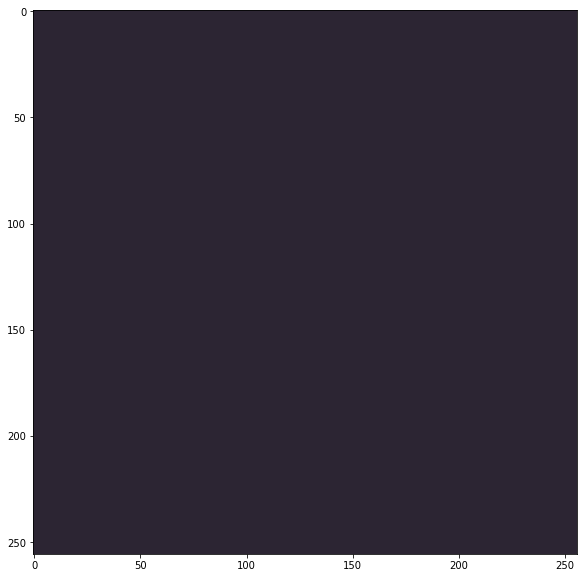

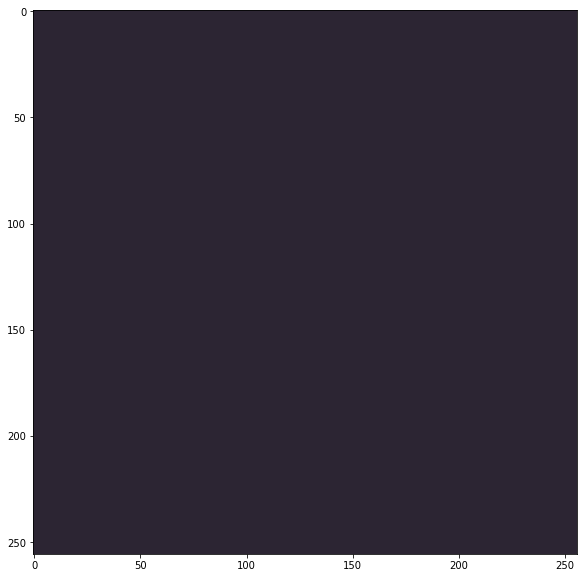

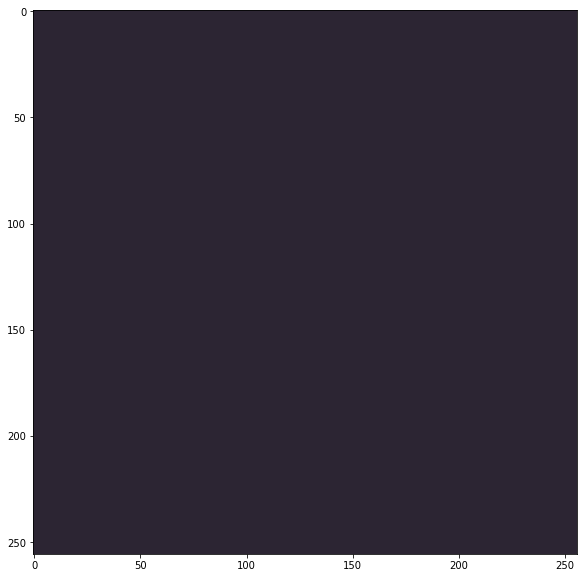

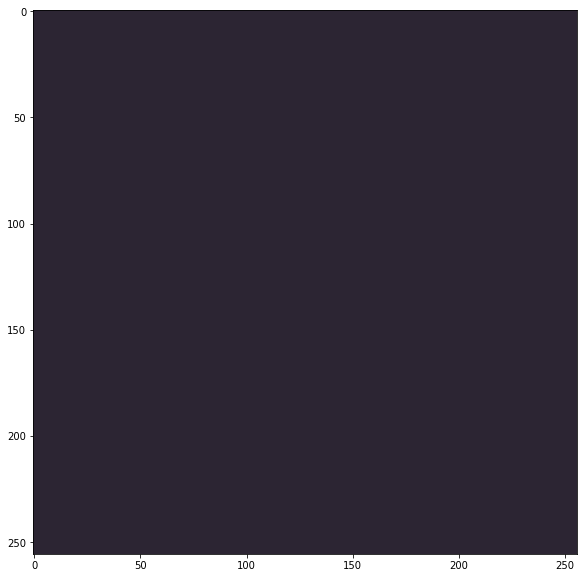

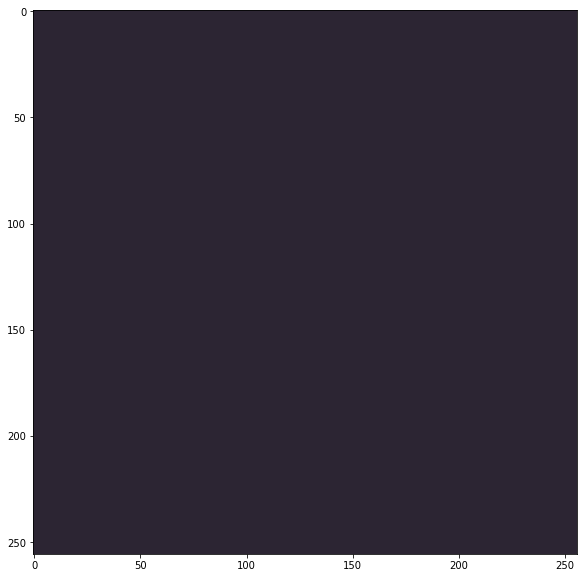

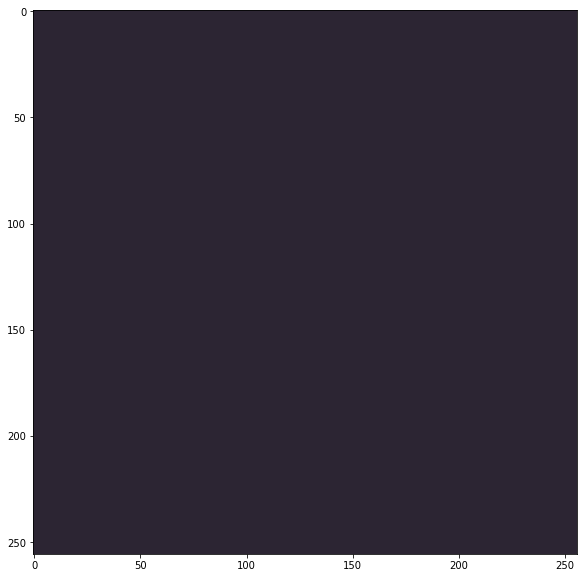

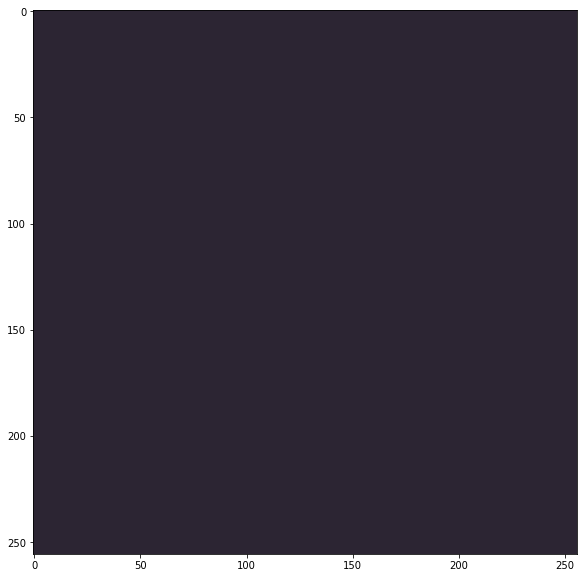

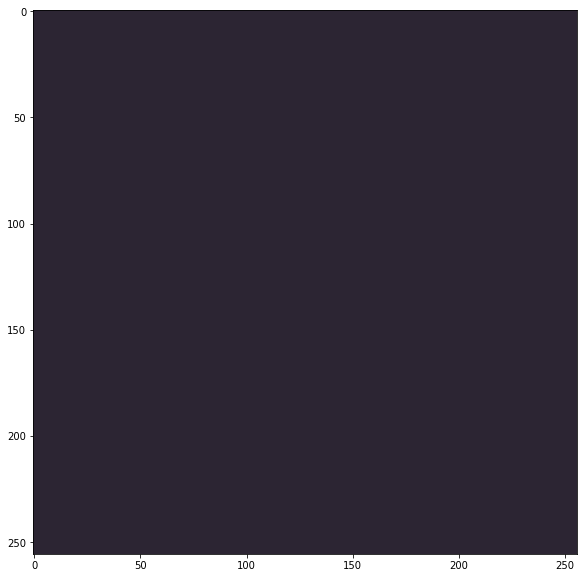

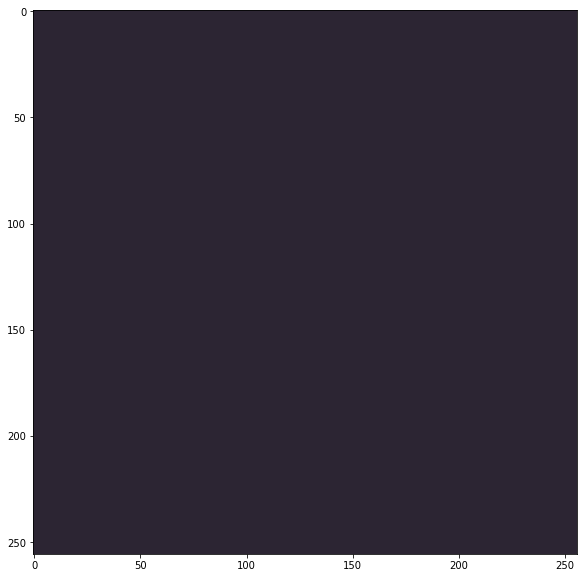

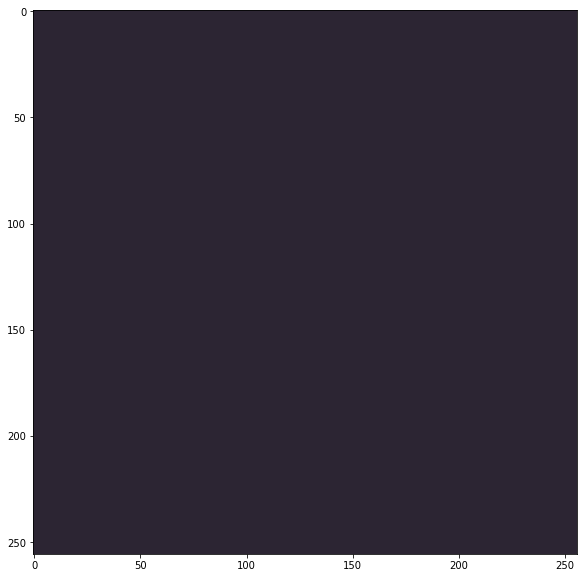

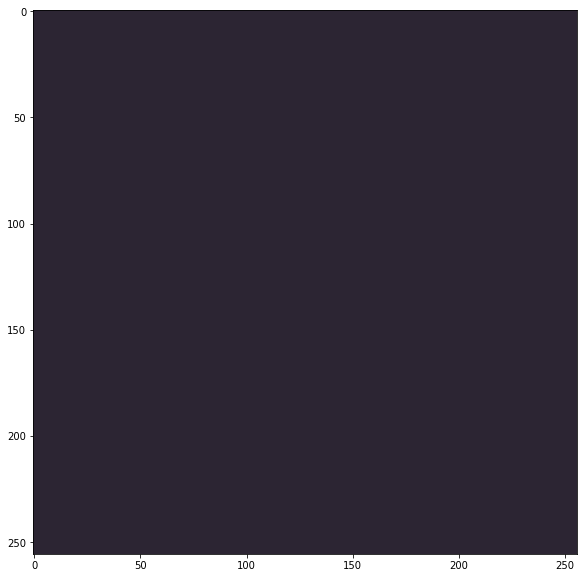

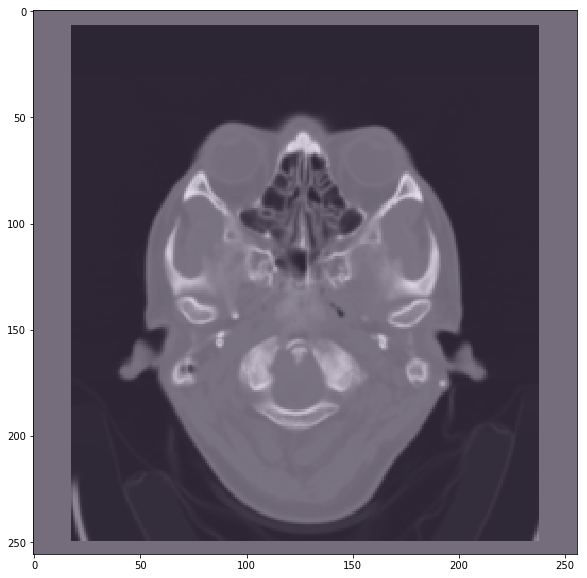

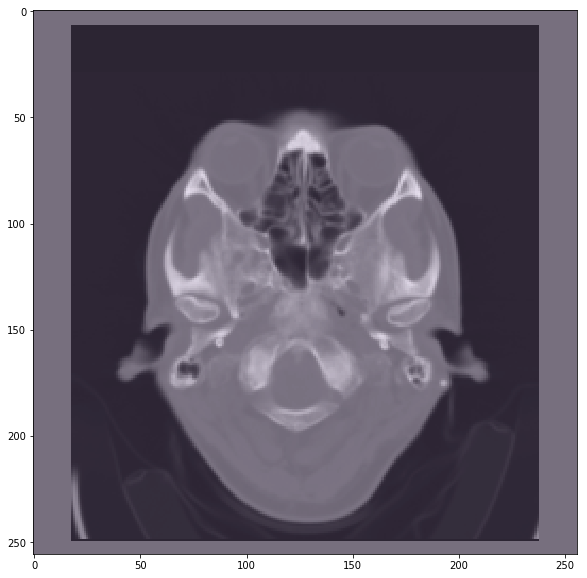

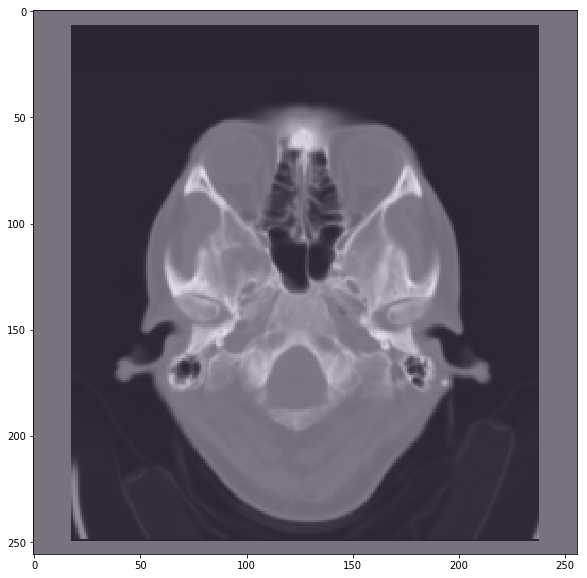

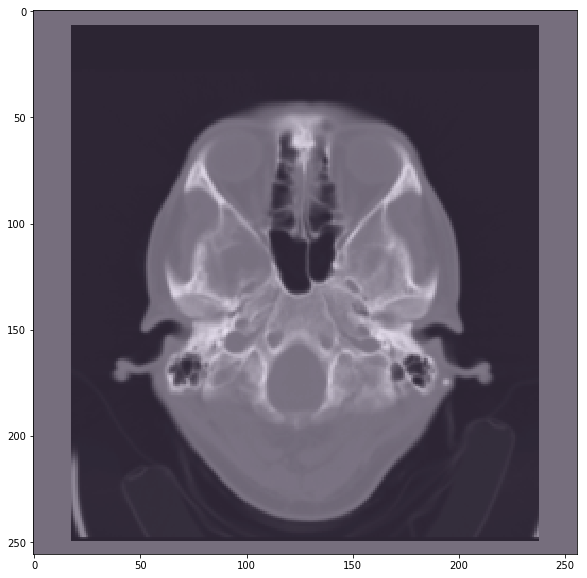

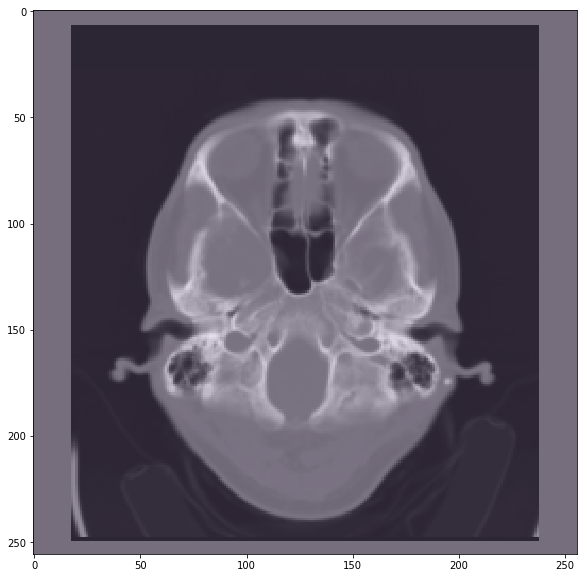

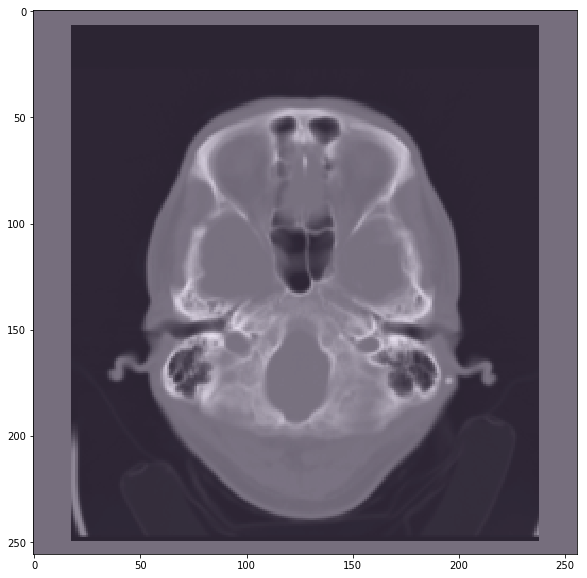

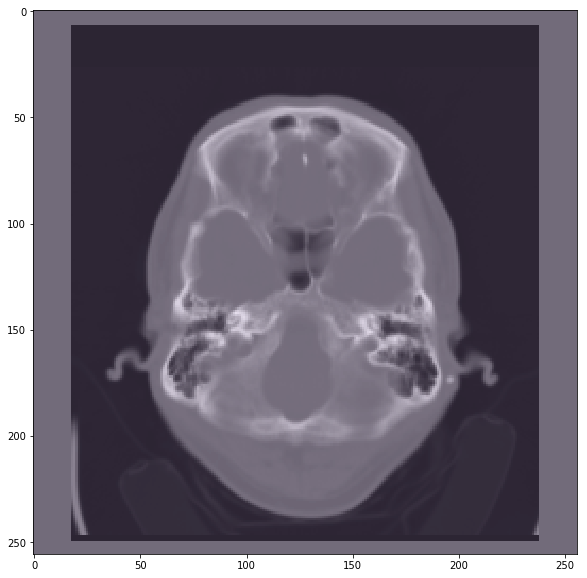

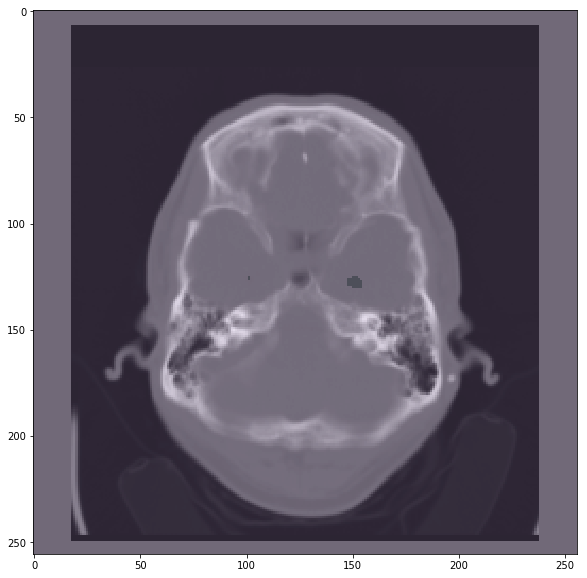

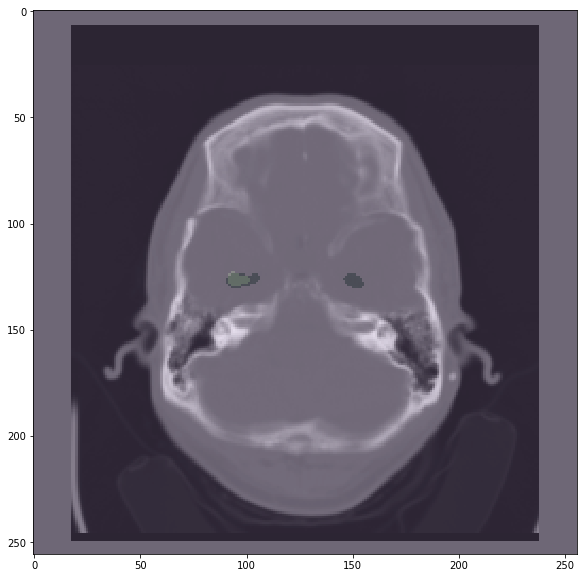

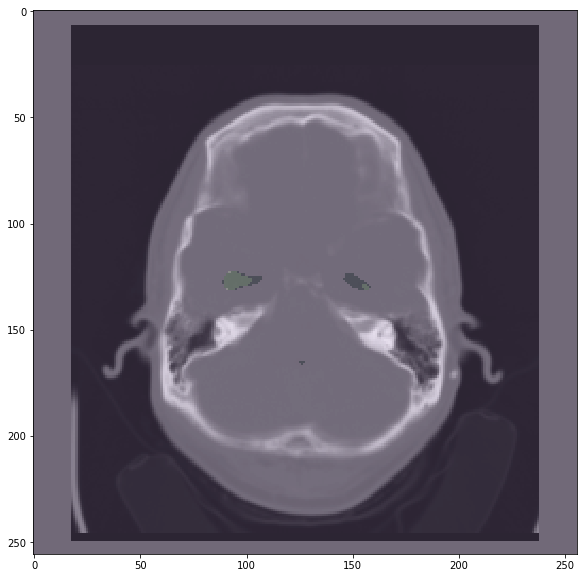

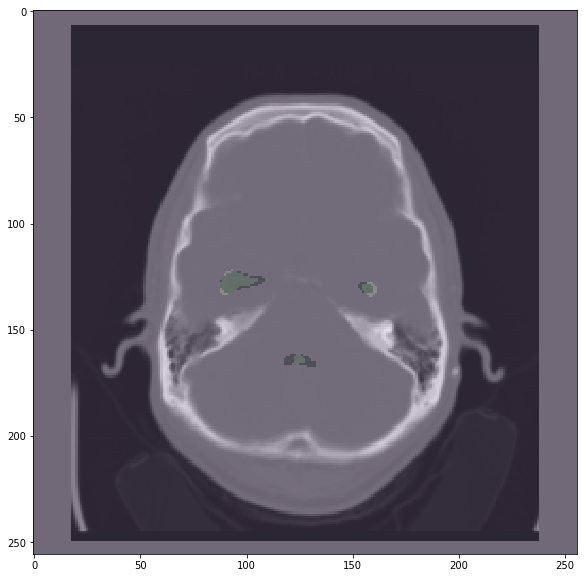

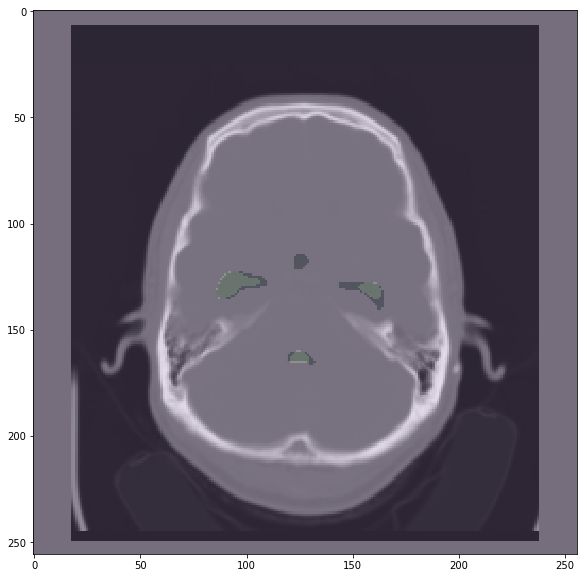

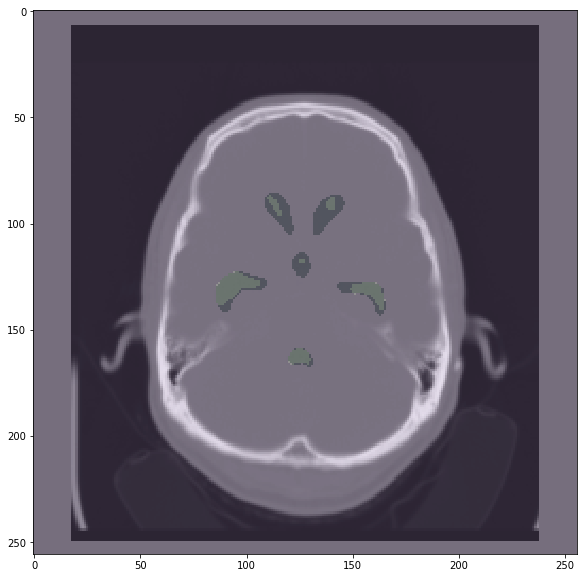

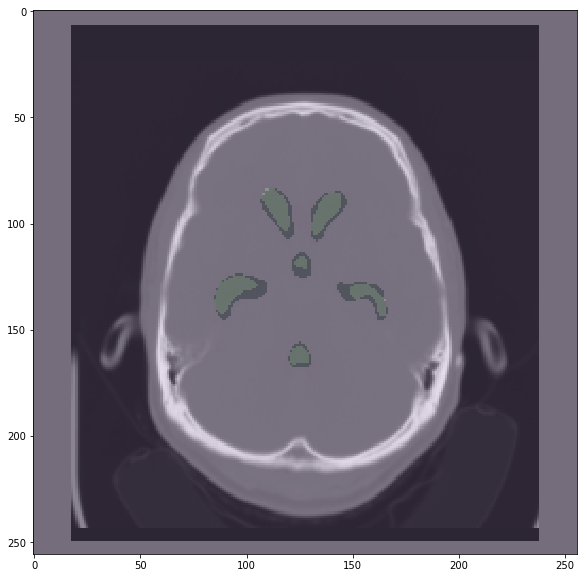

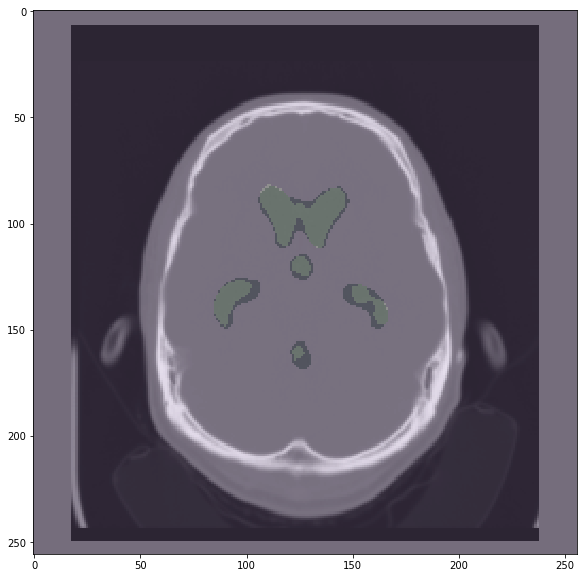

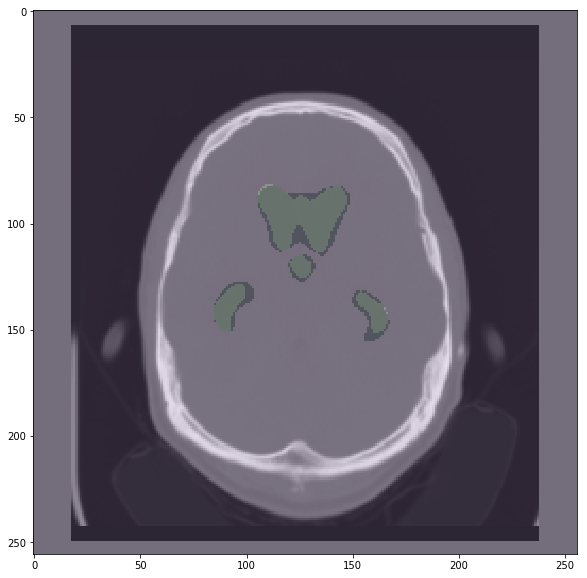

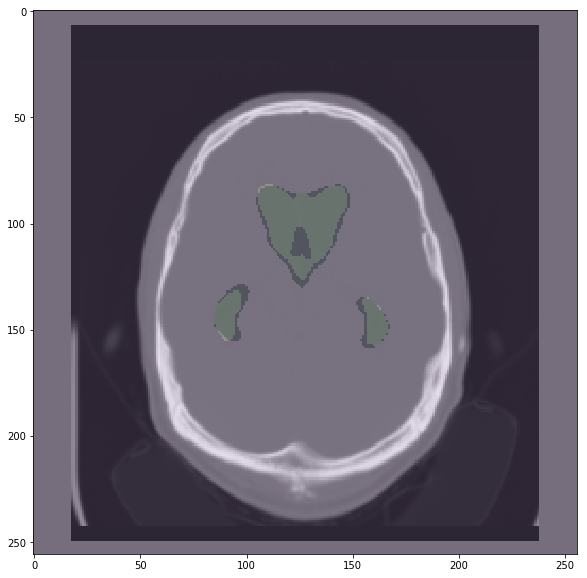

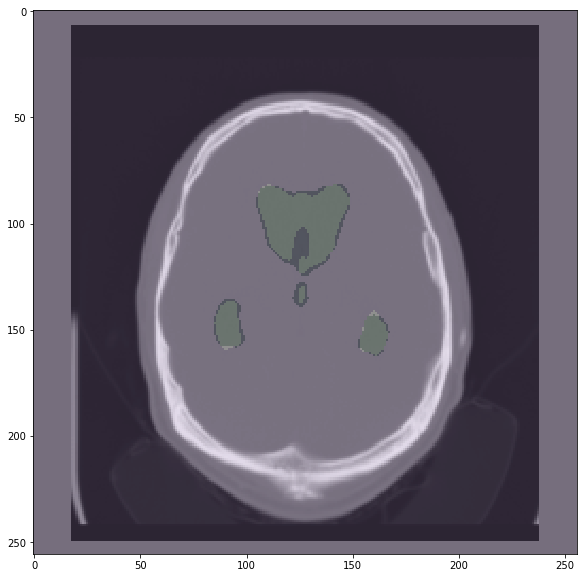

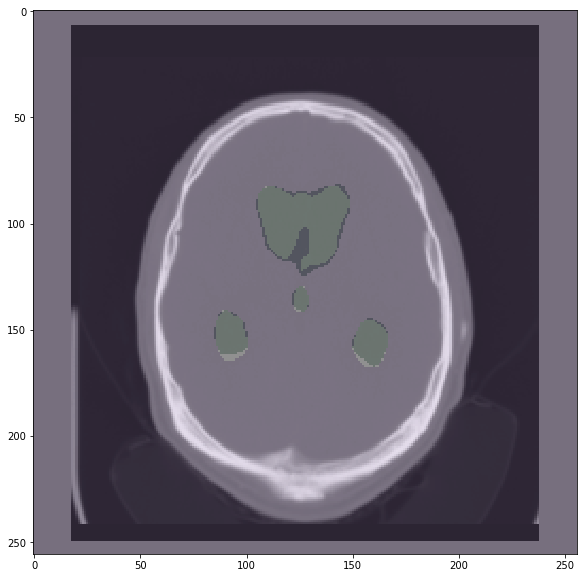

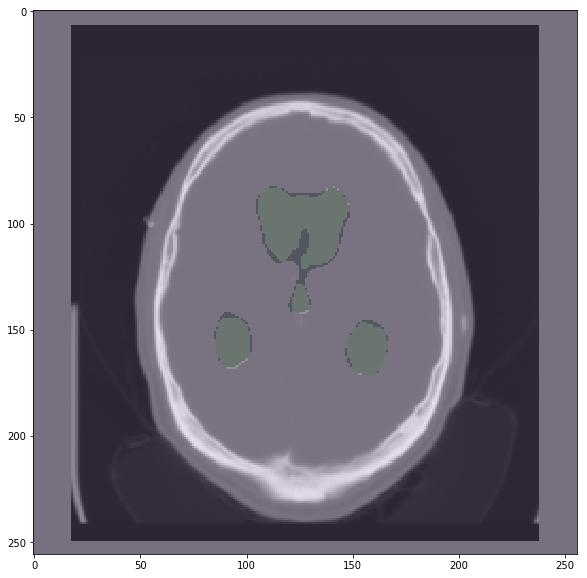

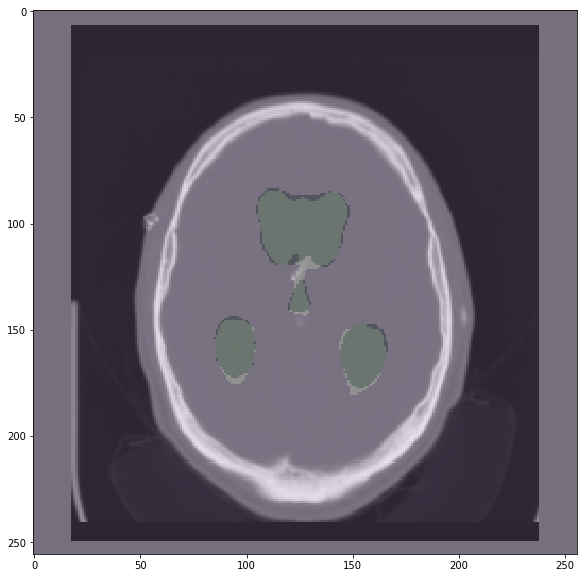

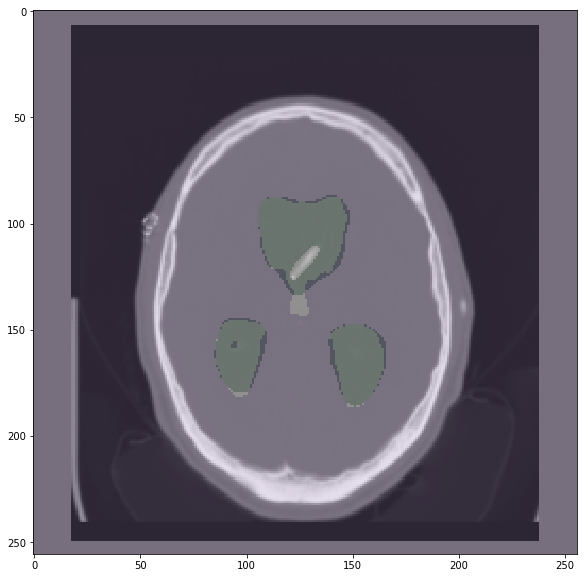

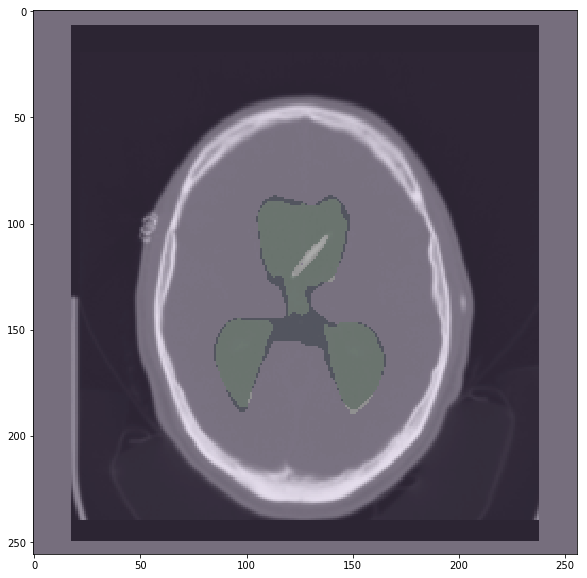

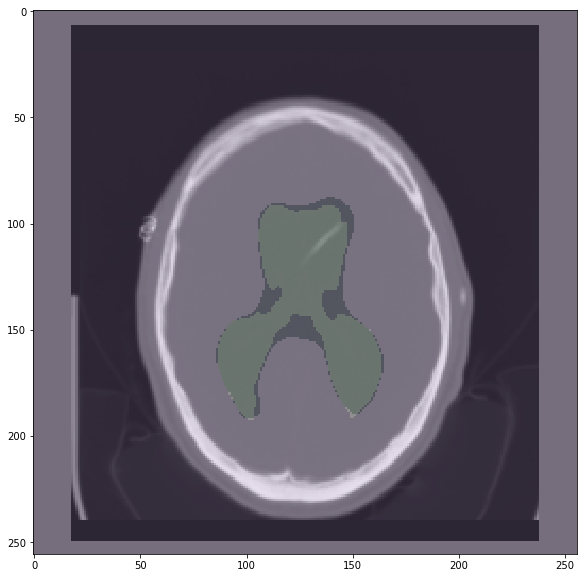

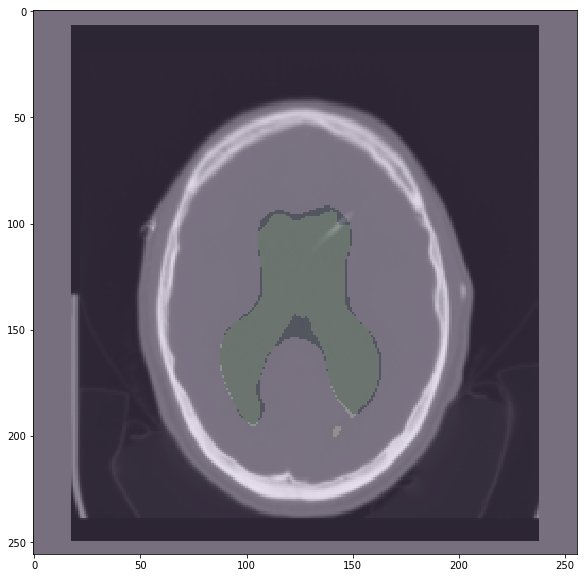

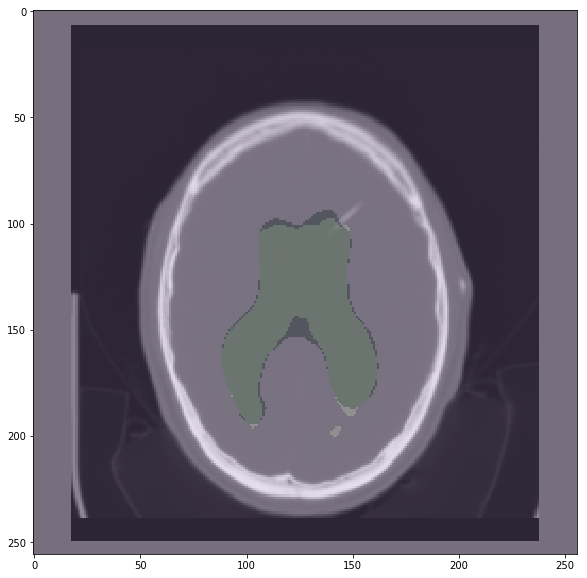

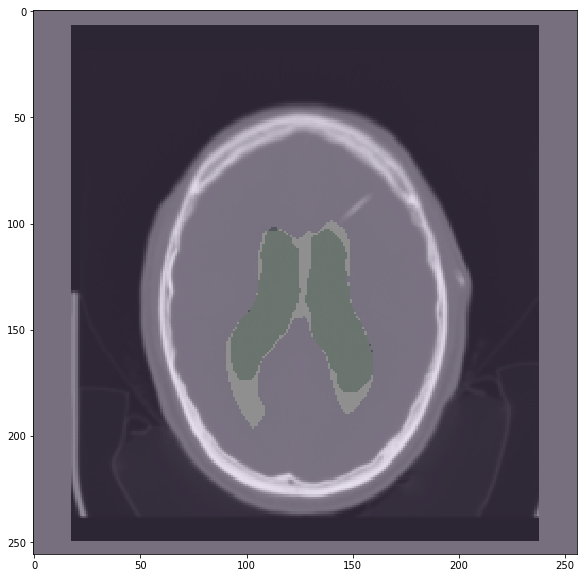

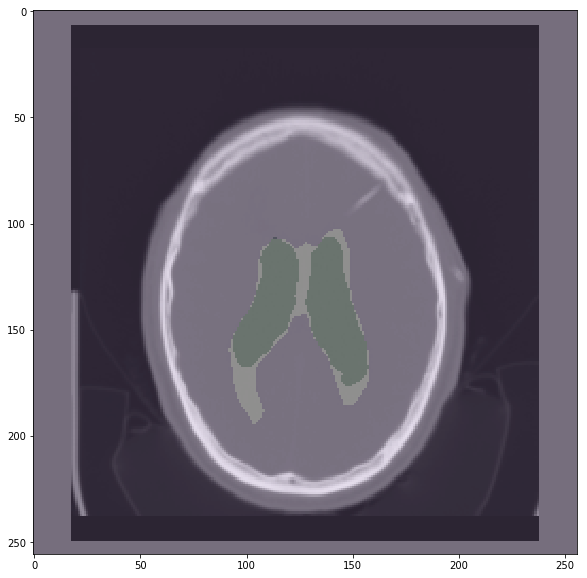

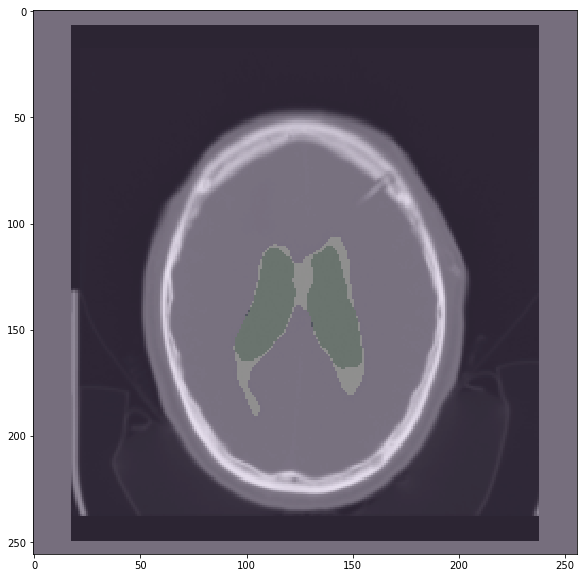

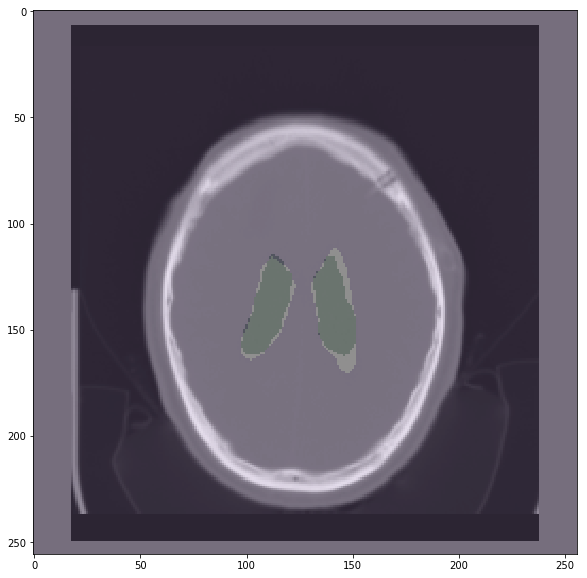

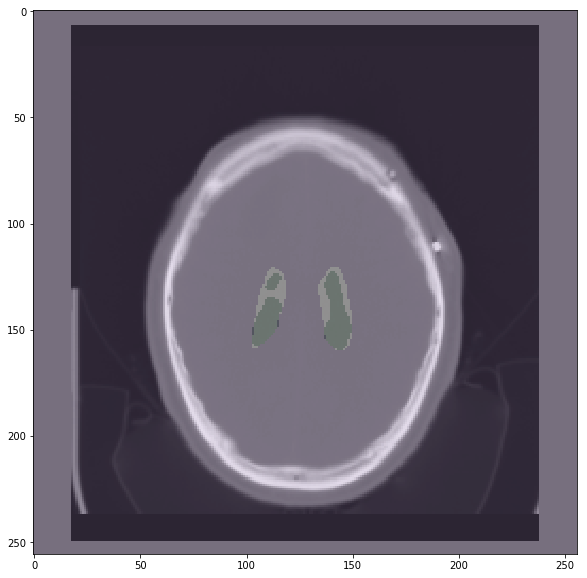

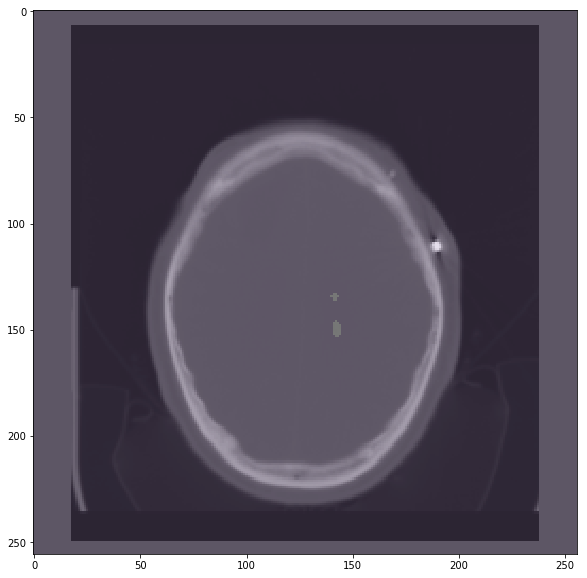

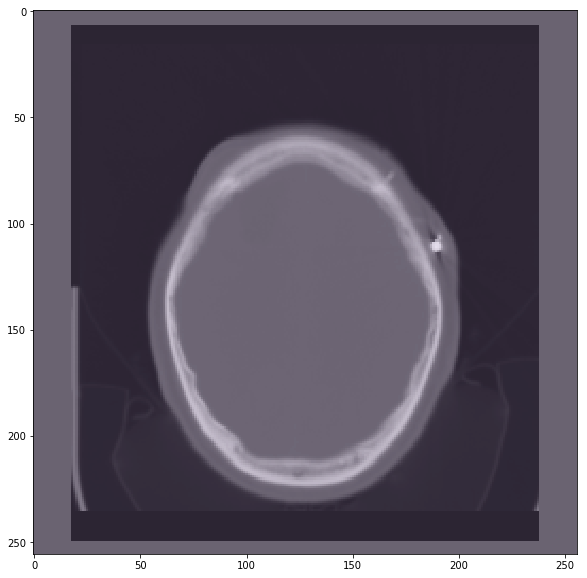

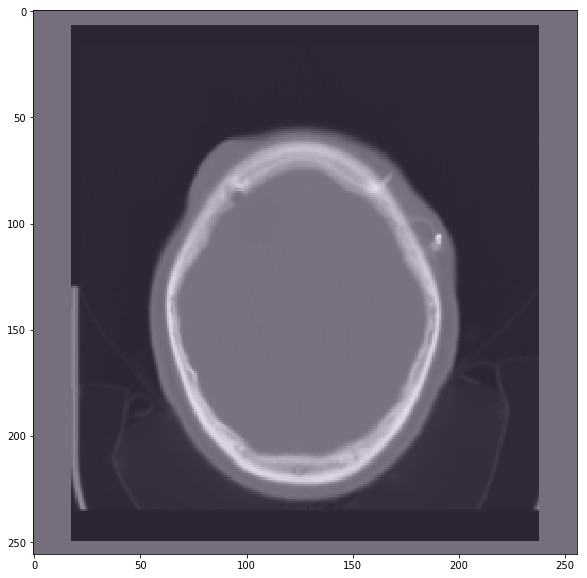

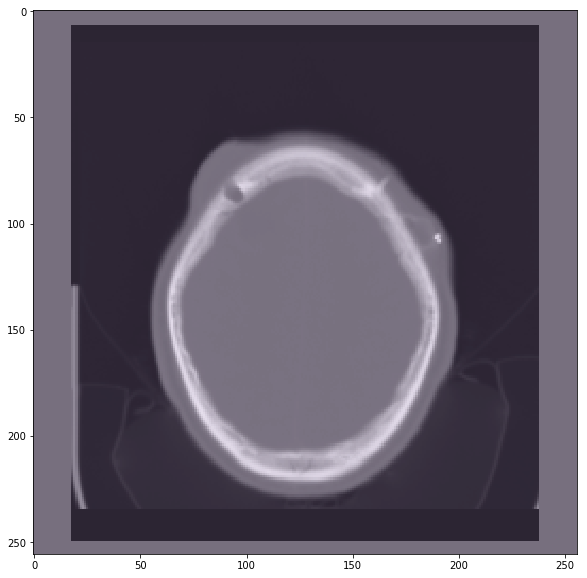

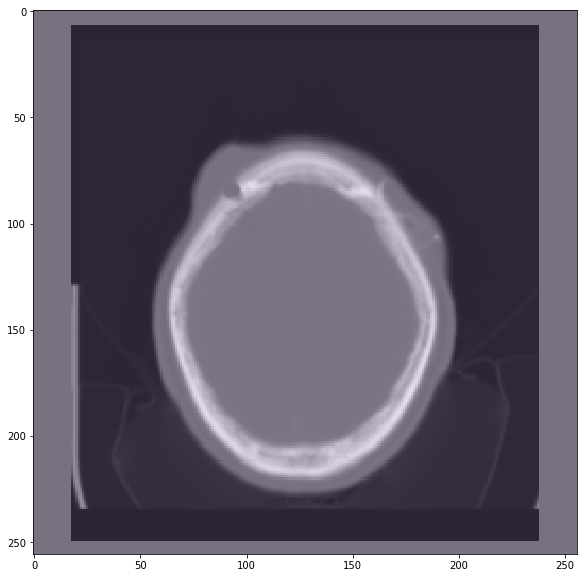

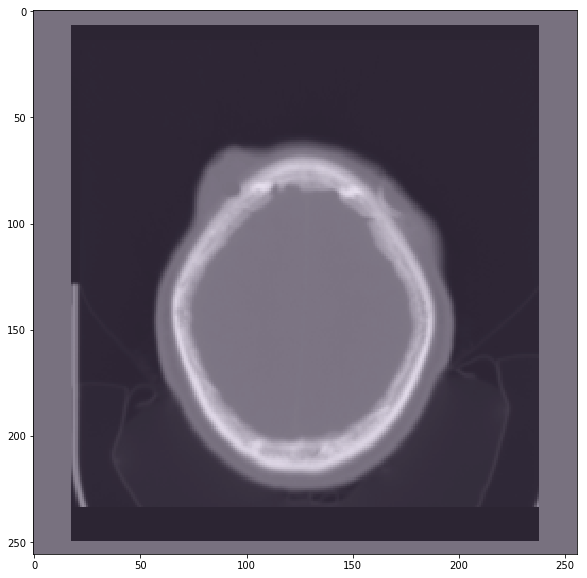

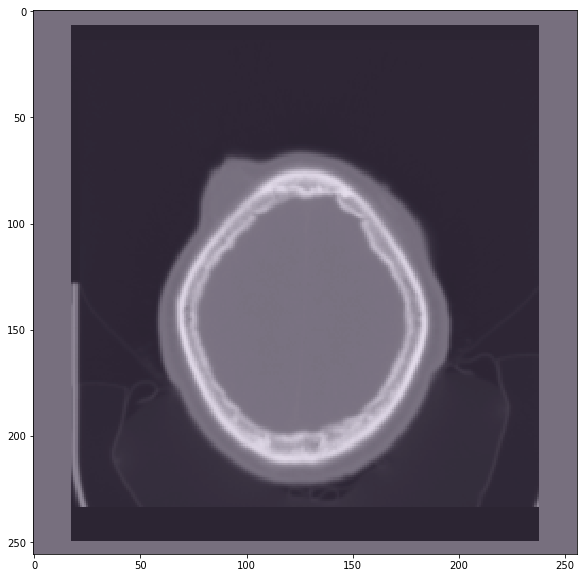

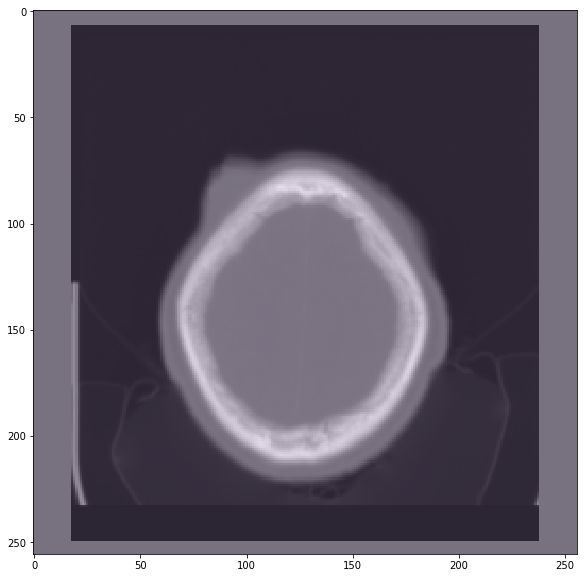

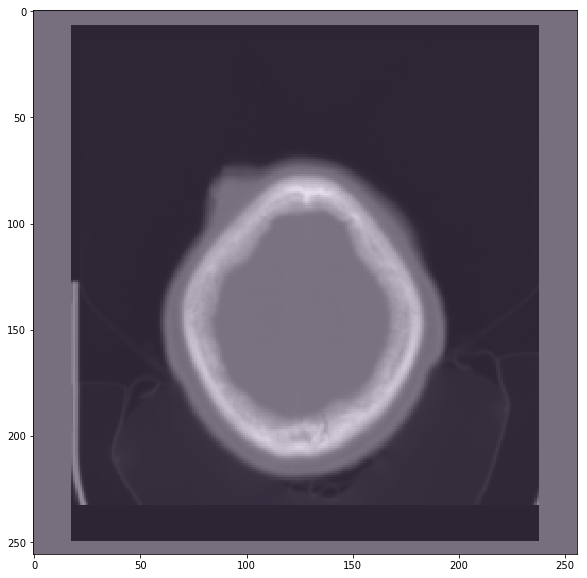

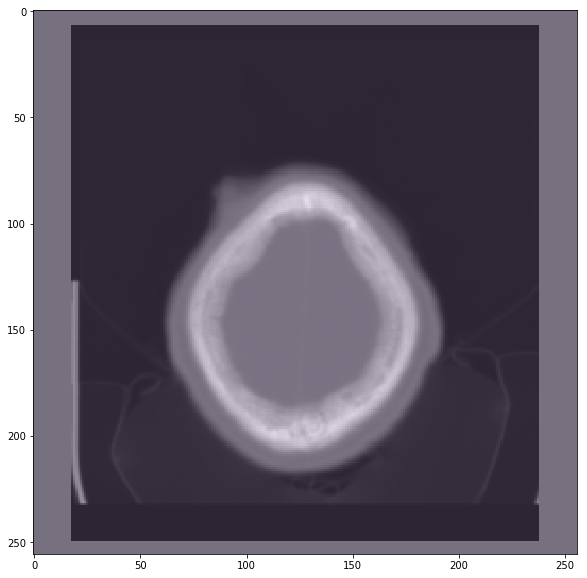

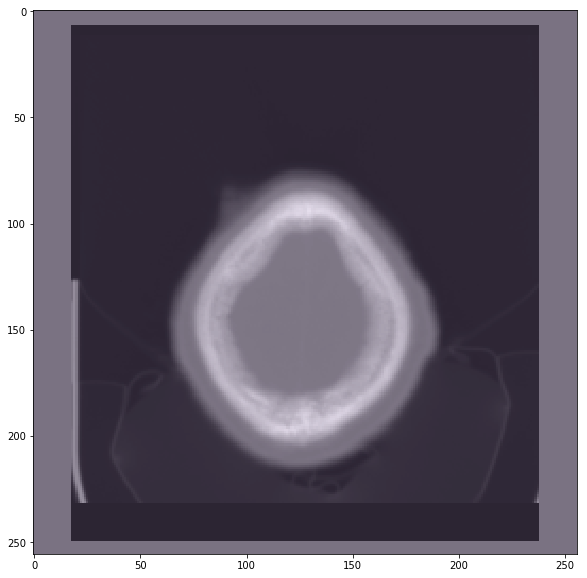

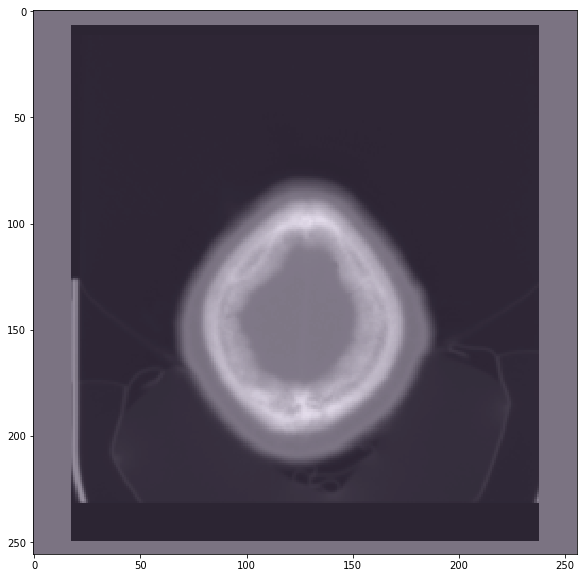

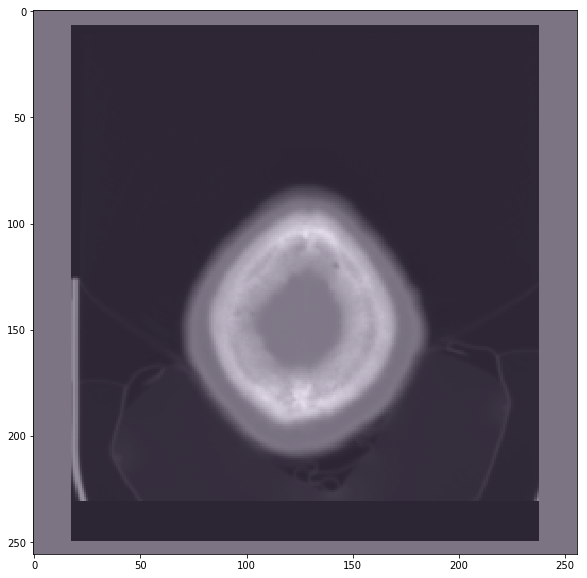

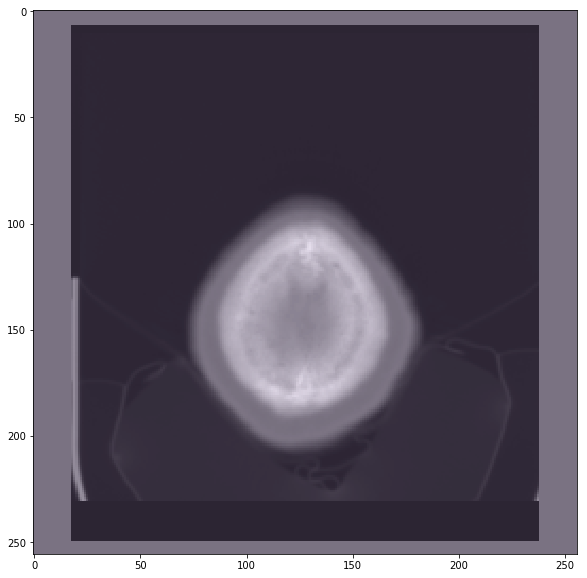

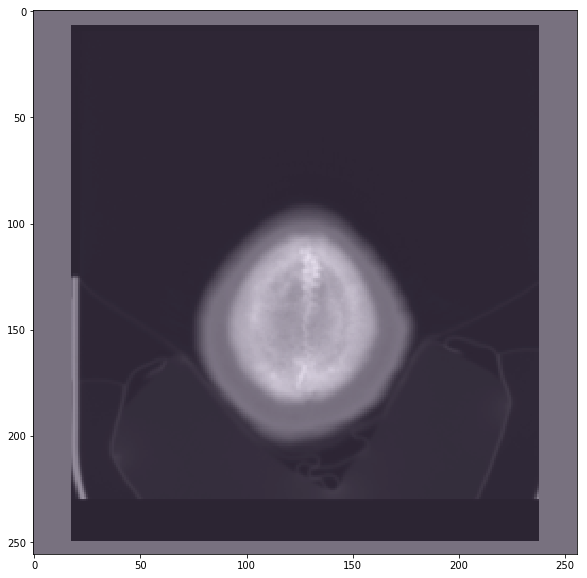

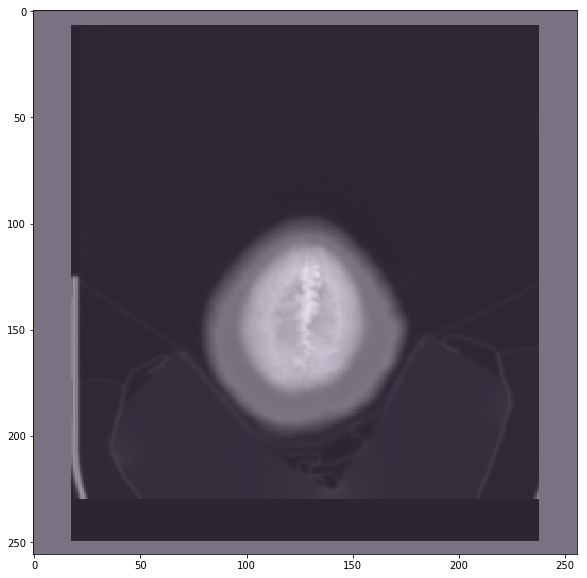

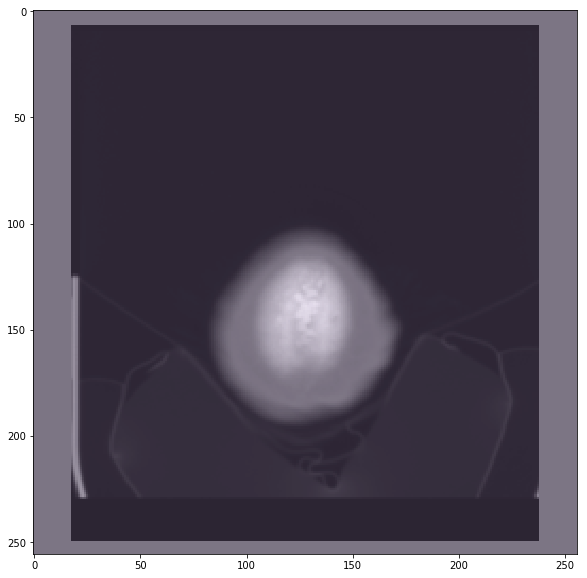

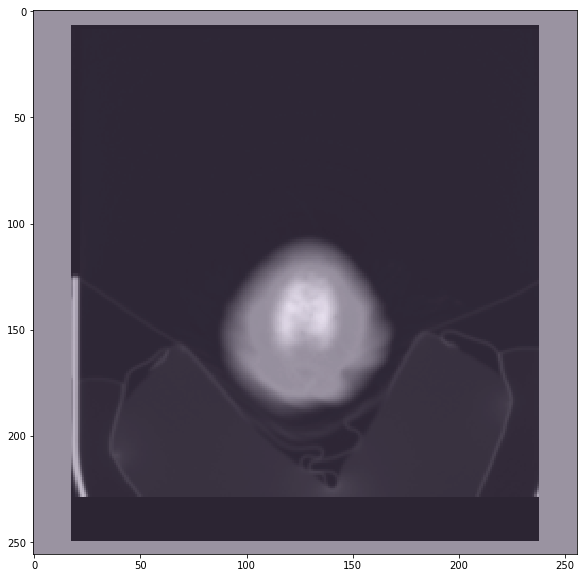

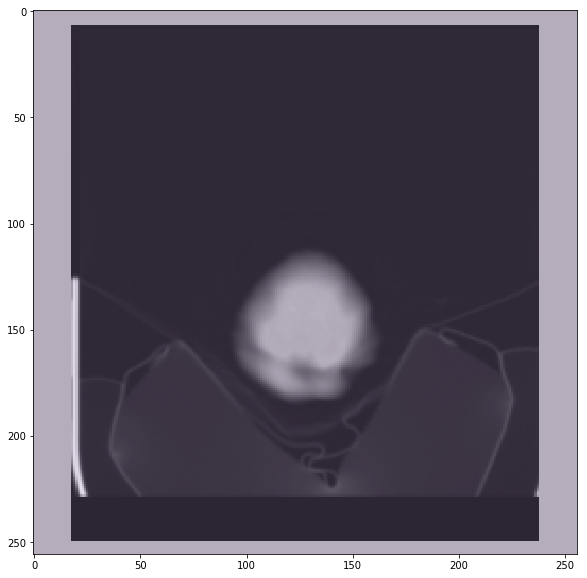

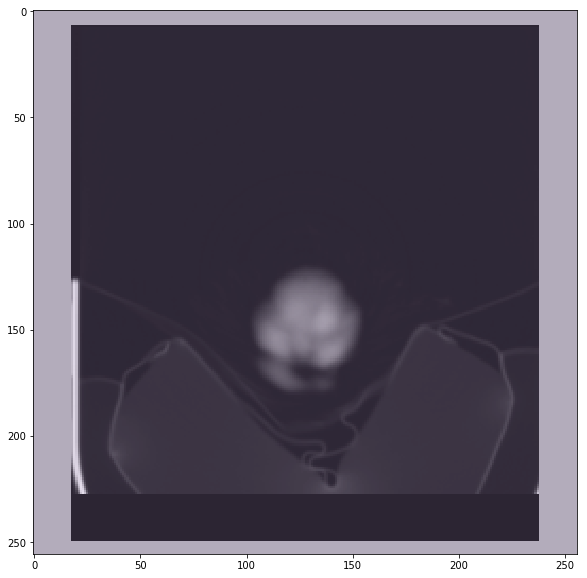

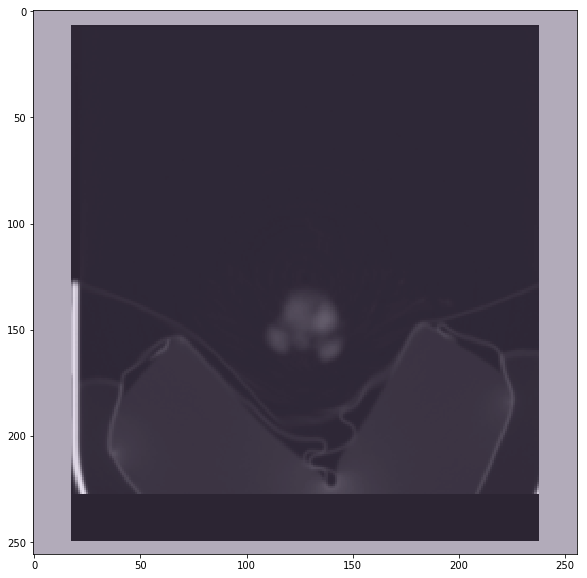

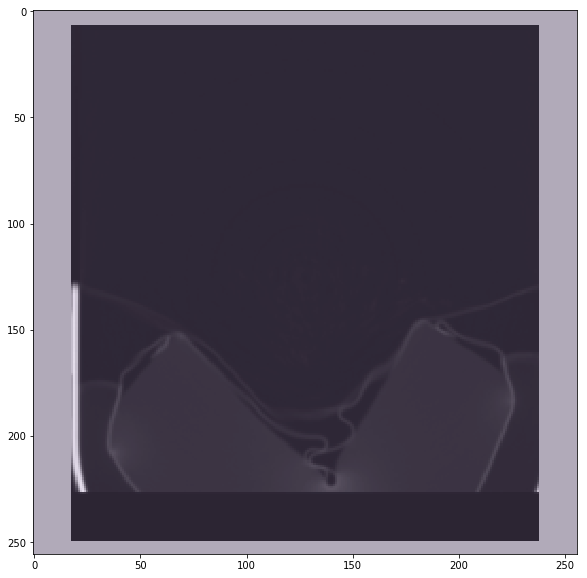

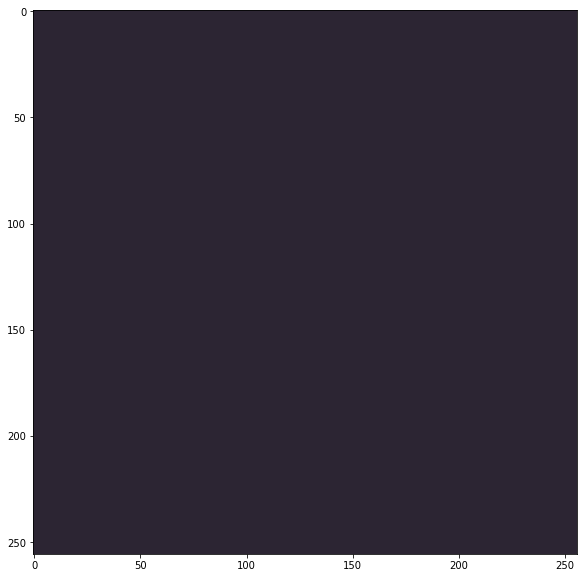

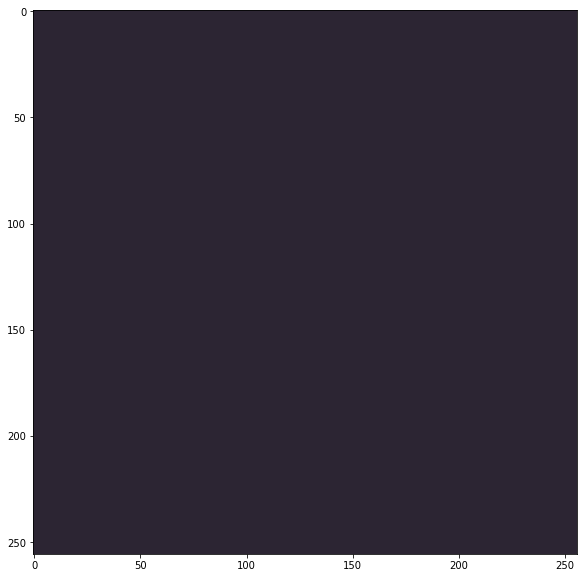

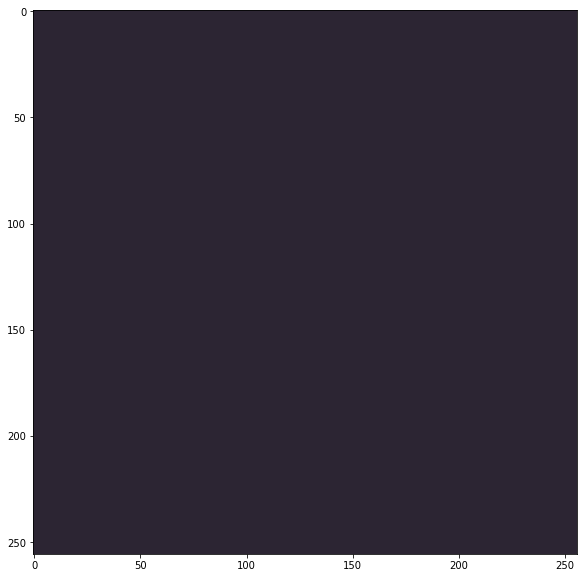

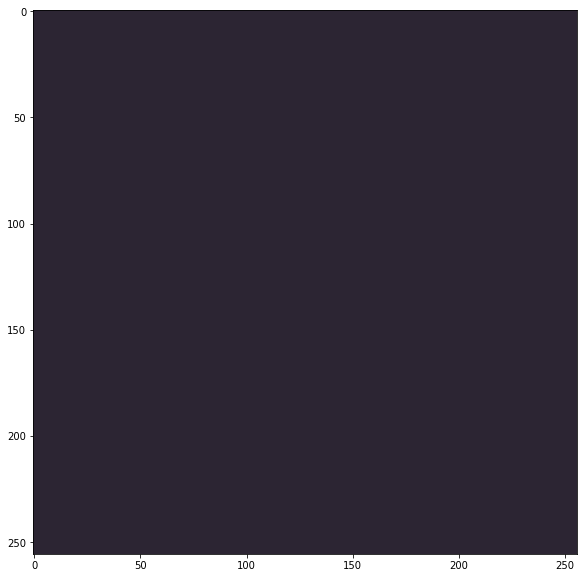

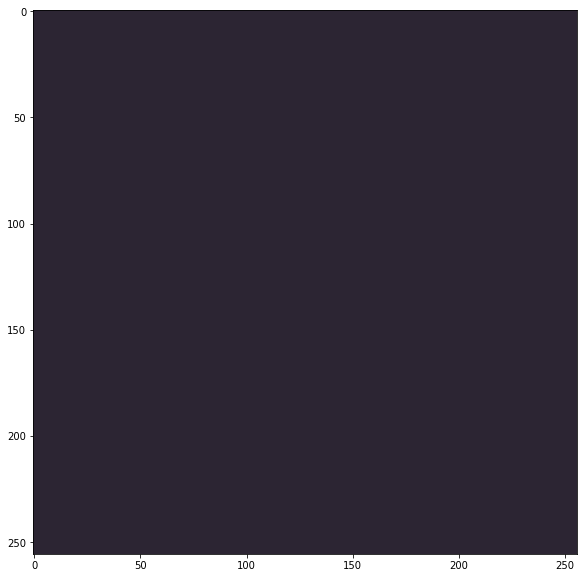

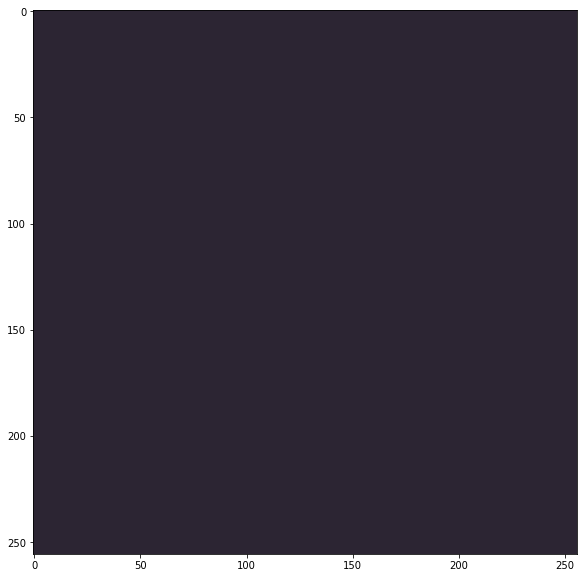

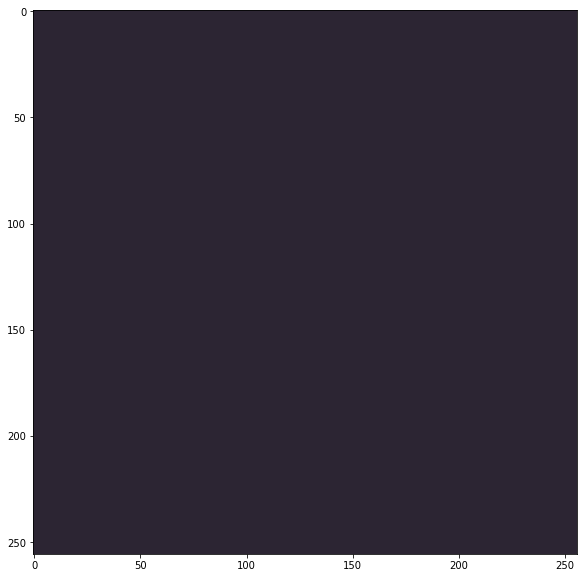

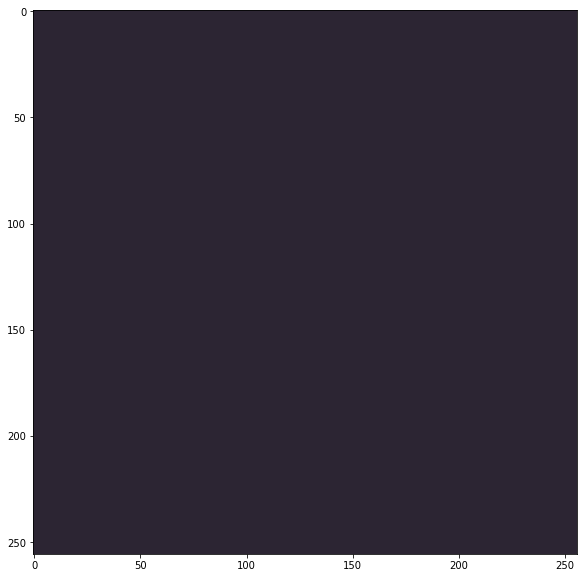

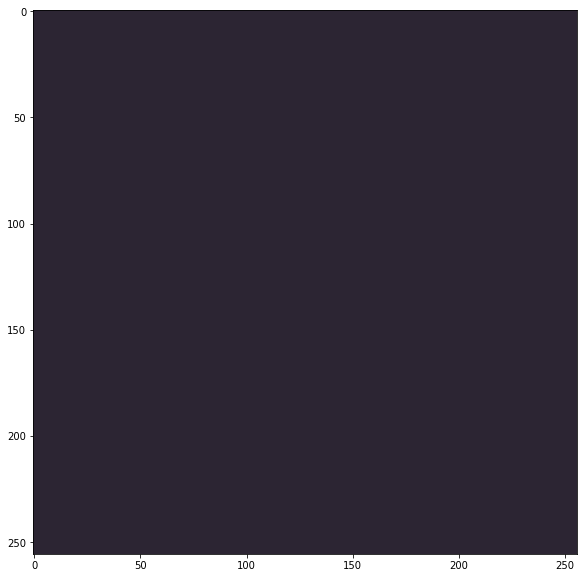

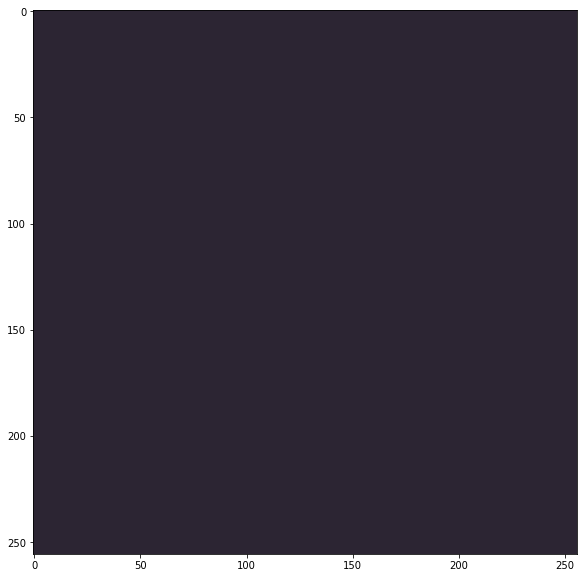

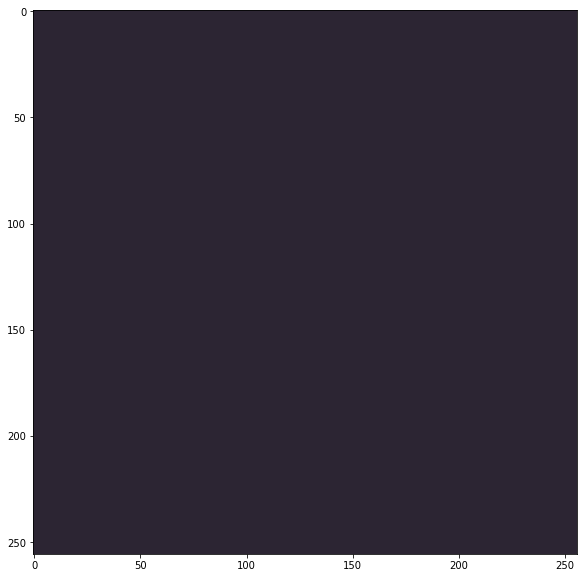

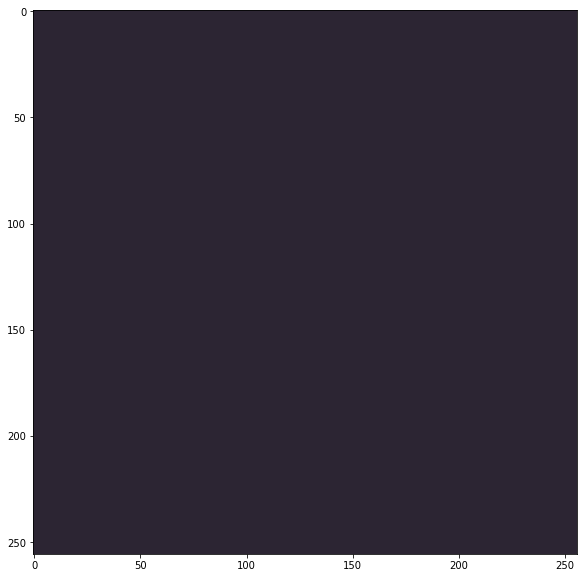

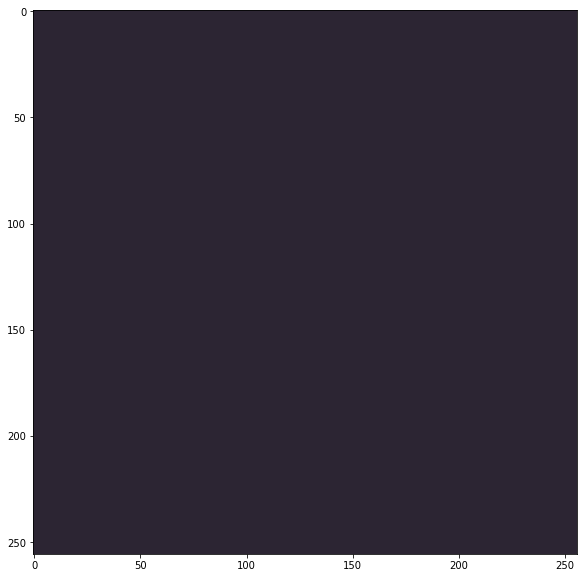

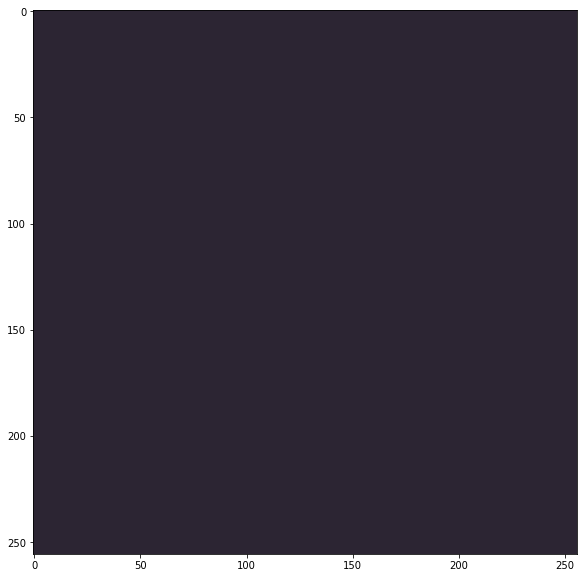

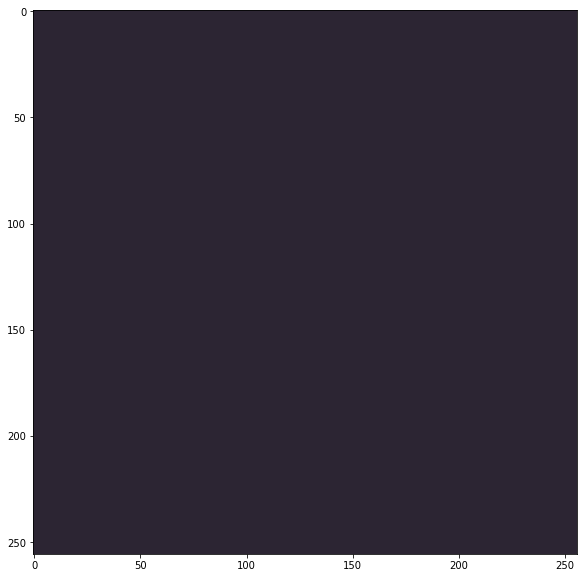

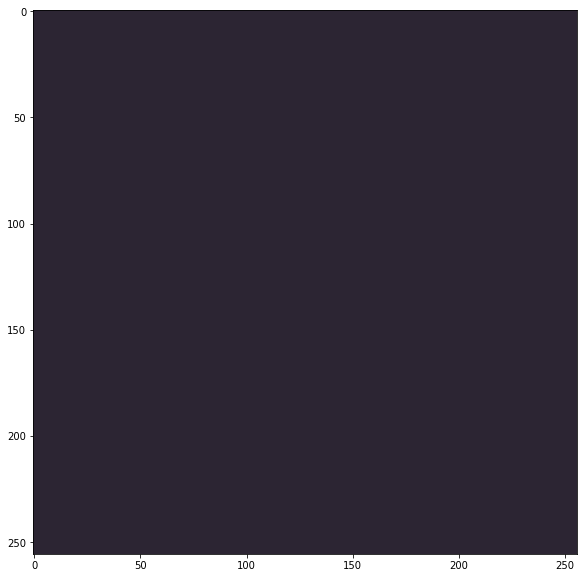

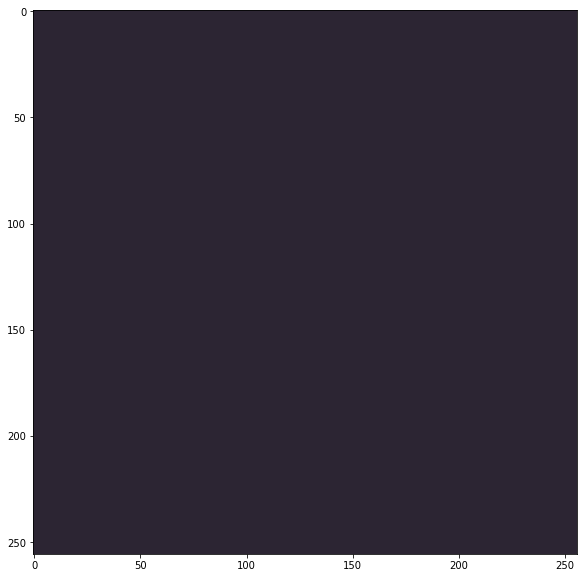

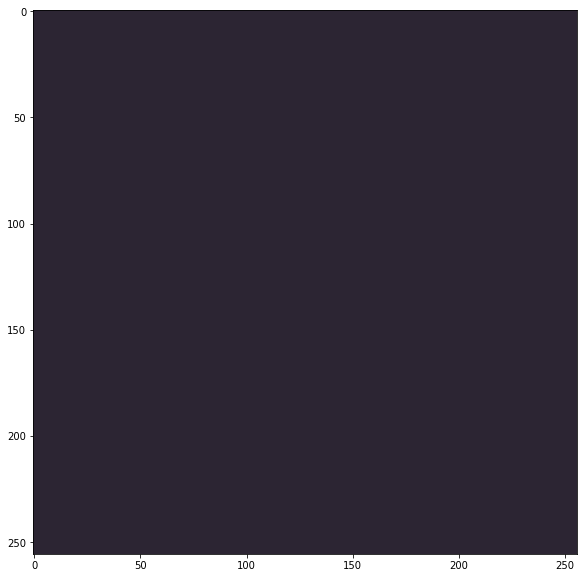

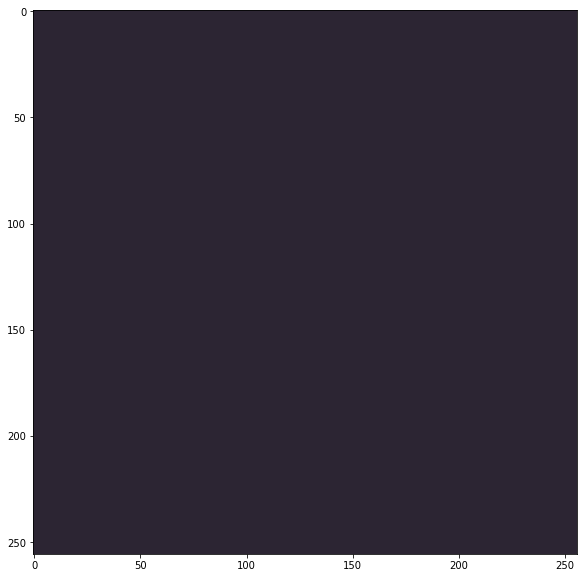

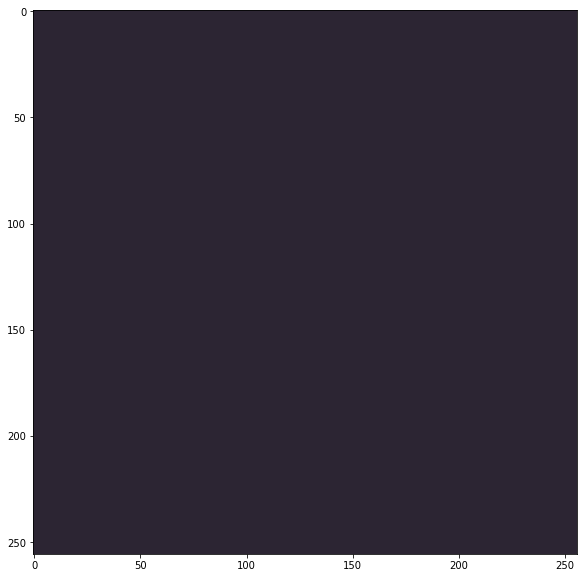

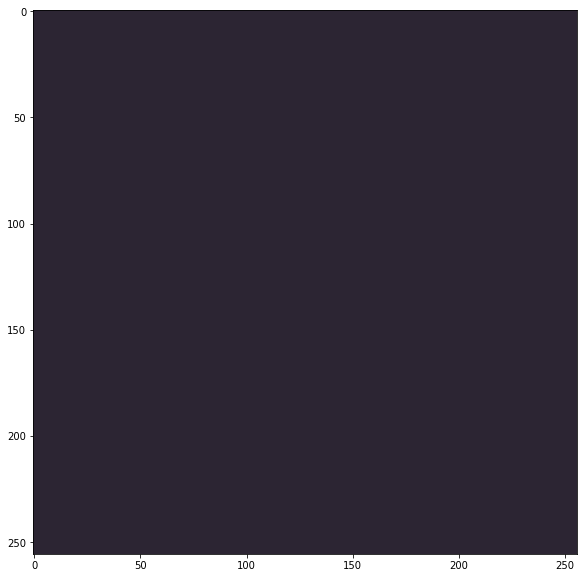

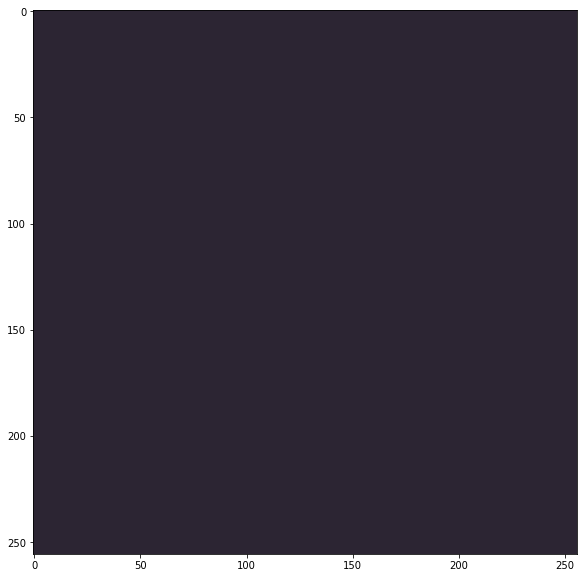

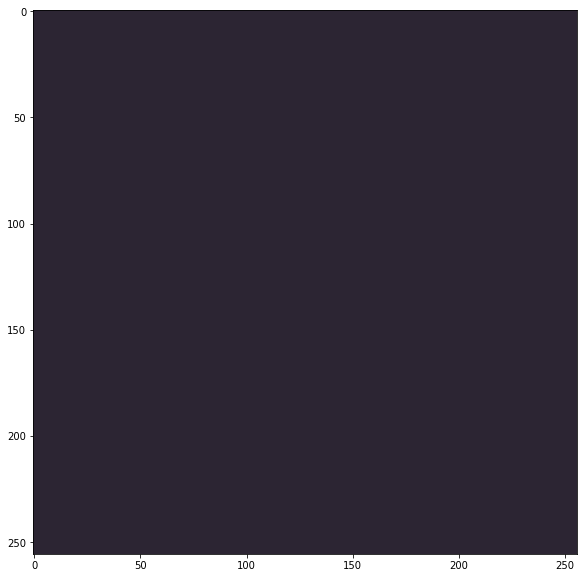

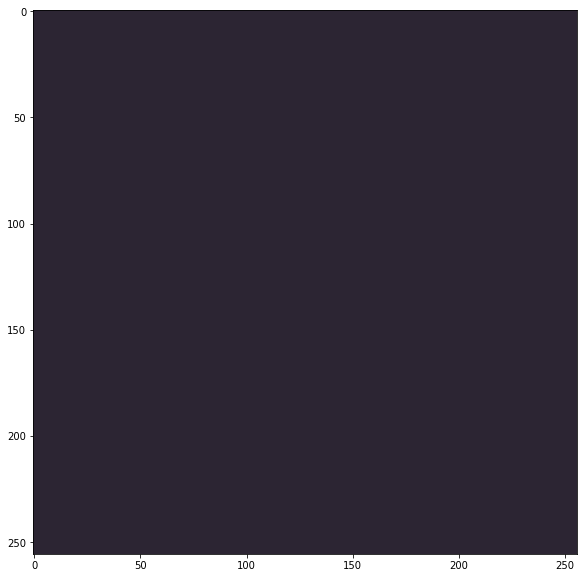

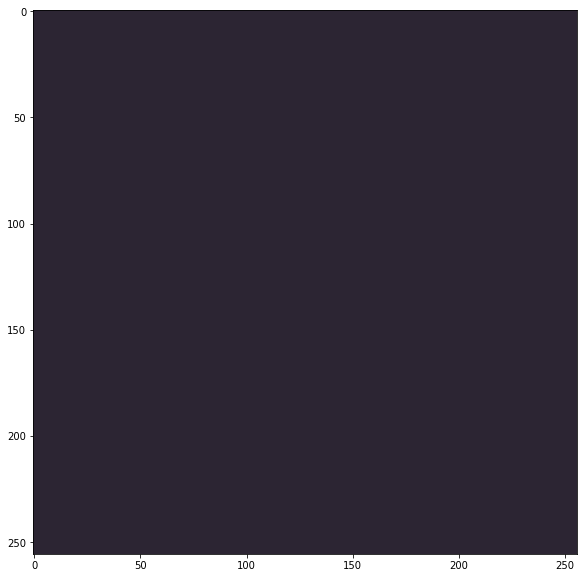

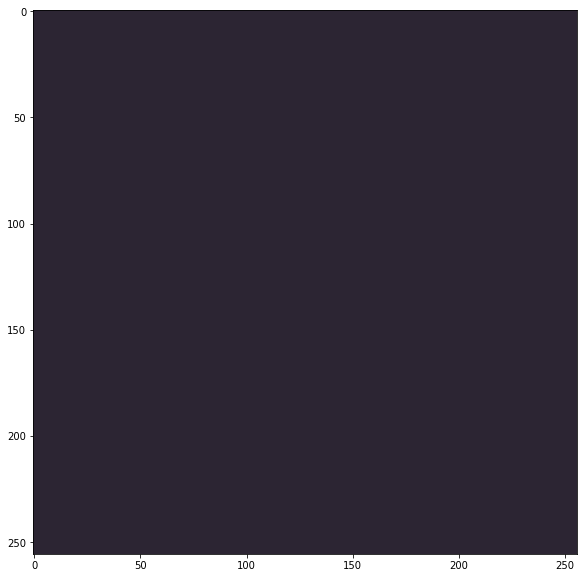

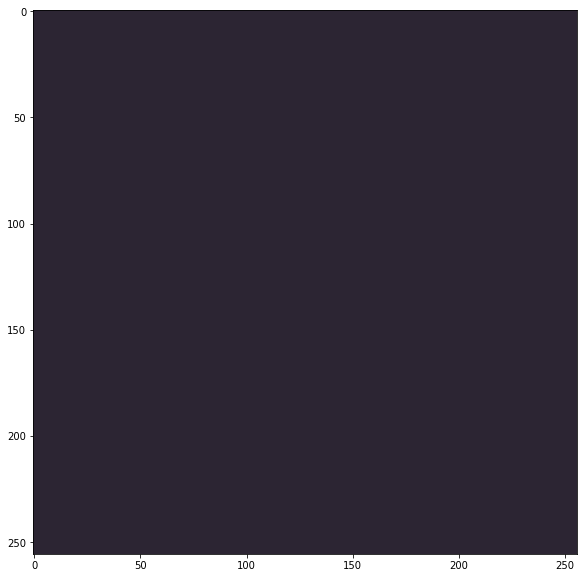

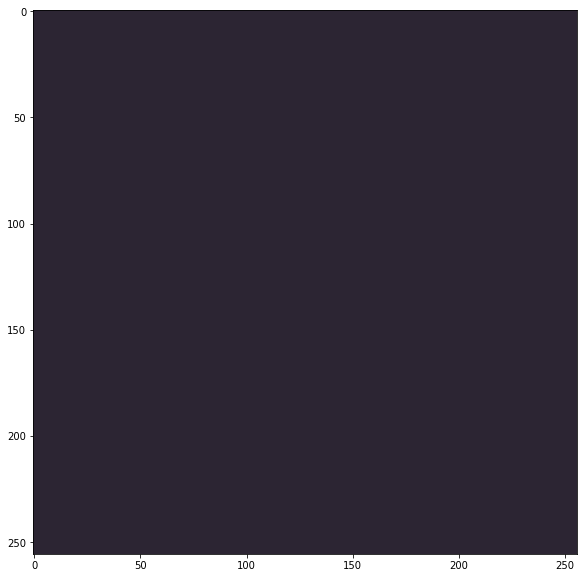

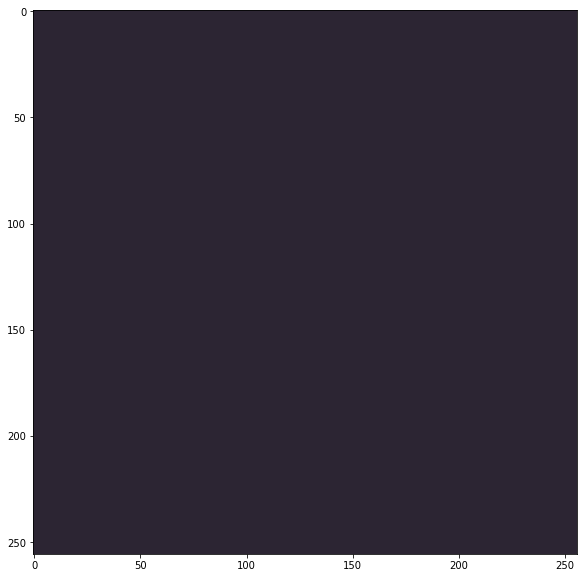

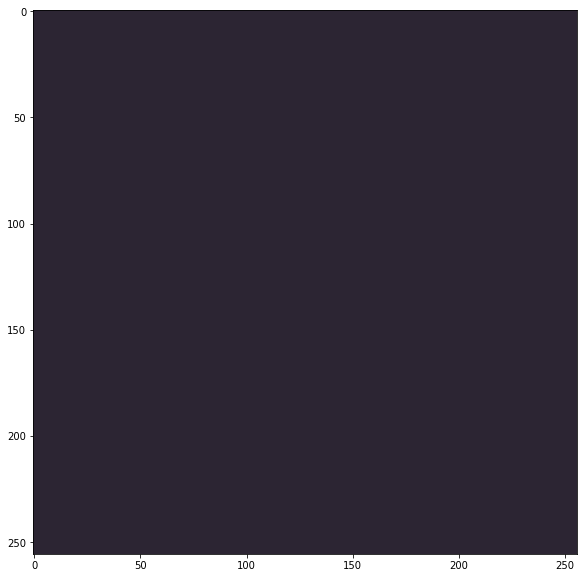

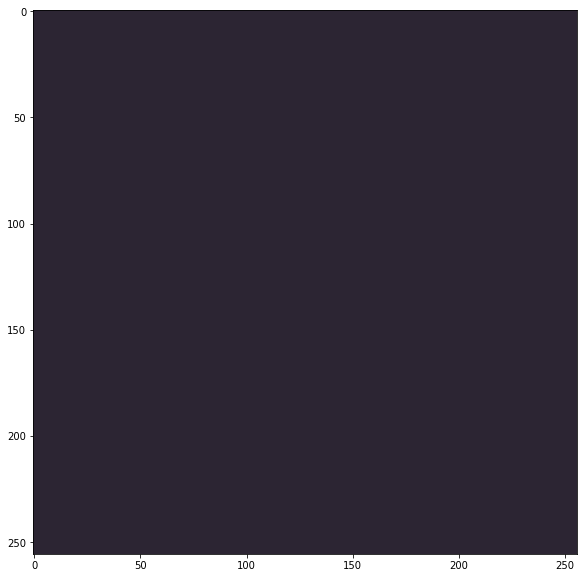

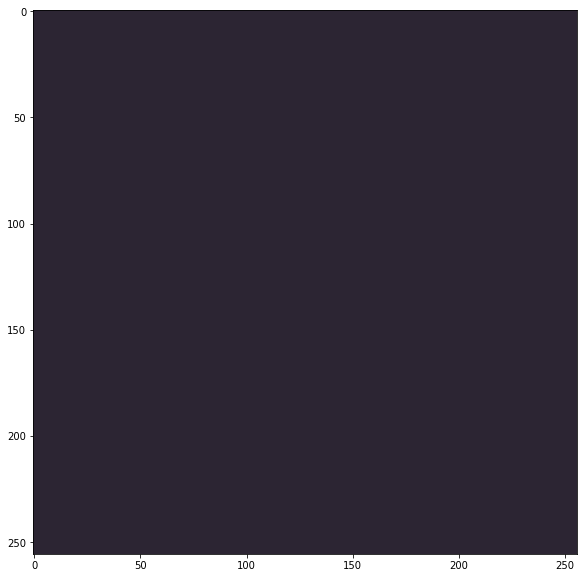

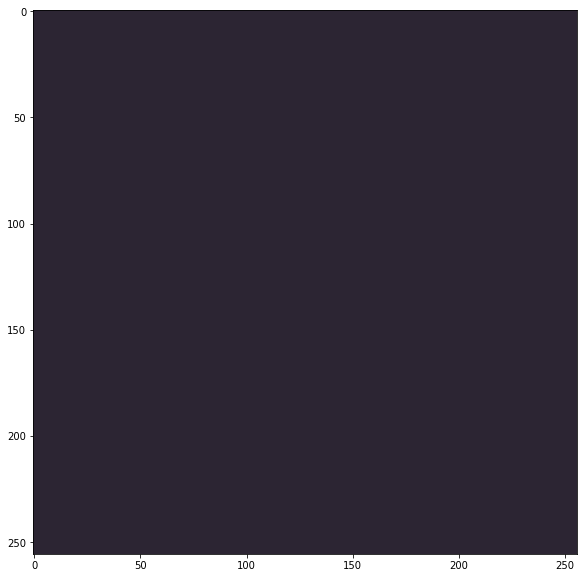

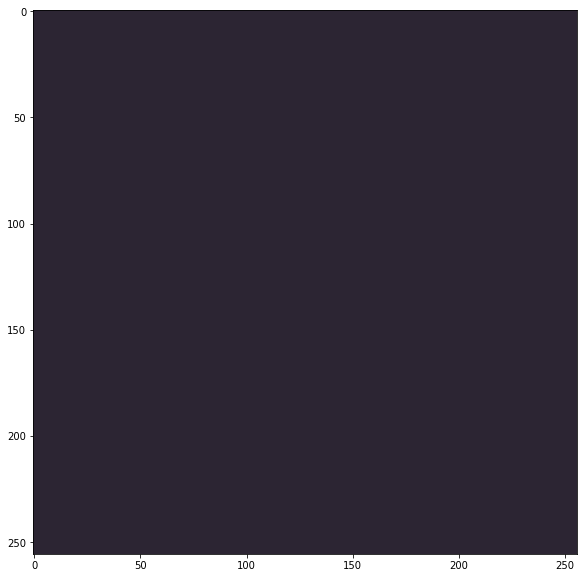

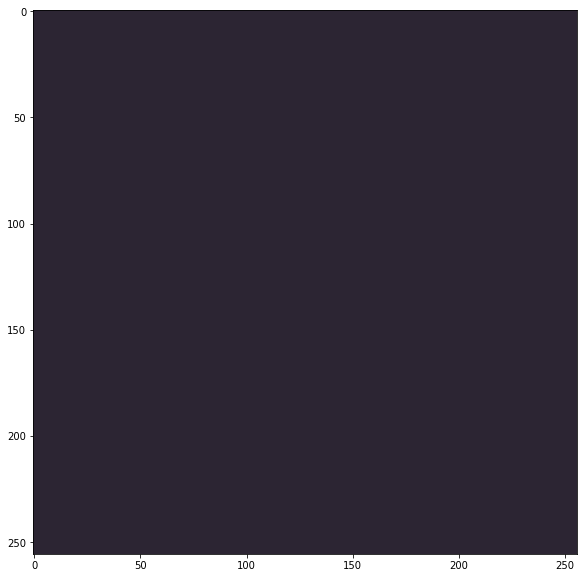

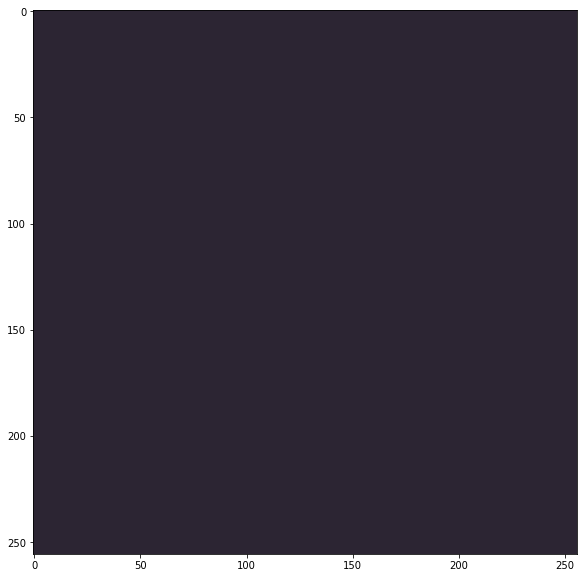

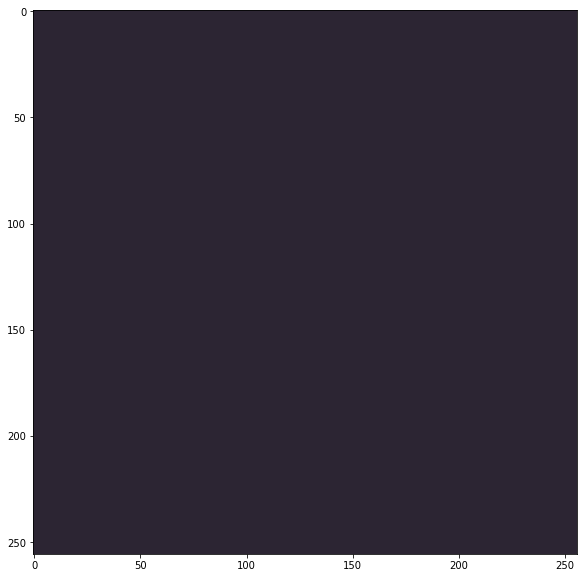

In [15]:
# light green indicates only the predicted model mask or atlas mask
# dark green indicates hand segmented target mask
plot_overlaid_images(images, pred_masks, target_masks, IMG_NUM, ['gray', 'Purples_r', 'Greens'], 0.15, range(len(images[IMG_NUM])))



## Test Case 1 MR (DL_Brain_NoTL_MR + DL_Ventricles_TL_MR)

In [16]:
images, target_masks, pred_masks, atlas_masks, pred_brain_masks, file_names = get_testcase_data(test_case_1_mr, "baseline9_notl_ventricle_preds")
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0   ANON22366          0.911185           0.805216               2.746827   
1   ANON26348          0.786934           0.711995             -10.353982   
2   ANON28622          0.911532           0.809953              -4.186094   
3   ANON38662          0.899849           0.873001              -4.981519   
4   ANON41567          0.881456           0.864344              -8.320169   
5   ANON53486          0.877327           0.857837              -3.073605   
6   ANON60446          0.879951           0.845828              -9.894614   
7   ANON60751          0.863462           0.843381               1.749781   
8   ANON65248          0.864479           0.832042              -3.398244   
9   ANON72855          0.860969           0.801650              -3.580236   
10  ANON78219          0.751440           0.526997              25.066026   
11  ANON78381          0.875554           0.800925              -9.094114   
12  ANON80073          0.733920           1.000000             -32.276557   
13  ANON93045          0.882046           0.800322              -5.984655   
14  ANON98217          0.882308           0.851253              -3.225460   

    atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0               -18.341246                   2.746827   
1                62.654867                  10.353982   
2               -12.004919                   4.186094   
3                19.010417                   4.981519   
4                -3.093734                   8.320169   
5                -0.296576                   3.073605   
6                -0.702576                   9.894614   
7                -2.012248                   1.749781   
8               -10.767468                   3.398244   
9                 5.872682                   3.580236   
10              156.182473                  25.066026   
11               17.254142                   9.094114   
12                0.000000                  32.276557   
13                3.038363                   5.984655   
14                5.494033                   3.225460   

    abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                    18.341246             63627  
1                    62.654867             15195  
2                    12.004919             56100  
3                    19.010417             33933  
4                     3.093734             20892  
5                     0.296576             21570  
6                     0.702576             23085  
7                     2.012248             24423  
8                    10.767468             37950  
9                     5.872682             31671  
10                  156.182473             15627  
11                   17.254142             30948  
12                    0.000000             23391  
13                    3.038363             27570  
14                    5.494033             27003

In [17]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count         15.000000          15.000000              15.000000   
mean           0.857494           0.814983              -4.587107   
std            0.054907           0.099817              11.478158   
min            0.733920           0.526997             -32.276557   
25%            0.862215           0.801288              -8.707141   
50%            0.877327           0.832042              -4.186094   
75%            0.882177           0.854545              -3.149532   
max            0.911532           1.000000              25.066026   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count               15.000000                  15.000000   
mean                14.819214                   8.528792   
std                 43.398590                   8.738226   
min                -18.341246                   1.749781   
25%                 -2.552991                   3.311852   
50%                  0.000000                   4.981519   
75%                 11.563412                   9.494364   
max                156.182473                  32.276557   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                   15.000000         15.000000  
mean                    21.115050      30199.000000  
std                     40.509772      13656.580596  
min                      0.000000      15195.000000  
25%                      2.525306      22327.500000  
50%                      5.872682      27003.000000  
75%                     17.797694      32802.000000  
max                    156.182473      63627.000000

## Test Case 2 MR (DL_Brain_NoTL_MR + DL_Ventricles_TL_MR)

In [7]:
images, target_masks, pred_masks, atlas_masks, pred_brain_masks, file_names = get_testcase_data(test_case_2_mr, "baseline9_notl_ventricle_preds")
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0   MR-Test-001          0.742495           0.698015             -29.987524   
1   MR-Test-001          0.847663           0.766428             -12.674345   
2   MR-Test-002          0.912963           0.857047             -12.268627   
3   MR-Test-002          0.836723           0.763542             -22.953648   
4   MR-Test-003          0.890504           0.843666             -18.357883   
5   MR-Test-003          0.878071           0.584025             -19.695956   
6   MR-Test-004          0.803447           0.802226              -9.223433   
7   MR-Test-004          0.860146           0.686126             -23.791993   
8   MR-Test-005          0.848716           0.782368             -16.813422   
9   MR-Test-005          0.828473           0.707437             -22.525080   
10  MR-Test-006          0.879539           0.692123             -16.956719   
11  MR-Test-006          0.785236           0.641767             -26.317538   
12  MR-Test-007          0.627325           0.402501             -33.373213   
13  MR-Test-008          0.671443           0.428473              30.532816   
14  MR-Test-008          0.851622           0.736396             -23.394219   
15  MR-Test-009          0.852348           0.331204             -15.348135   
16  MR-Test-009          0.770977           0.711360             -34.666801   
17  MR-Test-010          0.734789           0.552258             -40.246380   
18  MR-Test-010          0.460947           1.000000             -44.968715   

    atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0                -9.209482                  29.987524   
1               -32.196141                  12.674345   
2                 0.594541                  12.268627   
3               -25.574537                  22.953648   
4               -16.729285                  18.357883   
5               -56.112021                  19.695956   
6               -26.198910                   9.223433   
7               -46.546633                  23.791993   
8               -34.642839                  16.813422   
9               -40.473598                  22.525080   
10              -41.941218                  16.956719   
11              -24.512843                  26.317538   
12               -0.455763                  33.373213   
13              134.712049                  30.532816   
14              -23.253713                  23.394219   
15              -79.698419                  15.348135   
16              -41.603188                  34.666801   
17              -49.950015                  40.246380   
18                0.000000                  44.968715   

    abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                     9.209482             18519  
1                    32.196141             53907  
2                     0.594541             89865  
3                    25.574537             41538  
4                    16.729285            155805  
5                    56.112021            104433  
6                    26.198910             59967  
7                    46.546633            119232  
8                    34.642839             95796  
9                    40.473598             59775  
10                   41.941218             60267  
11                   24.512843             19965  
12                    0.455763             35085  
13                  134.712049             27267  
14                   23.253713             68697  
15                   79.698419            131196  
16                   41.603188             38853  
17                   49.950015             55587  
18                    0.000000             22428

In [8]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count         19.000000          19.000000              19.000000   
mean           0.793865           0.683524             -20.685832   
std            0.110156           0.165749              15.680879   
min            0.460947           0.331204             -44.968715   
25%            0.756736           0.612896             -28.152531   
50%            0.836723           0.707437             -22.525080   
75%            0.856247           0.774398             -16.080778   
max            0.912963           1.000000              30.532816   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count               19.000000                  19.000000   
mean               -21.778527                  23.899813   
std                 43.146756                   9.727877   
min                -79.698419                   9.223433   
25%                -41.772203                  16.885071   
50%                -26.198910                  22.953648   
75%                -12.969383                  30.260170   
max                134.712049                  44.968715   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                   19.000000         19.000000  
mean                    36.021326      66220.105263  
std                     31.506757      39802.355096  
min                      0.000000      18519.000000  
25%                     19.991499      36969.000000  
50%                     32.196141      59775.000000  
75%                     44.243925      92830.500000  
max                    134.712049     155805.000000

## Test Case 1 CT (DL_Brain_NoTL_CT + DL_Ventricles_TL_CT)

In [4]:
images, target_masks, pred_masks, atlas_masks, pred_brain_masks, file_names = get_testcase_data(test_case_1_ct, "baseline11_notl_ventricle_preds")
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0  ANON17272          0.812702           0.837954              -2.703895   
1  ANON22673          0.774515           0.829603              16.264451   
2  ANON24224          0.812553           0.812502              20.548992   
3  ANON45950          0.778599           0.744395              37.652054   
4  ANON51808          0.730088           0.612402              -7.286401   
5  ANON65837          0.876787           0.892143               0.948584   
6  ANON71219          0.765628           0.757522               4.423975   
7  ANON84614          0.758838           0.758166              39.079498   
8  ANON95021          0.882366           0.891489              -7.248177   

   atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0              -16.065801                   2.703895   
1              -13.424855                  16.264451   
2              -15.462126                  20.548992   
3               -5.508377                  37.652054   
4              -36.567624                   7.286401   
5               -6.598845                   0.948584   
6              -31.408926                   4.423975   
7              -17.087866                  39.079498   
8               -4.816091                   7.248177   

   abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                   16.065801             46311  
1                   13.424855             48273  
2                   15.462126             52041  
3                    5.508377             35985  
4                   36.567624             22560  
5                    6.598845             66087  
6                   31.408926             24147  
7                   17.087866             24930  
8                    4.816091             69447

In [5]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count          9.000000           9.000000               9.000000   
mean           0.799119           0.792908              11.297676   
std            0.052277           0.087121              18.084353   
min            0.730088           0.612402              -7.286401   
25%            0.765628           0.757522              -2.703895   
50%            0.778599           0.812502               4.423975   
75%            0.812702           0.837954              20.548992   
max            0.882366           0.892143              39.079498   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count                9.000000                   9.000000   
mean               -16.326724                  15.128448   
std                 11.130732                  14.599908   
min                -36.567624                   0.948584   
25%                -17.087866                   4.423975   
50%                -15.462126                   7.286401   
75%                 -6.598845                  20.548992   
max                 -4.816091                  39.079498   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                    9.000000          9.000000  
mean                    16.326724      43309.000000  
std                     11.130732      17681.435582  
min                      4.816091      22560.000000  
25%                      6.598845      24930.000000  
50%                     15.462126      46311.000000  
75%                     17.087866      52041.000000  
max                     36.567624      69447.000000

## Test Case 2 CT (DL_Brain_NoTL_CT + DL_Ventricles_TL_CT)

In [19]:
images, target_masks, pred_masks, atlas_masks, pred_brain_masks, file_names = get_testcase_data(test_case_2_ct, "baseline11_notl_ventricle_preds")
df = summary_table(images, target_masks, pred_masks, atlas_masks, file_names)
df

test_name  pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
0   CT-Test-001          0.803134           0.770998             -21.496916   
1   CT-Test-002          0.794873           0.554783             -28.119783   
2   CT-Test-002          0.849145           0.791574              -5.452065   
3   CT-Test-003          0.811338           0.767049             -26.627185   
4   CT-Test-004          0.486680           1.000000              17.715667   
5   CT-Test-004          0.659356           0.521567             -35.435567   
6   CT-Test-005          0.888387           0.854068             -15.701668   
7   CT-Test-005          0.743896           0.739632             -31.051776   
8   CT-Test-006          0.880895           0.780813              -6.071227   
9   CT-Test-006          0.874210           0.863039              -5.602929   
10  CT-Test-007          0.591160           0.609775              11.524078   
11  CT-Test-007          0.745241           0.718098             -34.312928   
12  CT-Test-008          0.834382           0.811174               3.223118   
13  CT-Test-008          0.714877           0.682973             -16.550778   
14  CT-Test-009          0.719750           0.524378              47.074409   
15  CT-Test-009          0.824740           0.778622               2.852505   
16  CT-Test-010          0.820713           0.743477             -11.230802   
17  CT-Test-010          0.730061           0.704002              -9.458544   

    atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
0               -36.072689                  21.496916   
1               -59.995447                  28.119783   
2               -24.833887                   5.452065   
3               -35.755367                  26.627185   
4                 0.000000                  17.715667   
5               -32.640718                  35.435567   
6               -21.589794                  15.701668   
7               -34.304690                  31.051776   
8               -34.591295                   6.071227   
9               -14.792335                   5.602929   
10              -34.485933                  11.524078   
11              -25.570765                  34.312928   
12              -20.626100                   3.223118   
13              -17.465691                  16.550778   
14              -22.477368                  47.074409   
15                5.534941                   2.852505   
16               -5.996213                  11.230802   
17                3.584607                   9.458544   

    abs_atlas_percent_vol_diff  pred_volume_mm^3  
0                    36.072689             92793  
1                    59.995447             85260  
2                    24.833887             47811  
3                    35.755367             77310  
4                     0.000000             33609  
5                    32.640718             39711  
6                    21.589794            118542  
7                    34.304690             45783  
8                    34.591295            124620  
9                    14.792335             56457  
10                   34.485933             58152  
11                   25.570765             82344  
12                   20.626100             33435  
13                   17.465691             27363  
14                   22.477368             19983  
15                    5.534941             39915  
16                    5.996213             63288  
17                    3.584607             36069

In [20]:
df.describe()

pred_dice_scores  atlas_dice_scores  pred_percent_vol_diff  \
count         18.000000          18.000000              18.000000   
mean           0.765158           0.734223              -9.151244   
std            0.105469           0.123249              20.817016   
min            0.486680           0.521567             -35.435567   
25%            0.722328           0.688231             -25.344618   
50%            0.799004           0.755263             -10.344673   
75%            0.831971           0.788883               0.776362   
max            0.888387           1.000000              47.074409   

       atlas_percent_vol_diff  abs_pred_percent_vol_diff  \
count               18.000000                  18.000000   
mean               -22.893263                  18.305664   
std                 16.528146                  12.930997   
min                -59.995447                   2.852505   
25%                -34.440622                   6.918056   
50%                -23.655628                  16.126223   
75%                -15.460674                  27.746634   
max                  5.534941                  47.074409   

       abs_atlas_percent_vol_diff  pred_volume_mm^3  
count                   18.000000         18.000000  
mean                    23.906547      60135.833333  
std                     14.932135      30629.524698  
min                      0.000000      19983.000000  
25%                     15.460674      36979.500000  
50%                     23.655628      52134.000000  
75%                     34.440622      81085.500000  
max                     59.995447     124620.000000